<a href="https://colab.research.google.com/github/gupta4327/Airline_Referral_Prediction/blob/main/Airline_Referral_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Title : Airline Referral Prediction System***

# ***Problem Description*** 

*The goal of this project is to utilize passenger data from 2006 to 2019 to develop a model that can accurately predict the likelihood of a passenger recommending an airline to their friends. By understanding the factors that contribute to customer satisfaction and loyalty, we aim to identify opportunities for improving the customer experience and increasing word-of-mouth marketing for the airline. The data for this study includes responses from a variety of popular airlines, collected through scraping methods in the spring of 2019. This information will be used to train and evaluate the performance of our recommendation prediction model.*









# ***Installing necessary modules***

In [1]:
#INSTALLING SHAPELY VALUES 
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 7.5 MB/s eta 0:00:00


# ***Importing necessary libraries***

In [2]:
#---------------------------------------------------------Block 1-------------------------------------------------

###importing all necessary libraries

##importing libraries for preprocessing 
import pandas as pd
import numpy as np 
from scipy import stats
import datetime 

##importing libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

##mathematical libraries
import statistics
import random
import math

##missing value analysis library 
import missingno as msno

##for transformation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

##to split data
from sklearn.model_selection import train_test_split

##importing model libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#for ensembling 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier      
from xgboost import XGBClassifier 

##to visualise decision trees
from sklearn import tree             
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from IPython.display import display  
import plotly.express as px
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

##for cross validation and hyperparameter tuning
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##natutral language libraries
! pip install contractions
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
import regex as re
import string
string.punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

##model explainability 
import shap

##error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

##to ignore unneccessary warnings
import warnings 
warnings.filterwarnings('ignore') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 7.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# ***Reading and Enquiring a data***

In [3]:
#---------------------------------------------Block 2---------------------------------------------------

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#--------------------------------------------Block 3--------------------------------------------------

file_path = '/content/drive/MyDrive/Datascience/Datasets/'    #path where dataset is stored
airline_data = pd.read_excel(file_path + 'data_airline_reviews.xlsx')    #reading an excel file 

In [5]:
#--------------------------------------------Block 4--------------------------------------------------

#checking airline info
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

# ***Data Dictionary***

Overall - the overall rating given by the customer for their experience with the airline

Author - the name of the person who wrote the review

Review_date - the date that the review was written

Customer_review - the text of the review written by the customer

Aircraft - the type of aircraft used for the flight

Traveller_type - the type of traveler (e.g. business, family leisure,solo leisure,couple leisure)

Cabin - the cabin class (e.g. economy, business, first class,premium economy)

Route - the route taken for the flight

Date_flown - the date that the flight took place

Seat_comfort - the customer's rating of the comfort of their seat

Cabin_service - the customer's rating of the service provided by the cabin crew

Food_bev - the customer's rating of the food and beverages provided on the flight

Entertainment - the customer's rating of the entertainment options on the flight

Ground_service - the customer's rating of the ground service provided by the airline (e.g. check-in, baggage handling)

Value_for_money - the customer's rating of the value for money of the flight

Recommended - a binary variable indicating whether the customer would recommend the airline to their friends (1 = yes, 0 = no)

In [6]:
#-------------------------------------------Block 5----------------------------------------------------

#visualizing first 10 rows of data 
airline_data.head(10)

airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2               NaN      NaN                  NaN           NaN   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4               NaN      NaN                  NaN           NaN   
5  Turkish Airlines      3.0            M Galerko  7th May 2019   
6               NaN      NaN                  NaN           NaN   
7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
8               NaN      NaN                  NaN           NaN   
9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
2                                                NaN      NaN             NaN   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
4                                                NaN      NaN             NaN   
5  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
6                                                NaN      NaN             NaN   
7  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   
8                                                NaN      NaN             NaN   
9  âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN    Solo Leisure   

           cabin                           route           date_flown  \
0            NaN                             NaN                  NaN   
1  Economy Class    London to Izmir via Istanbul  2019-05-01 00:00:00   
2            NaN                             NaN                  NaN   
3  Economy Class           Istanbul to Bucharest  2019-05-01 00:00:00   
4            NaN                             NaN                  NaN   
5  Economy Class  Rome to Prishtina via Istanbul  2019-05-01 00:00:00   
6            NaN                             NaN                  NaN   
7  Economy Class    Washington Dulles to Karachi           April 2019   
8            NaN                             NaN                  NaN   
9  Economy Class   Mumbai to Dublin via Istanbul  2019-05-01 00:00:00   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           NaN            NaN       NaN            NaN             NaN   
1           4.0            5.0       4.0            4.0             2.0   
2           NaN            NaN       NaN            NaN             NaN   
3           4.0            1.0       1.0            1.0             1.0   
4           NaN            NaN       NaN            NaN             NaN   
5           1.0            4.0       1.0            3.0             1.0   
6           NaN            NaN       NaN            NaN             NaN   
7           4.0            5.0       5.0            5.0             5.0   
8           NaN            NaN       NaN            NaN             NaN   
9           1.0            1.0       1.0            1.0             1.0   

   value_for_money recommended  
0              NaN         NaN  
1              4.0         yes  
2              NaN         NaN  
3              1.0          no  
4              NaN         NaN  
5              2.0          no  
6              NaN         NaN  
7              5.0         yes  
8              NaN         NaN  
9              1.0          no

*In our data near to every alternate row has all null values because of one row spacing issue in our orignal excel data so first we will treat data and remove all these unnecessary rows where all the columns have null value* 

In [7]:
#------------------------------------------------------Block 6-------------------------------------------

#empty list to store the indexes of non null rows
indexes = []

#loop to go through each row one by one and check if a row is null row and if its not null, append integeral index of a row to indexes
for i in range(len(airline_data)):
  unit = airline_data.iloc[i]
  #if all 17 features are null and if not append it in index
  if unit.isnull().sum() != 17:
    indexes.append(i)  


In [8]:
#-------------------------------------------Block 7-------------------------------------------------

#keeping only non null rows
airline_data = airline_data.iloc[indexes]

In [9]:

#--------------------------------------------Block 8---------------------------------------------------

#again visualizing first 10 rows 
airline_data.head(10)

airline  overall                author      review_date  \
1   Turkish Airlines      7.0   Christopher Hackley     8th May 2019   
3   Turkish Airlines      2.0         Adriana Pisoi     7th May 2019   
5   Turkish Airlines      3.0             M Galerko     7th May 2019   
7   Turkish Airlines     10.0           Zeshan Shah     6th May 2019   
9   Turkish Airlines      1.0            Pooja Jain     6th May 2019   
11  Turkish Airlines      2.0                M Shaw     5th May 2019   
13  Turkish Airlines      1.0              J Dalwen     2nd May 2019   
15  Turkish Airlines      2.0              S Gonser  29th April 2019   
17  Turkish Airlines      6.0            Sami Osman  29th April 2019   
19  Turkish Airlines      1.0  Norka Idalia Orlando  28th April 2019   

                                      customer_review  \
1   âœ… Trip Verified | London to Izmir via Istanb...   
3   âœ… Trip Verified | Istanbul to Bucharest. We ...   
5   âœ… Trip Verified | Rome to Prishtina via Ista...   
7   âœ… Trip Verified | Flew on Turkish Airlines I...   
9   âœ… Trip Verified | Mumbai to Dublin via Istan...   
11  âœ… Trip Verified | Istanbul to Budapest via D...   
13  âœ… Trip Verified | Istanbul to Algiers, plann...   
15  âœ… Trip Verified | Basel to Cape Town via Ist...   
17  Not Verified | Abu Dhabi to Luxembourg via Ist...   
19  âœ… Trip Verified | The experience with Turkis...   

                     aircraft  traveller_type           cabin  \
1                         NaN        Business   Economy Class   
3                         NaN  Family Leisure   Economy Class   
5                         NaN        Business   Economy Class   
7                        A330    Solo Leisure   Economy Class   
9                         NaN    Solo Leisure   Economy Class   
11                        NaN  Couple Leisure   Economy Class   
13                        NaN        Business  Business Class   
15  Boeing 737-800 / A330-300    Solo Leisure   Economy Class   
17          A320 / Boeing 737    Solo Leisure   Economy Class   
19                A320 / A330    Solo Leisure   Economy Class   

                                   route           date_flown  seat_comfort  \
1           London to Izmir via Istanbul  2019-05-01 00:00:00           4.0   
3                  Istanbul to Bucharest  2019-05-01 00:00:00           4.0   
5         Rome to Prishtina via Istanbul  2019-05-01 00:00:00           1.0   
7           Washington Dulles to Karachi           April 2019           4.0   
9          Mumbai to Dublin via Istanbul  2019-05-01 00:00:00           1.0   
11       Istanbul to Budapest via Dublin  2019-05-01 00:00:00           3.0   
13                   Istanbul to Algiers           April 2019           2.0   
15       Basel to Cape Town via Istanbul           April 2019           3.0   
17  Abu Dhabi to Luxembourg via Istanbul           April 2019           2.0   
19         Venice to Boston via Istanbul        February 2019           1.0   

    cabin_service  food_bev  entertainment  ground_service  value_for_money  \
1             5.0       4.0            4.0             2.0              4.0   
3             1.0       1.0            1.0             1.0              1.0   
5             4.0       1.0            3.0             1.0              2.0   
7             5.0       5.0            5.0             5.0              5.0   
9             1.0       1.0            1.0             1.0              1.0   
11            3.0       5.0            3.0             1.0              1.0   
13            2.0       NaN            3.0             1.0              1.0   
15            3.0       2.0            3.0             1.0              2.0   
17            3.0       3.0            3.0             3.0              3.0   
19            1.0       1.0            1.0             1.0              1.0   

   recommended  
1          yes  
3           no  
5           no  
7          yes  
9           no  
11          no  
13          no  


*Indexing of data becomes uneven so we'll make indexing continuous again*

In [10]:
#-----------------------------------Block 9-----------------------------------------------

#resetting the index
airline_data.reset_index(inplace = True)

#deleting the orignal index
airline_data.drop(columns = 'index', inplace =True)

#checking first 5 rows
airline_data.head()

airline  overall               author   review_date  \
0  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
1  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
2  Turkish Airlines      3.0            M Galerko  7th May 2019   
3  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
4  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
0  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
1  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
2  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
3  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   
4  âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN    Solo Leisure   

           cabin                           route           date_flown  \
0  Economy Class    London to Izmir via Istanbul  2019-05-01 00:00:00   
1  Economy Class           Istanbul to Bucharest  2019-05-01 00:00:00   
2  Economy Class  Rome to Prishtina via Istanbul  2019-05-01 00:00:00   
3  Economy Class    Washington Dulles to Karachi           April 2019   
4  Economy Class   Mumbai to Dublin via Istanbul  2019-05-01 00:00:00   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           4.0            5.0       4.0            4.0             2.0   
1           4.0            1.0       1.0            1.0             1.0   
2           1.0            4.0       1.0            3.0             1.0   
3           4.0            5.0       5.0            5.0             5.0   
4           1.0            1.0       1.0            1.0             1.0   

   value_for_money recommended  
0              4.0         yes  
1              1.0          no  
2              2.0          no  
3              5.0         yes  
4              1.0          no

# ***Converting dates from object to Datetime***

In [11]:
#---------------------------------Block 10-----------------------------------------

#changing dates from object type to datetime data type
airline_data['review_date'] = pd.to_datetime(airline_data['review_date'])
airline_data['date_flown'] = pd.to_datetime(airline_data['date_flown'])

# ***Dropping Duplicates***

In [12]:
#----------------------------------------Block 11-------------------------------------------

#checking for duplicate rows 
airline_data.duplicated().sum()

4764

*There are in total 4764 duplicate rows in our data. We will delete these rows*

In [13]:
#----------------------------------------Block 12-------------------------------------------

#dropping a duplicate rows
airline_data.drop_duplicates(inplace = True)

In [14]:
#----------------------------------------Block 13-------------------------------------------

#checking the shape of the data again
airline_data.shape

(61183, 17)

*We have in total of 17 features with 61k+ rows*

In [15]:
#-------------------------------------------Block 14-------------------------------------------

#checking total number of null values in each columns
airline_data.isnull().sum()


airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [16]:
#-------------------------------------------Block 15-------------------------------------------

#checking null values in terms of percentage in each columns
round(airline_data.isnull().sum()/len(airline_data)*100, 2)

airline             0.00
overall             2.91
author              0.00
review_date         0.00
customer_review     0.00
aircraft           69.78
traveller_type     38.64
cabin               4.05
route              38.69
date_flown         38.82
seat_comfort        8.13
cabin_service       8.08
food_bev           20.99
entertainment      34.25
ground_service     39.25
value_for_money     3.03
recommended         2.32
dtype: float64

*Data seems to contain too many null values let's analyze them one by one and see what action can be taken in regard to deal with these missing values*

In [17]:
#-------------------------------------------Block 16-------------------------------------------

#checking unique values and their counts in aircraft before dropping it 
airline_data['aircraft'].value_counts()

A320                         2130
A380                         1109
Boeing 777                   1101
Boeing 737-800               1021
A330                          974
                             ... 
Boeing 777-200 / 757-300        1
CRJ-700 (and others)            1
Crj200                          1
Embraer, Boeing 777 / 787       1
boeing 767                      1
Name: aircraft, Length: 2088, dtype: int64

*Aircraft here is just a model of aircraft and won't be of much use in our analysis as well as in recommendation as it is mostly on the ratings and reviews given not on aircraft model. So we'll finally drop it*

*Aircraft has most of the values as null so we 'll drop the aircraft feature straight away as it has the nearly 70% null values* 

In [18]:
#-------------------------------------------Block 17-------------------------------------------

#dropping aircraft
airline_data.drop(columns = ['aircraft'], inplace = True)

In [19]:
#-------------------------------------------Block 18-------------------------------------------

#Checking the number of unique values in author
airline_data['author'].nunique()

44069

*Again a author is the reviewer of the trip and recommendation wouldn't be on the basis of name of reviewer and will be of no use in our further analysis. So We'll drop author as well*

In [20]:
#-------------------------------------------Block 19-------------------------------------------

#dropping author
airline_data.drop(columns = ['author'], inplace = True)

In [21]:
#-------------------------------------------Block 20-------------------------------------------

airline_data['airline'].value_counts()

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

*We have a 81 different airlines in a complete data. Feature is not important from modelling basis but we'll keep it as of now as it can be used in analysis*

*Checking for different features and their value counts in our data*

In [22]:
#-------------------------------------------Block 21-------------------------------------------

#unique values in traveller type and their counts
airline_data['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

In [23]:
#-------------------------------------------Block 22-------------------------------------------

#unique values in ground_service and their counts
airline_data['ground_service'].value_counts()

1.0    15041
5.0     7641
4.0     6412
3.0     4619
2.0     3456
Name: ground_service, dtype: int64

In [24]:
#-------------------------------------------Block 23-------------------------------------------

#unique values in recommended and their counts
airline_data['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

*Data seems to be well balanced for both the outputs so seems to be there no class imbalances*

# ***NLP PROCESSING***


*As we have customer review as our text data so we will try to apply NLP techniques to get some insights*

In [25]:
#checking review of customer
airline_data['customer_review'].iloc[0]

'âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and pl

*On checking we can see that there are some invalid latin characters in our data and also there is some irrelevant information like trip verified and route so we will work on clearing this all*

*On looking and doing a trials we cane to know that if the data will be encoded to CP1252 and then decoding it back to UTF-8 will convert all these latin characters to the english dictionary words. So we tried the same*

## ***Cleaning textual data***

### ***Transforming CP1252 encoding to UTF encoded variable***

In [26]:
#encoding to cp1252 and then decoding it to utf-8 characters

#variable to denote index of rows where encoding or decoding is not working
j = 0

#array to store index of errored rows
err = []

#function designed to perform encoding and decoding of textual data
def encoding(x):  
  
  #each time a function is called j will be incremented by 1 to store the index of row 
  global j

  #incrementing j  
  j= j+1

  #try to check if encoding and decoding is work
  try:
    a = x.encode('cp1252')
  except UnicodeEncodeError:
    err.append(j)
    #if errored out on encoding in cp1252 return original string back
    return x
  try:
    b = a.decode('utf-8')
  except UnicodeDecodeError:
    err.append(j)
    #if errored out on encoding in utf-8 return original string back
    return x

  #if encoding worked fine return transformed string  
  return b

In [27]:
#appying encoding function 
airline_data['customer_review']=airline_data['customer_review'].apply(encoding)

In [28]:
#0th row review to validate working of encoding 
airline_data['customer_review'].iloc[0]

'✅ Trip Verified | London to Izmir via Istanbul. First time I’d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff don’t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasn’t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, I’d phoned a TK call centre (based in Ukraine) to pay an extra £40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are ve

*We can see that all these characters has been corrected now*

In [29]:
#converting the data in lowercase
airline_data['customer_review'] = airline_data['customer_review'].apply(lambda x : x.lower())

### ***Removing invalid characters***

In [30]:
#removing initial tick or invalid char removal
def initial_invalid_char_removal(x):
  if x[0:2]=='✅ ':
    x = x[2 :]
    return x
  elif x[0:4]=='âœ… ':
    x = x[4 :]
    return x
  else:
    return x

In [31]:
#applying initial invalid character removal
airline_data['customer_review']=airline_data['customer_review'].apply(initial_invalid_char_removal)

In [32]:
#removing all the punctuation characters from text
airline_data['customer_review'] = airline_data['customer_review'].apply(lambda x : ' '.join([i for i in x.split() if i not in string.punctuation]))

### ***Removing trip verification information from review***

In [33]:
#in a text data contains trip verified status thats the status of trip so we will remove it from review
def removing_tripverification(x):

  #if initial characters are trip verified then remove it 
  if x[0:14] == 'trip verified ':
    x = x[14 :]
    #return the string post trip verified 
    return x

  #if initial characters are not verified then remove it  
  elif x[0:13] == 'not verified ':
    x = x[13 :]
    #return the string post not verified
    return x
  
  #if its not there then return orignal string 
  else:
    return x

In [34]:
#applying a removing_tripverification function 
airline_data['customer_review'] = airline_data['customer_review'].apply(removing_tripverification)

### ***Removing route information from review***

In [35]:
'''some review contains trip info that is route information and we have another variable that contains route of flight 
   so if there is route data for a flight and it is there in review we will remove it'''  

def removing_tripinfo(x,y):

  #if route data is not null
  if str(y) != 'nan':

    #check if initial data of review contains route. if so return the review string without trip info  
    if x[0:len(y)] == y:
      x = x[len(y) :]
      return x
    
    #if initial data of review does not contains route then remove the string ad it is
    else:
      return x
  
  #if we dont have route information then no checks directly return the asit is string
  else:
    return x

In [36]:
#applying trip info function 
airline_data['customer_review'] = airline_data.apply(lambda x :removing_tripinfo(x['customer_review'], x['route']), axis =1)

### ***Removing URLs and HTML tags from review***

In [37]:
# to remove HTML tag
def html_remover(data):
  beauti = BeautifulSoup(data,'html.parser')
  return beauti.get_text()

In [38]:
# to remove URL
def url_remover(data):
  return re.sub(r'https\S','',data)

In [39]:
#concatenating HTML and URL remover
def web_associated(data):
  text = html_remover(data)
  text = url_remover(text)
  return text

In [40]:
#applying web associated functions
airline_data['customer_review'] = airline_data['customer_review'].apply(web_associated)

## ***EDA on text data***

### ***Distribution of length of review***

Text(0, 0.5, 'Frequency')

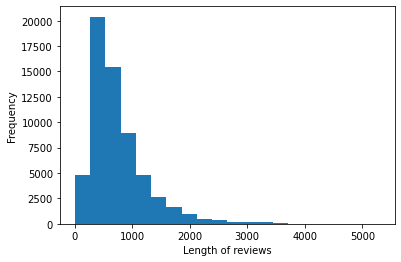

In [41]:
#histogram of distribution of reviews
plt.hist(airline_data['customer_review'].str.len(), bins = 20)
plt.xlabel('Length of reviews')
plt.ylabel('Frequency')

In [42]:
print('Number of Reviews having length greater than 1000 :',(airline_data['customer_review'].str.len()>1000).sum())
print('Number of Reviews having length less than 1000 :',(airline_data['customer_review'].str.len()<1000).sum())
print('Number of Reviews having length less than 500 :',(airline_data['customer_review'].str.len()<500).sum())

Number of Reviews having length greater than 1000 : 13321
Number of Reviews having length less than 1000 : 47840
Number of Reviews having length less than 500 : 22385


*Most of the reviews are under length of 1000 characters out of 61k+ reviews only nearly 13.3K reviews have characters greater than 1000*

### ***Number of words in a review***

(array([6.1180e+03, 2.0834e+04, 1.5025e+04, 8.3110e+03, 4.5850e+03,
        2.5780e+03, 1.4460e+03, 8.7700e+02, 4.8200e+02, 3.4500e+02,
        2.2600e+02, 1.5600e+02, 1.5100e+02, 4.1000e+01, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  50.7, 100.4, 150.1, 199.8, 249.5, 299.2, 348.9, 398.6,
        448.3, 498. , 547.7, 597.4, 647.1, 696.8, 746.5, 796.2, 845.9,
        895.6, 945.3, 995. ]),
 <a list of 20 Patch objects>)

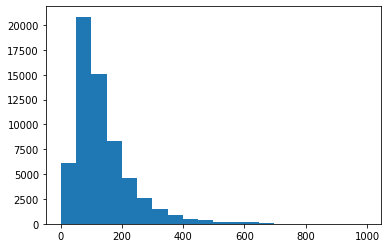

In [43]:
#plot to see the distribution of number of words in a review 
plt.hist(airline_data['customer_review'].str.split().apply(lambda x: len(x)), bins = 20)

*Most of the reviews contains the words mostly nearly 50 to 120*

### ***Most appearing Stop Words in a review***

In [44]:
#corpus of english stopwords
coropus_stopwords = stopwords.words('english')

In [45]:
from collections import defaultdict

#dictionary to store the count of stopwords 
stopwords_dict = defaultdict(int)

#loop to store the count of stopwords
for review in airline_data['customer_review']:
  split_review = review.split()
  for word in split_review:
    if word in coropus_stopwords:
      stopwords_dict[word]= stopwords_dict[word]+1

#sorting the dictionary in terms of no. of time stopword is appearing 
stopwords_dict = sorted(stopwords_dict.items(), key = lambda x:x[1], reverse = True)

Text(0, 0.5, 'Stopwords')

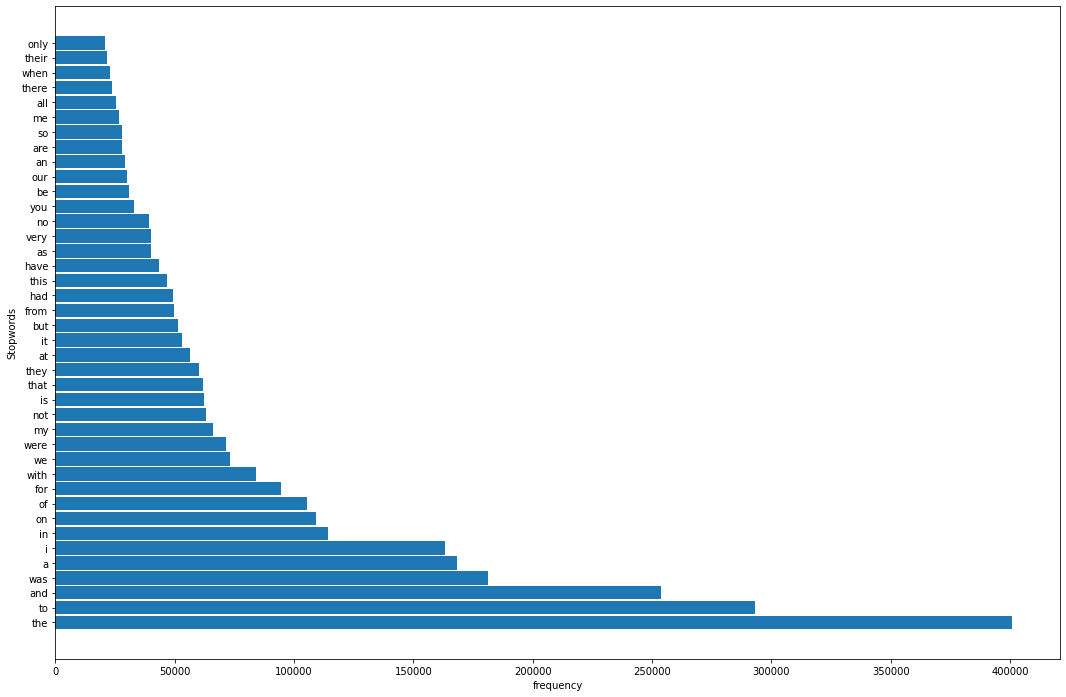

In [46]:
#plotting a bar plot for stop words
bars = []
labels = []
fig = plt.figure(figsize = (18,12))
for i in range(40):
  bars.append(stopwords_dict[i][1])
  labels.append(stopwords_dict[i][0])
plt.barh(labels,bars, height = 0.9)
plt.xlabel('frequency')
plt.ylabel('Stopwords')

### ***Removing Stop Words in a review***

In [47]:
#list of negative words that we will not remove to preserve the meaning of sentence
negations = ["weren't", 'wasn\'t', 'isn\'t', 'wouldn\'t', 
             'shouldn\'t', 'couldn\'t', 'not', 'don\'t', 'doesn\'t', 'didn\'t', 
             "aren't","hadn't","hasn't","haven't","mightn't","mustn't","needn't",'no', 'neither','nor']

In [48]:
#deleting the list of negative words from corpus of stopwords
coropus_stopwords = list(set(coropus_stopwords)-set(negations))

In [49]:
#removing stopwords from review
airline_data['customer_review'] = airline_data['customer_review'].apply(lambda x : ' '.join([i for i in x.split() if i not in coropus_stopwords]))

### ***Frequently appearing words in clean data***

In [50]:
#dictionary to store the count of words 
frequentwords_dict = defaultdict(int)

#looping over review data to extract the count of words 
for review in airline_data['customer_review']:
  split_review = review.split()
  for word in split_review:
      frequentwords_dict[word]= frequentwords_dict[word]+1

#sorting the dictionary in terms of no. of time word is appearing 
frequentwords_dic = sorted(frequentwords_dict.items(), key = lambda x:x[1], reverse = True)

Text(0, 0.5, 'frequent words')

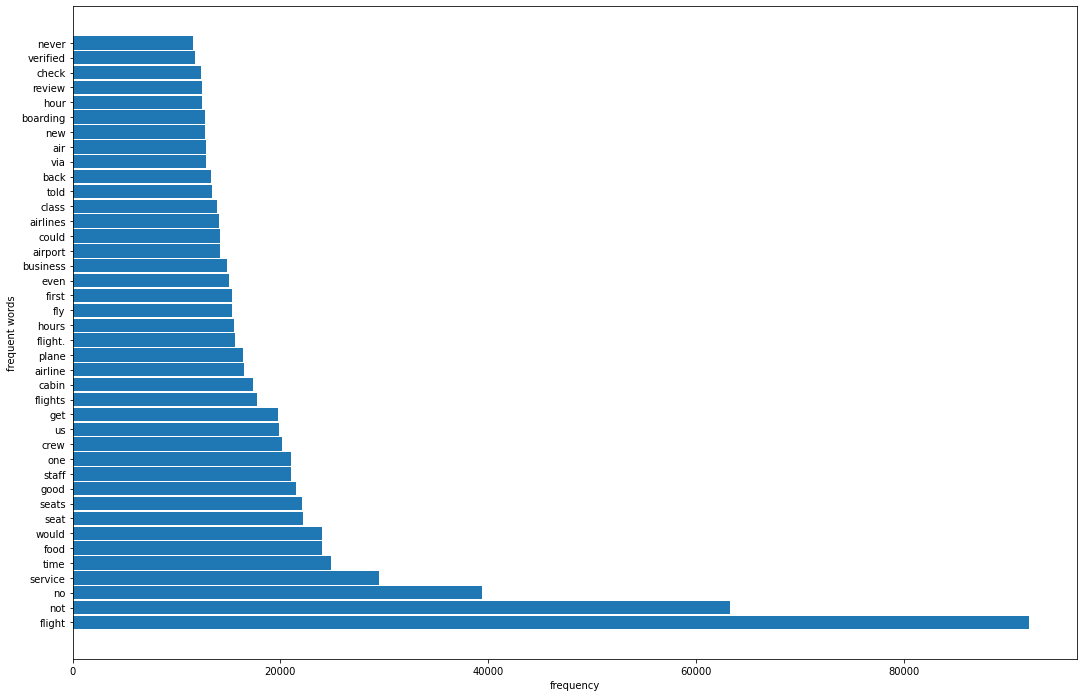

In [51]:
#plotting a bar plot for most appearing words
bars = []
labels = []
fig = plt.figure(figsize = (18,12))
for i in range(40):
  bars.append(frequentwords_dic[i][1])
  labels.append(frequentwords_dic[i][0])
plt.barh(labels,bars, height = 0.9)
plt.xlabel('frequency')
plt.ylabel('frequent words')

## ***Sentiment Intensity Analyser for each review*** 

In [52]:
#-------------------------------------------Block 24-------------------------------------------

#downloading vader lexicon for sentiment analysis 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [53]:
#-------------------------------------------Block 25-------------------------------------------

#checking sentiment of user review
sentiment  = SentimentIntensityAnalyzer()

#generating polarity score and storing it in sentiment_score feature of dataframe
polarity = [round(sentiment.polarity_scores(i)['compound'], 2) for i in airline_data['customer_review']]
airline_data['sentiment_score'] = polarity

In [54]:
airline_data.head()

airline  overall review_date  \
0  Turkish Airlines      7.0  2019-05-08   
1  Turkish Airlines      2.0  2019-05-07   
2  Turkish Airlines      3.0  2019-05-07   
3  Turkish Airlines     10.0  2019-05-06   
4  Turkish Airlines      1.0  2019-05-06   

                                     customer_review  traveller_type  \
0  london izmir via istanbul. first time i’d flow...        Business   
1  istanbul bucharest. make check airport, take l...  Family Leisure   
2  rome prishtina via istanbul. flew company seve...        Business   
3  flew turkish airlines iad-ist-khi return khi-i...    Solo Leisure   
4  mumbai dublin via istanbul. never book turkish...    Solo Leisure   

           cabin                           route date_flown  seat_comfort  \
0  Economy Class    London to Izmir via Istanbul 2019-05-01           4.0   
1  Economy Class           Istanbul to Bucharest 2019-05-01           4.0   
2  Economy Class  Rome to Prishtina via Istanbul 2019-05-01           1.0   
3  Economy Class    Washington Dulles to Karachi 2019-04-01           4.0   
4  Economy Class   Mumbai to Dublin via Istanbul 2019-05-01           1.0   

   cabin_service  food_bev  entertainment  ground_service  value_for_money  \
0            5.0       4.0            4.0             2.0              4.0   
1            1.0       1.0            1.0             1.0              1.0   
2            4.0       1.0            3.0             1.0              2.0   
3            5.0       5.0            5.0             5.0              5.0   
4            1.0       1.0            1.0             1.0              1.0   

  recommended  sentiment_score  
0         yes             0.81  
1          no             0.27  
2          no            -0.98  
3         yes             0.98  
4          no            -0.70

# ***Exploratory Data Analysis***

## ***Segregating review year, review month, review day from review date***

In [55]:
#--------------------------------------------Block 26-----------------------------------------------

#segregating year, month and date from review_date columnn
airline_data['review_year'] = pd.DatetimeIndex(airline_data['review_date']).year   
airline_data['review_month'] = pd.DatetimeIndex(airline_data['review_date']).month
airline_data['review_day'] = pd.DatetimeIndex(airline_data['review_date']).day

## ***Creating a overall_cat feature from overall columns***

In [56]:
#-------------------------------------------Block 27-------------------------------------------

#converting 10 rating data into three categories : positive, negative, neutral

#dictionary map for all overall rating into three categories
overall_cat_dict = {1.0:"neg", 2.0:"neg", 3.0:"neg", 4.0:'neutral',5.0:'neutral',6.0:'neutral',7.0:'Positive',
                    8.0:'Positive', 9.0:'Positive', 10.0 :'Positive'}

#mapping overall feature with overall cat dict                     
airline_data['overall_cat'] = airline_data['overall'].map(overall_cat_dict)

## ***Designing a count function to check distribution of ratings and different features***

In [57]:
#--------------------------------------------Block 28--------------------------------------------

#defining count_plot function  
def count_plot(feat_list):

  #total plots 
  total_plots = len(feat_list)
  
  #number of columns in subplots 
  cols = 2
  
  #finding out the number of rows for subplots
  rows = math.ceil(total_plots/cols)

  #color palettes for a graph 
  palettes = ["rocket", "mako","flare", "crest","magma","viridis","Set2","husl","hls",
              "cubehelix" ,"Blues" ,"YlOrBr","vlag", "icefire", "Spectral"]
  
  #subplots
  fig, axs = plt.subplots(rows, cols, figsize= (cols*13,rows*6))
  
  #variables to iterate over
  idx = 0 
  i = 0
  j = 0


  for i in range(rows):
    for j in range(cols):      
      #check for if all graphs are plotted then break
      if idx == total_plots:
         break      
      
      #plotting a count plot
      rating_distribution = sns.countplot(x=feat_list[idx] , data=airline_data, palette = palettes[idx], ax = axs[i][j])
      rating_distribution.set_xticklabels(rating_distribution.get_xticklabels(), rotation=75) #setting x lables
      sns.despine(top = True, right = True, left = False, bottom = False)   
      axs[i][j].set_title("Count of different " + feat_list[idx] + ' values among data') #setting title   
      idx = idx+1
      for p in rating_distribution.patches:
          axs[i][j].text(p.get_x()+0.1,  (p.get_height()-(0.5*p.get_height())), str(p.get_height()), rotation = 'vertical')

  # number of plots are not even then clear the axis for last plot as there will be no graph    
  if total_plots % 2 != 0:
            axs[i][j].set_axis_off()

## ***Count plots to check distribution of ratings and different features***

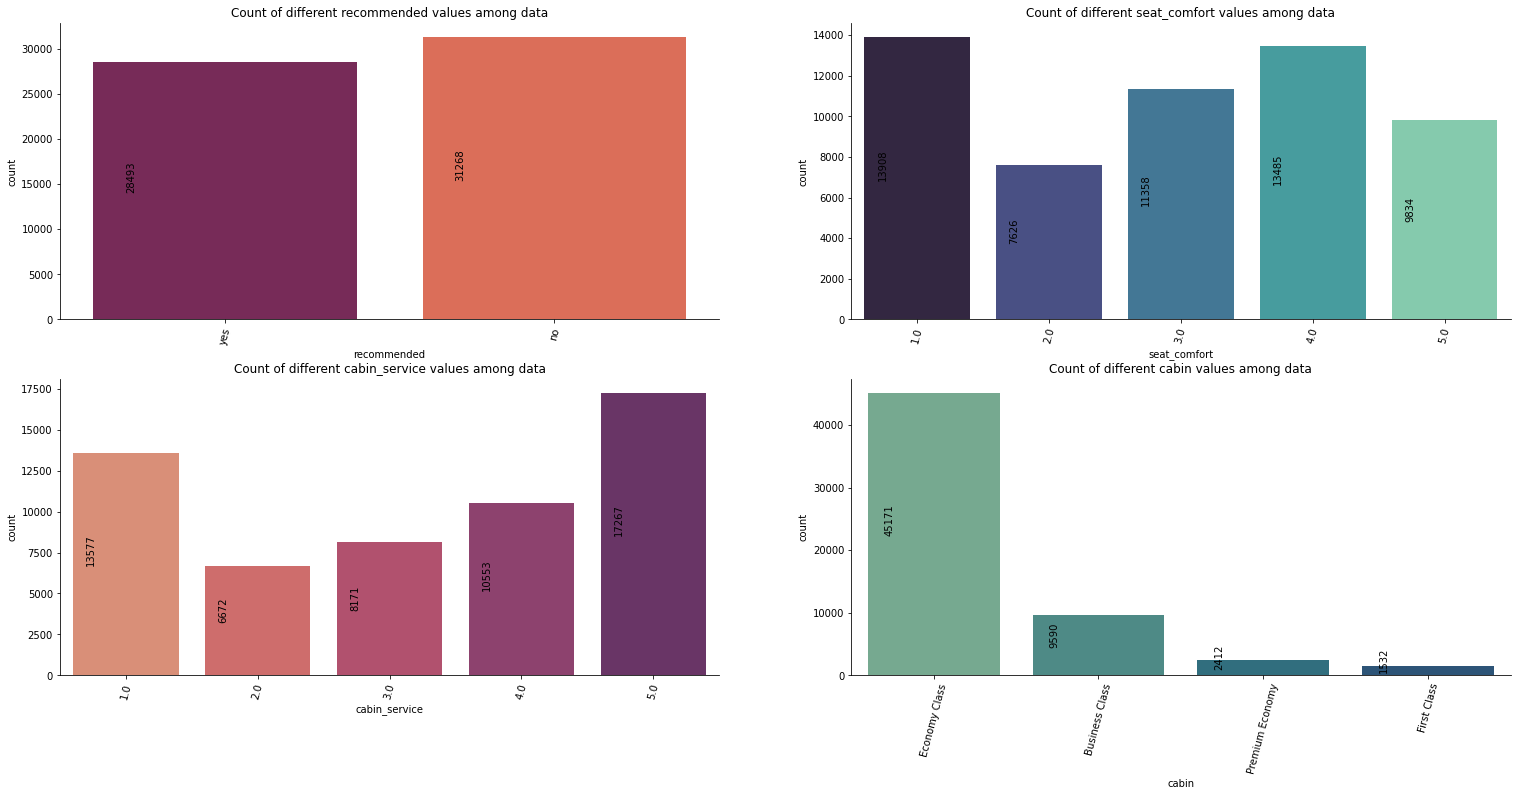

In [58]:
#--------------------------------------------Block 29--------------------------------------------

#visualising count distribution of four features
count_plot(['recommended', 'seat_comfort', 'cabin_service', 'cabin'])

*Slightly more non recommending users are there as compare to recommending users*

*Most of the users are giving either 1 or 4 rating to the seat comfort*

*More users seems to be happy with service ratings and provide higher(5) ratings*

*Lastly count of economy class in cabins are more and lesser in business class, first class and premium economy*

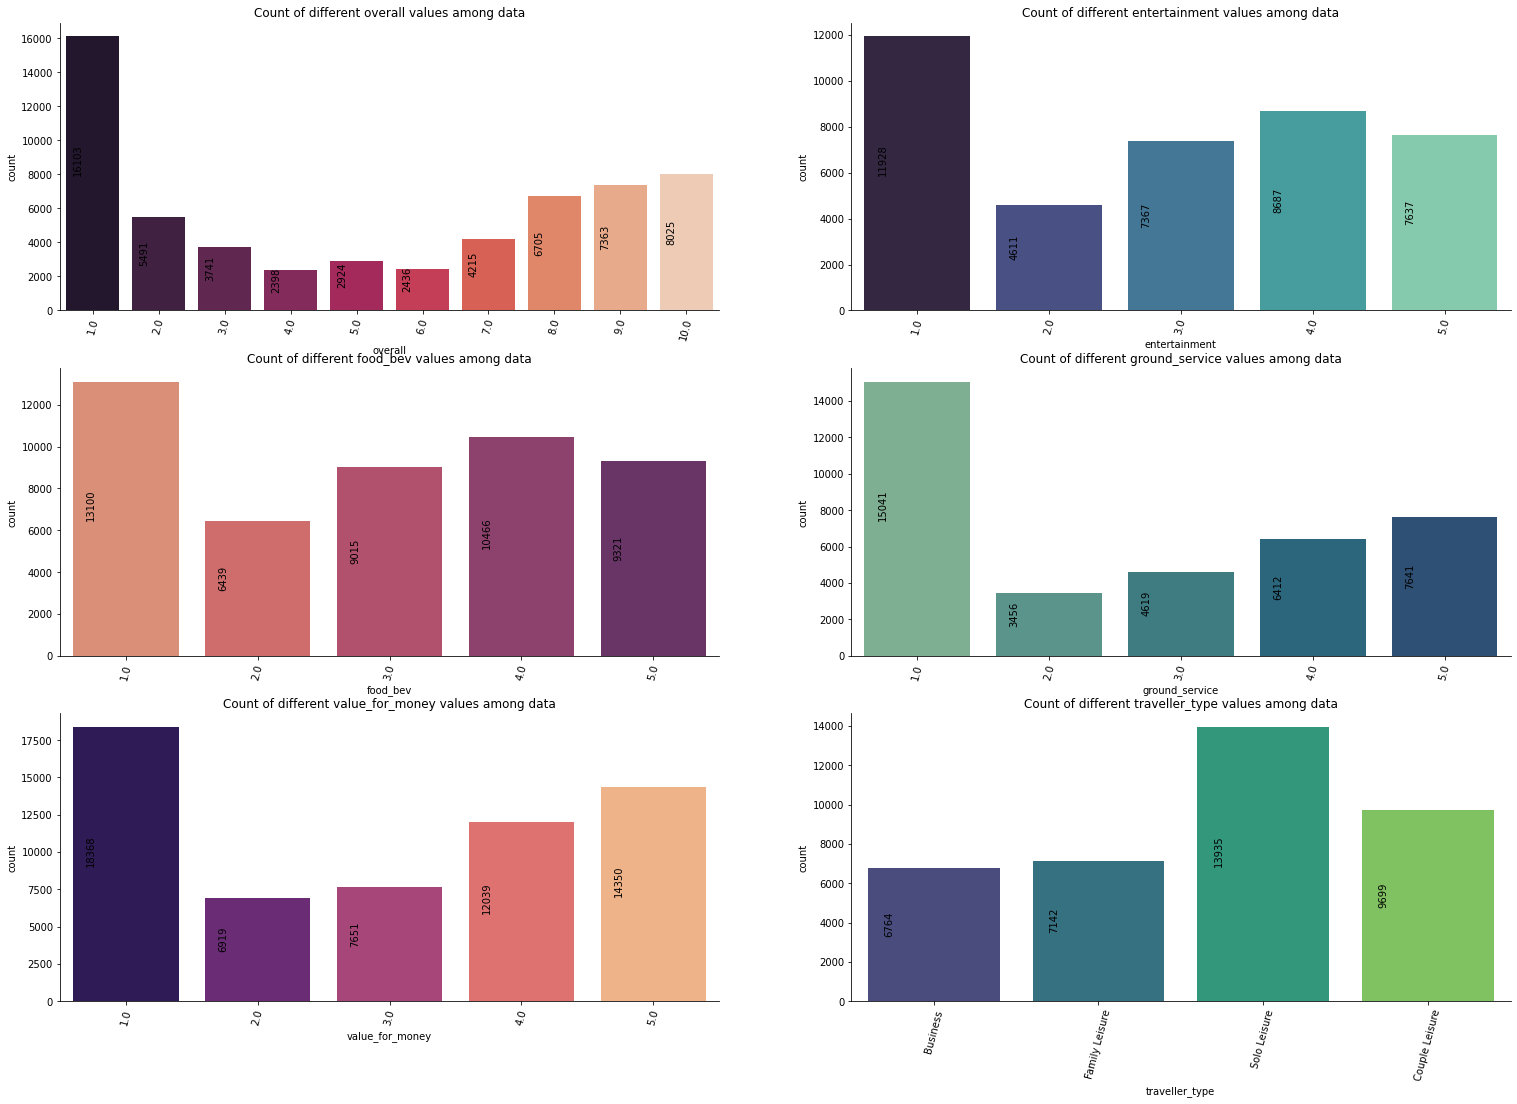

In [59]:
#---------------------------------------Block 30-----------------------------------------

#visualising count distribution of remainig 6 features
count_plot(['overall', 'entertainment', 'food_bev', 'ground_service', 'value_for_money', 'traveller_type'])

*In all these distributions we can see more users to be providing 1 ratings*

*Most of the users are either rating lowest or highest. Only few users are provinding mediocer rating(3)*



## ***Distributionof Overall in respect to recommend feature***

Text(0.5, 1.0, 'Effect of overall ratings in recommendation')

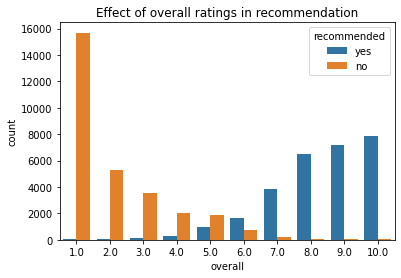

In [60]:
#---------------------------------------Block 31-----------------------------------------

#checking for effect of overall on recommended
sns.countplot(x='overall', data = airline_data, hue = 'recommended')
plt.title('Effect of overall ratings in recommendation')

*Overall seems to be very powerful variable there are nearly no recommendations with overall 1,2 and 3 rating and almost all the people are recommending who has 7,8,9 sand 10 rating*

## ***Funtion designing and its application to remove corrupt data***

In [61]:
#---------------------------------------Block 32-----------------------------------------

'''checking for corrupted data 
#---if overall rating equal to 1 or 2 and average of other present rating is less than or equal to 3 and recommendation is yes - corrupted data
#--- if overall rating equal to 10 or 9 and average of other present rating is greater than 3 and recommendation is no - corrupted data
This function iteratres over each row of airline data and returns True if row is not corrupted and returns false if row is corrupted. 
On passing the return list of true and false values to our original dataframe only the true values will be ointacted deleting all corrupted 
data'''

def corrupt_check(data):
  #features to be considered other than overall for taking average rating 
  rate_feat = ['seat_comfort', 'cabin_service','entertainment','ground_service', 'food_bev', 'value_for_money']
  
  #case when recommend is yes 
  if data['recommended'] =='yes':

    #checking if even after recommending yes user is giving lowest overall rating to it 
    if data['overall']==1 or data['overall']==2:
      non_null_ratings = []

      #cheking if any feature present in rate_feat list is null for a specific row/sample if not append it in non null list
      for feat in rate_feat:
        if str(data[feat]) != 'NaN':
          non_null_ratings.append(data[feat])
      #all the rating are out of 5 only so we will take average of non null rating columns 
      score = sum(non_null_ratings)/len(non_null_ratings)
      
      #after giving a checks if avg score <= 3, overall = 1 or 2 and recommend = yes return false so that the particular row is ignored 
      if score <= 3:
        return False

  #case when recommend is no      
  if data['recommended'] =='no':

    #checking if even after recommending no user is giving highest overall rating to it
    if data['overall']==10 or data['overall']==9:
      non_null_ratings = []

      #cheking if any feature present in rate_feat list is null for a specific row/sample if not append it in non null list
      for feat in rate_feat:
        if str(data[feat]) != 'NaN':
          non_null_ratings.append(data[feat])

      #all the rating are out of 5 only so we will take average of non null rating columns     
      score = sum(non_null_ratings)/len(non_null_ratings)
      
      #after giving a checks if avg score >3, overall = 9 or 10 and recommend = no return false so that the particular row is ignored
      if score > 3:
        return False
  
  #if data is normal and any of above cases are not true return true to keep the index 
  return True

In [62]:
#---------------------------------------Block 33-----------------------------------------

#applying a corrupt check function on data to keep only non corrupted row
airline_data = airline_data[airline_data.apply(corrupt_check,axis =1)]

In [63]:
#---------------------------------------Block34-----------------------------------------

#checking shape of data
airline_data.shape

(61141, 20)

## ***Checking the effect of layover on recommendation***

In [64]:
#--------------------------------------------------Block 35--------------------------------------

'''This function takes route feature and checks if the route has a word via in it and if so it returns True for layover else it returns 
   false for layover and for the rows where route data is missing it returns not available'''

#function to check and store true if a route contains layovers and false if not  
def layover_check(feat):
  
  #checking if feature is not null(data type of null is float64)
  if type(feat) == str:

    #spliting the features words into list 
    feat = feat.split()

    #checking if there is a via word in feature and if return true
    if 'via' in feat:
      return True
    
    #else return false
    else:
      return False
  
  #if data is null return not available
  else:
    return 'Not available' 


In [65]:
#--------------------------------------Block 36--------------------------------------

#applying layover check function 
airline_data['layover'] = airline_data['route'].apply(layover_check)

In [66]:
#--------------------------------------Block 37--------------------------------------

#checking value counts
airline_data['layover'].value_counts()

False            25626
Not available    23670
True             11845
Name: layover, dtype: int64

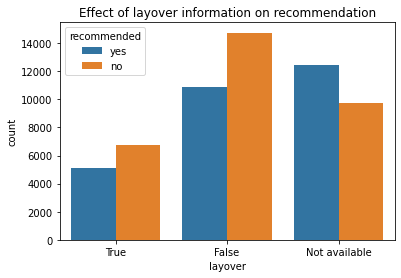

In [67]:
#-------------------------------Block 38-----------------------------------

#checking the effect of layover on recommendation 
sns.countplot(x='layover', data=airline_data, hue = 'recommended')
plt.title('Effect of layover information on recommendation')
plt.show()

*From the graph it seems like there is no serious effects of layover on recommendation to the flight as we can see both the flights with and without layover has higher no recommendation with very slight differences in count of each. We can see that for the flights having no information about layover has higher yes recommendation*

## ***Checking the effect of days difference between reviewed date and flown date on recommendation***

In [68]:
#-----------------------------------Block 39--------------------------------------

def days_difference(review_date, date_flown): 
  '''This function takes review date and date flown and calculate the difference between the days review has taken and user has flown
   if  any of the following date is missing it will return -99999'''

  #check if date data is not null
  if 'nattype.NaTType' not in str(type(date_flown)) :
    
    #calculating difference of dates in term of number of days
    num_of_days = (review_date-date_flown).days

    return num_of_days
  
  #if null, returns no data 
  else:
    return -99999

In [69]:
#---------------------------------------Block 40-----------------------------------------

#building num of days column
airline_data['num_of_days'] = airline_data.apply(lambda x :days_difference(x['review_date'], x['date_flown']), axis =1)

In [70]:
#-----------------------------------Block 41----------------------------------------------------

#segregating days_data dataframe 
days_data =  airline_data.groupby(['num_of_days', 'recommended']).agg({'airline': 'count'}).reset_index()

In [71]:
#----------------------------------------Block 42-----------------------------------------

#renaming a airline to count column
days_data.rename(columns = {'airline':'count'}, inplace = True)

In [72]:
#----------------------------------------Block 43-----------------------------------------

#following are the corrupted rows and we will not consider them in our analysis 
airline_data[(airline_data['num_of_days'] < 0) & (airline_data['num_of_days'] != -99999)]

airline  overall review_date  \
2287              Qatar Airways      9.0  2016-01-11   
6241   KLM Royal Dutch Airlines      2.0  2018-09-26   
13176           United Airlines      1.0  2018-10-05   
21873         Austrian Airlines      1.0  2015-01-01   

                                         customer_review  traveller_type  \
2287   paris singapore transfer doha qatar airways bu...  Couple Leisure   
6241   klm worst customer service ever. tried book fl...    Solo Leisure   
13176  first left hour late slc landing sat tarmac wa...  Family Leisure   
21873  poor experience austrian flying 2 year old. pl...  Family Leisure   

                cabin                                        route date_flown  \
2287   Business Class                           CDG to SIN via DOH 2016-12-01   
6241    Economy Class                           Amsterdam to Dubai 2018-11-01   
13176   Economy Class  Salt Lake City to San Francisco via Kahului 2018-12-01   
21873   Economy Class                            Toronto to Vienna 2015-03-01   

       seat_comfort  cabin_service  ...  ground_service  value_for_money  \
2287            5.0            5.0  ...             4.0              5.0   
6241            NaN            NaN  ...             NaN              1.0   
13176           1.0            1.0  ...             1.0              1.0   
21873           3.0            1.0  ...             2.0              1.0   

       recommended  sentiment_score review_year  review_month  review_day  \
2287           yes             0.99        2016             1          11   
6241            no            -0.95        2018             9          26   
13176           no            -0.76        2018            10           5   
21873           no            -0.68        2015             1           1   

       overall_cat  layover num_of_days  
2287      Positive     True        -325  
6241           neg    False         -36  
13176          neg     True         -57  
21873          neg    False         -59  

[4 rows x 22 columns]

In [73]:
#----------------------------------------Block 44-----------------------------------------

#keeping a data where days are either greater than 0 or not null
days_data = days_data[days_data['num_of_days']>=0]

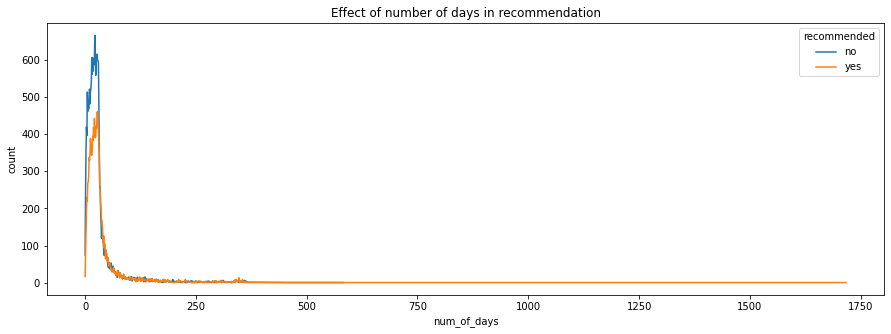

In [74]:
#------------------------------Block45----------------------------------------

#line plot for visualising the trend for num_of_days
plt.figure(figsize=(15,5))
sns.lineplot(x='num_of_days', y ='count', data = days_data, hue = 'recommended')
plt.title('Effect of number of days in recommendation')
plt.show()

*We have observed that when reviews are collected a sufficient number of days after a flight, the majority of users tend to recommend the flight. Conversely, when reviews are collected close to the date of the flight,  more users are not recommending the flight. As a result, this may reflect on the airline reputation and it will be beneficial to keep this fact in mind while collecting and analyzing customer feedback to make more informed business decisions.*

## ***Rating Distribution Check***

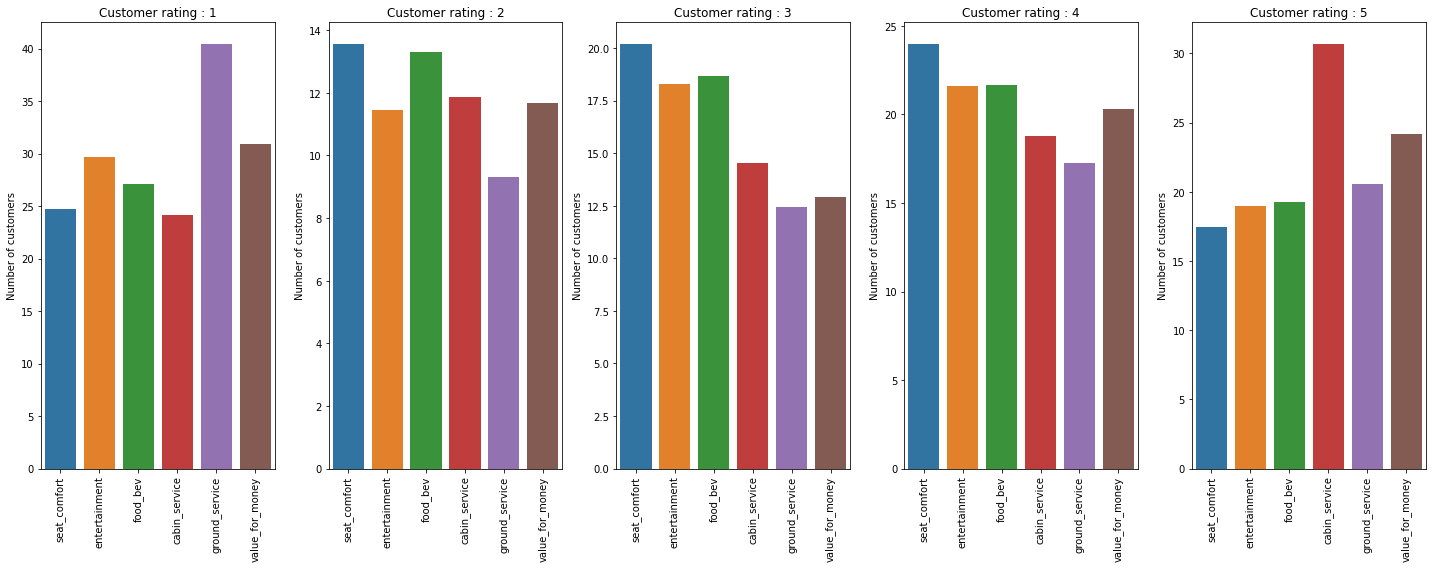

In [75]:
#----------------------------------------Block 46--------------------------------------

'''In this block we have plotted 5 different bar plots showing rating 1 -5 for different rating variables. Each plot shows the percentage of 
   rows having that specific rating for different feature.'''

#storing all the features of 1 to 5 ratings in a list

# all fetatures to consider for plotting 
ratings_data = ['seat_comfort', 'entertainment', 'food_bev', 'cabin_service', 'ground_service', 'value_for_money']
counts = []

#grouping by features and storing the count of each value of feature in ascending order 
for feat in ratings_data:
  counts.append(list(airline_data.groupby(feat).agg({'airline':'count'}).reset_index().sort_values(by = feat)['airline']))

#figure and plot
fig,ax = plt.subplots(1,5, figsize= (20,8))

#plotting the data 
for i in range(5):
  plot_data = []
  for j in range(len(counts)):
    plot_data.append(counts[j][i]/sum(airline_data[ratings_data[j]].notnull())*100)
  x_idx = [k for k in range(len(counts))]
  sns.barplot(x_idx, plot_data, ax = ax[i])   #plotting a bar plot 
  ax[i].set_xticklabels(ratings_data, rotation = 90)  
  ax[i].set_title(str('Customer rating : ' + str(i+1)))
  ax[i].set_ylabel('Number of customers')
fig.tight_layout()

*We can see that out of all the rating features. Out of all the user who is rating ground service most of them are rating 1 or can we said like out of different features ground service have most of 1 rated users*

*Similarly cabin service is a star feature and nost of the people rated 5 to cabin service*


## ***Desiging a relation plot function to check the relation of one feature with other rating feature***

In [76]:
def relation_plot(analysing_feat, checking_feat):
  
  '''This function is designed to check the relationship of analysing_feat with the list of checking_feat. Given the analysing feature
     it checks how among each of the unique values of analysing feature, the values of checking features are distributed. Say if a analysing
     feature is cabin(economy, premium economy, first class and business class) and one of checking feature is seat comfort. So we will see 
     how the values of seat comfort i.e. (1,2,3,4 and 5) is distributed across economy cabin, accross premium economy, then accross first class
      and accross business class '''

  #getting the list of unique features and sorting it 
  feat = sorted(list(airline_data[analysing_feat].value_counts().index))

  #for each analysing feature and checking feature pair we will plot one plot so total plot is equal to length of checking feature 
  total_plots = len(feat)
  
  #cols in our subplot would be constant i.e. is 2 
  cols = 2

  #rows will be derived from the no, of cols and total plots
  rows = math.ceil(total_plots/cols)

  #color palletes for different plots 
  palettes = ["rocket", "mako","flare", "crest","magma", "viridis", "Set2", "husl", "hls", "cubehelix" , "Blues" , "YlOrBr", "vlag", 
               "icefire", "Spectral"]

  #canvas for subplot
  fig, axs = plt.subplots(rows, cols, figsize= (cols*13,rows*6) )
  
  #index variable that will be incremented by 1 everytine inside loop over lists like palettes, checking_feat
  idx = 0 

  #loop to plot relation plots 
  for i in range(rows): #for number of rows
    
    #for number of columns
    for j in range(cols):
      
      if idx == total_plots:
         break
      
      temp_df = airline_data[airline_data[analysing_feat]==feat[idx]]

      final_df = pd.DataFrame(columns = ['values', 'counts', 'feat']) 

      for val in checking_feat:
        df = pd.DataFrame(temp_df.groupby(val).size()).reset_index().rename(columns = {val:'values', 0:'counts'})
        df['counts'] = round((df['counts']/len(temp_df)*100),2)
        df['feat'] = val
        final_df = pd.concat([final_df, df], axis = 0)
      
      # if rows are greter than 1 then only we need two subscripts ax = axs[i][j] else single subscript idx will work
      if rows>1:
        #bar plot of percentage of checking features and anlysing features
        abc = sns.barplot(x = 'feat', y = 'counts' , data = final_df,hue = 'values', palette = palettes[idx], ax = axs[i][j])
        axs[i][j].set_title('Distribution of unique values of features when ' + analysing_feat + ': ' + str(feat[idx]))
        axs[i][j].set_xlabel(analysing_feat + ': ' + str(feat[idx]))
        axs[i][j].set_ylabel("Percentage")
        #for getting text on bars
        for p in abc.patches:
          axs[i][j].text(p.get_x()+0.05,  (p.get_height()-(0.5*p.get_height())), str(p.get_height()), rotation = 'vertical') 
        idx = idx+1
      else:
        abc = sns.barplot(x = 'feat', y = 'counts' , data = final_df,hue = 'values', palette = palettes[idx], ax = axs[idx])
        axs[idx].set_title('Distribution of unique values of features when ' + analysing_feat + ': ' + str(feat[idx]))
        axs[idx].set_xlabel(analysing_feat + ': ' + str(feat[idx]))
        axs[idx].set_ylabel("Percentage")
        #xs[idx].set_title('Count of all ' + checking_feat[idx] + ' ratings for different ' + analysing_feat + ' rating')
        for p in abc.patches:
          axs[idx].text(p.get_x()+0.1,  (p.get_height()-(0.5*p.get_height())), str(p.get_height()), rotation = 'vertical') 
        idx = idx+1
      
  #to avoid unneccesary borders and scales in empty space
  if total_plots % 2 != 0:
            axs[i][j].set_axis_off()   

In [77]:
#----------------------------------------Block 48--------------------------------------

#features that are either string or continuous and cannot be used in this analysis
non_analysing_feat = ['airline', 'customer_review', 'date_flown', 'review_date', 'route', 'review_year','review_month', 
                      'review_day', 'num_of_days', 'sentiment_score', 'layover', 'overall', 'traveller_type', 'cabin', 'overall_cat','recommended']

### ***Relation of recommend feature with other 5 rating variables***

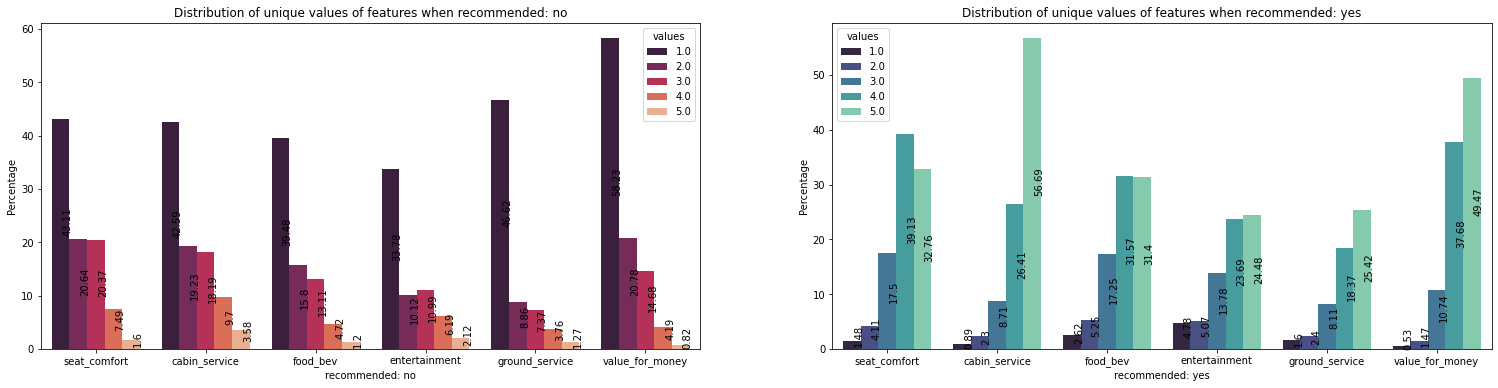

In [78]:
#----------------------------------------Block 49--------------------------------------

#analysing relation between recommended and all other features
relation_plot('recommended', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['recommended']])

*Patterns here are quite generic as higher the rating users are giving to services chances or probability of recommending Yes is high*


*In most of our graphs we can see customers with 4 or 5 rating bends towards recommending where as customers providing 3 ratings are mostly divded 50-50 in both. 50 % are recommending and 50% not.*

*Value for money is highly influential in recommendation as nearly 87% of user recommending a flight is giving 4 or 5 in value for money whereas nearly 89% of users not recommending the flight is giving 1 or 2 rating*



### ***Relation of traveller type feature with other 5 rating variables***

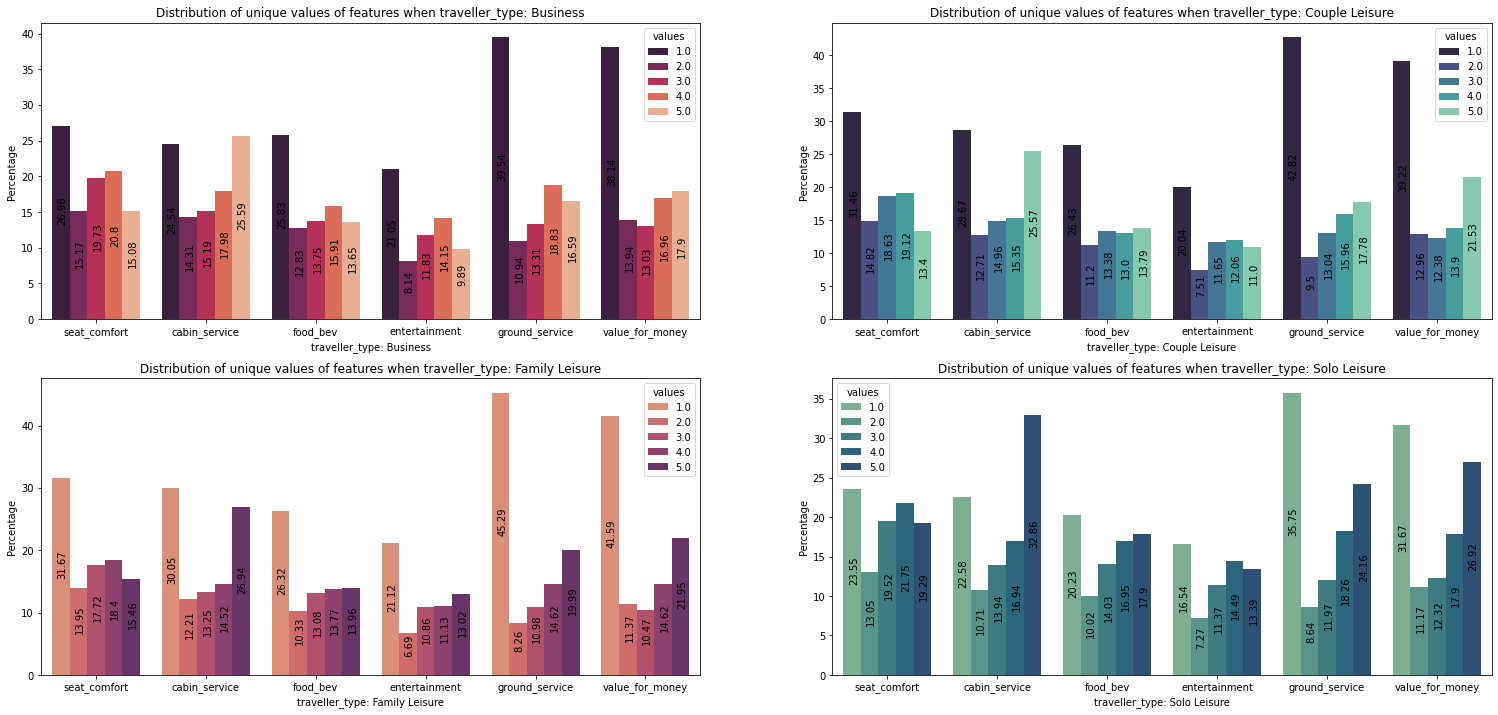

In [79]:
#----------------------------------------Block 50--------------------------------------

#analysing relation between traveller_type and all other features
relation_plot('traveller_type', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['traveller_type']])

*Comparatively, couples and families who are travelling appear to be less satisfied with the services, as more than 45% of users have provided negative ratings for seat comfort. However, solo leisure users seem to be more satisfied with the seat comfort services.*

*Approximately half of solo travelers have provided positive ratings for the cabin services, while feedback from couples and families indicates dissatisfaction with the cabin service provided*

*Though there is no major difference in food and beverage ratings in different traveller type , still solo leisure seems to be happy with services*

*An analysis of customer feedback on entertainment services does not reveal any significant insights as the ratings from all traveller type are not much different from each other*

*feedback shows that solo travelers have given positive ratings with 42.42% satisfaction for ground services, while more than 50% of other traveler groups (business, couple leisure and family) have provided negative ratings for the same service*

*over 50% of bussiness, couple ,and family travelers have given poor ratings (1 and 2) for value for money, while only 30% have given positive ratings.*


### ***Relation of cabin feature with other 5 rating variables***

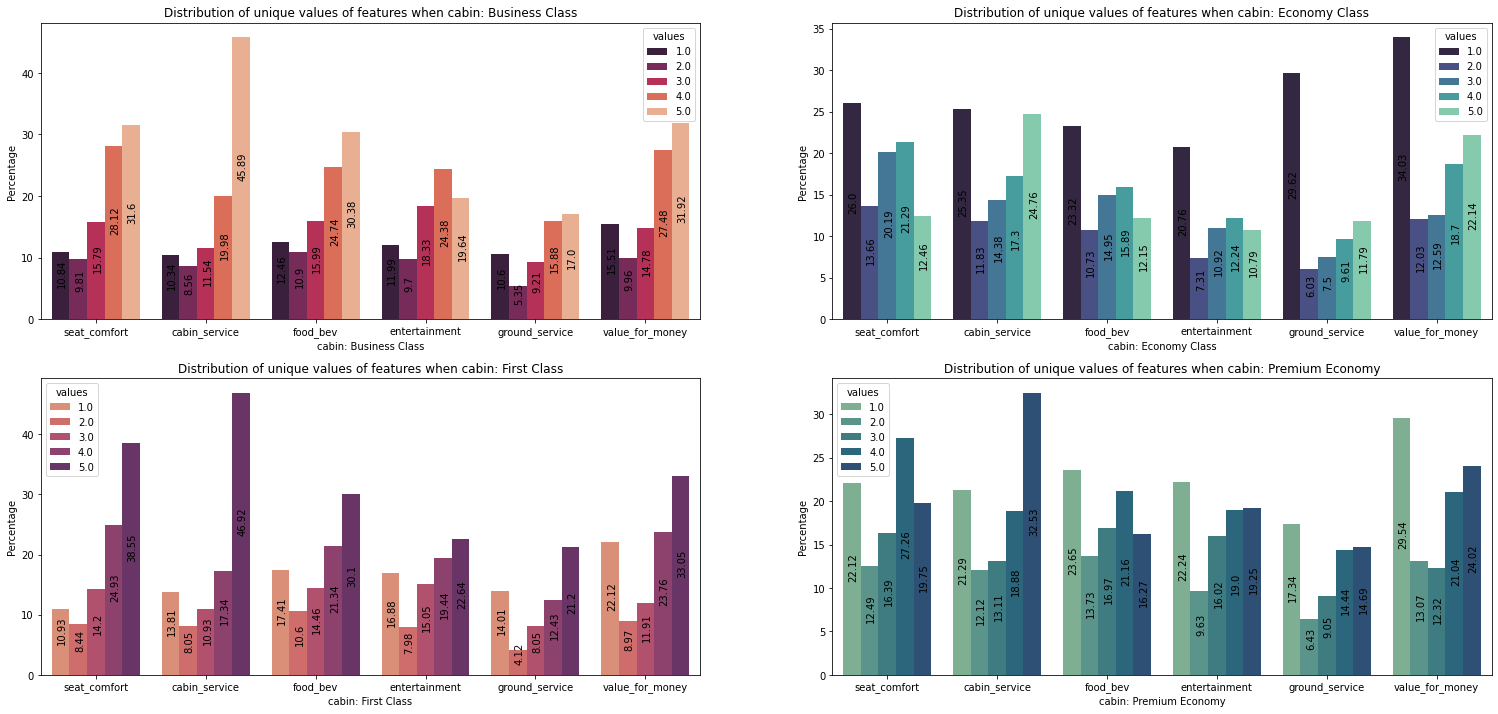

In [80]:
#----------------------------------------Block 51--------------------------------------

#analysing relation between cabin and all other features
relation_plot('cabin', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['cabin']])

*40% of economy class passengers give negative seat comfort ratings, 63% of first class and 60% of business class give positive ratings. This difference in comfort levels between classes is a concern for the businesst suggests that economy class passengers may not be receiving the same level of comfort as first class passengers.*

*A majority of passengers traveling in business and first class, at over 60%, express satisfaction with the cabin services offered. However, a significant portion of economy class passengers, at 37%, have reported dissatisfaction with their cabin service experience.* 

*Over 50% of business and first class passengers are satisfied with the food and drinks offered on the flight, while more than 33% of premium economy and economy class passengers are not satisfied with the food services provided.*

*Approximately 40% of business and first class passengers report satisfaction with the entertainment services offered during their flight*

*An analysis of customer feedback on ground services has not revealed any significant differences among cabin types. However, it has been observed that economy class passengers tend to provide relatively lower ratings for ground services as compared to other cabin types*

*more than 40% user travelling in  premium and economy cabin are giving 1 or 2 (negative) rating to the value for money wheareas more than 50% of the people travelling in buisness cabin are giving 4 or 5 (positive) rating to value for money*








### ***Relation of Seat comfort feature with other 5 rating variables***

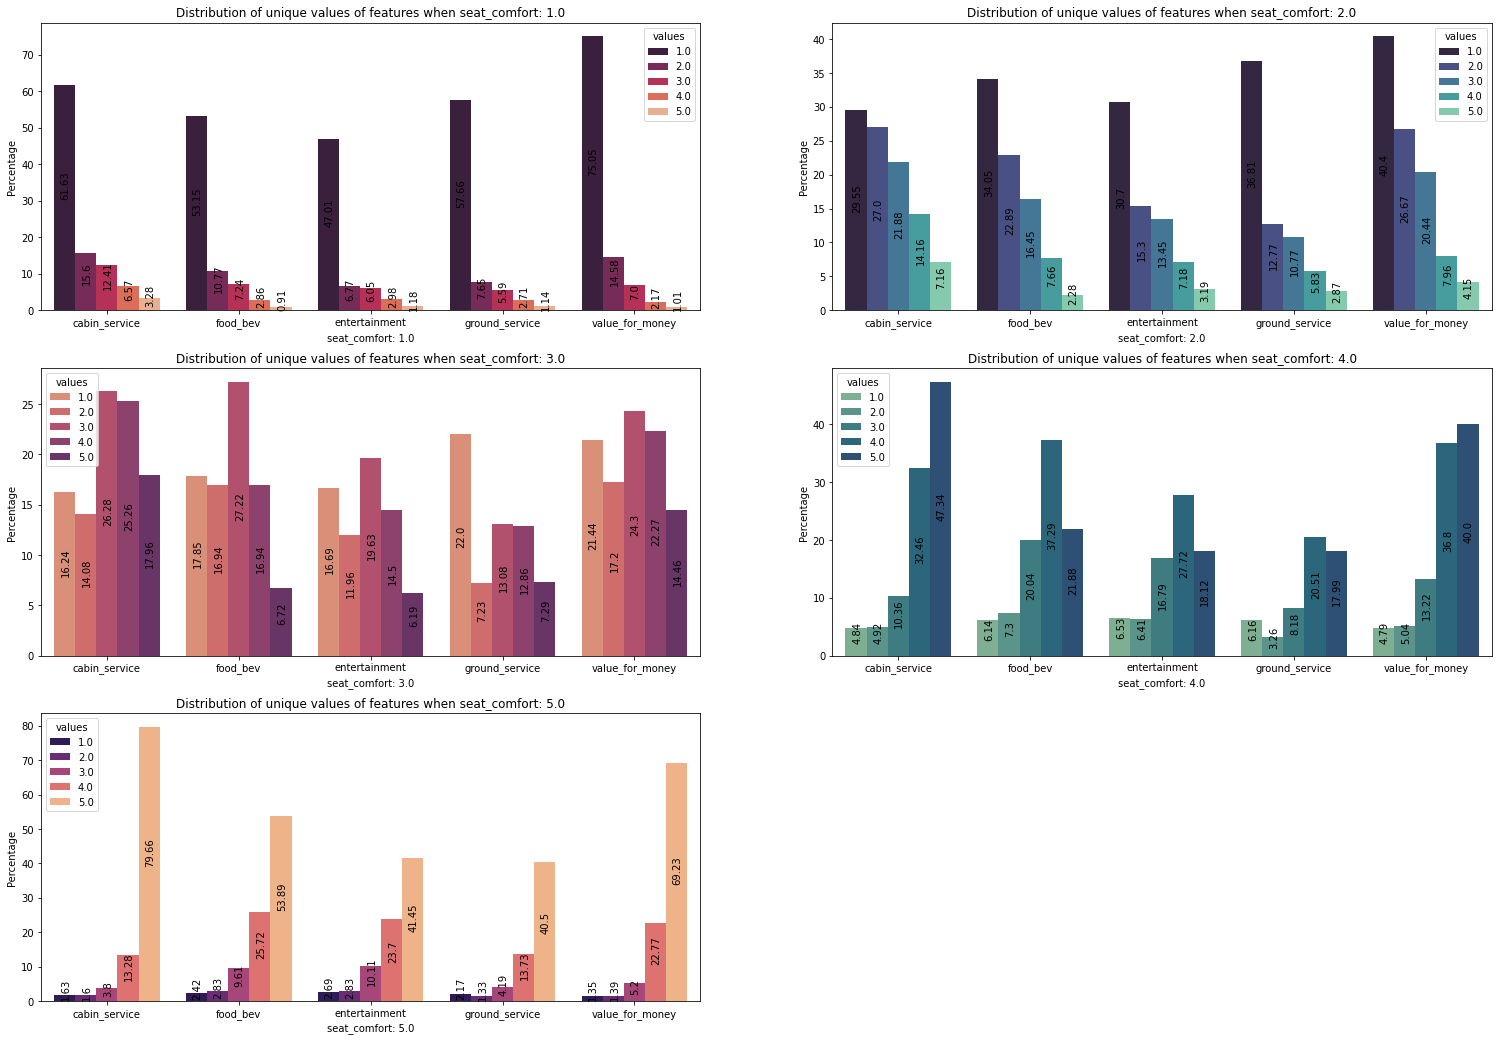

In [81]:
#----------------------------------------Block 52--------------------------------------

#analysing relation between seat_comfort and all other features

relation_plot('seat_comfort', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['seat_comfort']])

*Users who have rated seat comfort as poor (1) or (2) are likely to have a negative perception of other services such as cabin, food and beverages, ground service, and value for money, most of them rating these services low as well. This suggests a correlation between their overall dissatisfaction with the experience*

*Users who rate seat comfort highly (4) tend to also rate other services (cabin, food,value for money) positively with over 60% giving high rating (4 and 5) it is indicative that they have had a comfortable and satisfactory experience during their flight*

*Users who rate seat comfort as excellent (5) tend to have a very positive perception of other services such as cabin service and value for money, with over 90% of them giving high ratings (4 or 5)*


*The findings indicate that seat comfort plays a crucial role in determining a customer's overall satisfaction with their flight experience. Ensuring seat comfort not only improves the comfort of the individual passenger, but it also positively impacts other aspects of their flight experience such as cabin service, food and beverages, ground service, and value for money. When a passenger is comfortable, they are more likely to have a positive perception of the other aspects of their flight, leading to higher ratings and overall satisfaction. Therefore, it is essential for airlines and other travel service providers to prioritize seat comfort in order to provide the best possible experience for their customers*

### ***Relation of cabin service feature with other 5 rating variables***

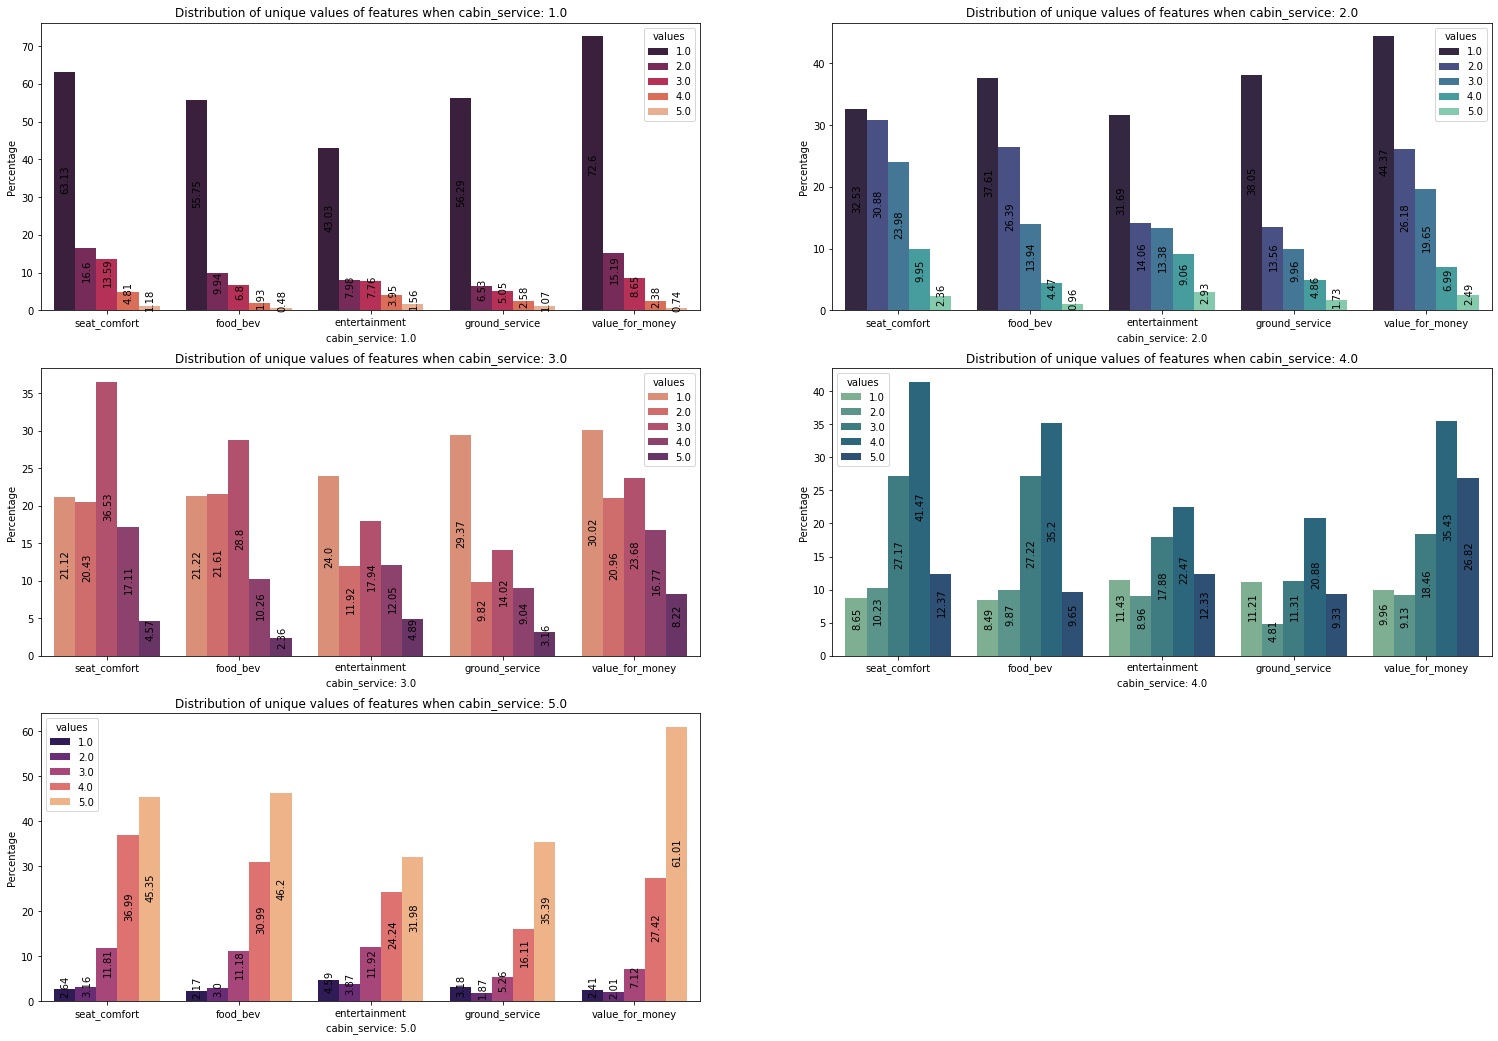

In [82]:
#----------------------------------------Block 53--------------------------------------

#analysing relation between cabin service and all other features
relation_plot('cabin_service', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['cabin_service']])

*Patterns here are quite generic again. Althouhg being the features independent to each other we are observing that if a user is giving low rating in cabin services is mostly givng low rating to other services as well*

*On observing the graphs for cabin service 1 and 2 we can see that highest positive rating(4 and 5) is given to seat comfort and entertainment.Seeing this we can guess that the user who is giving 1 or 2 to cabin service and still recommending the flight might be because of these two services.*







### ***Relation of food_bev feature with other 5 rating variables***

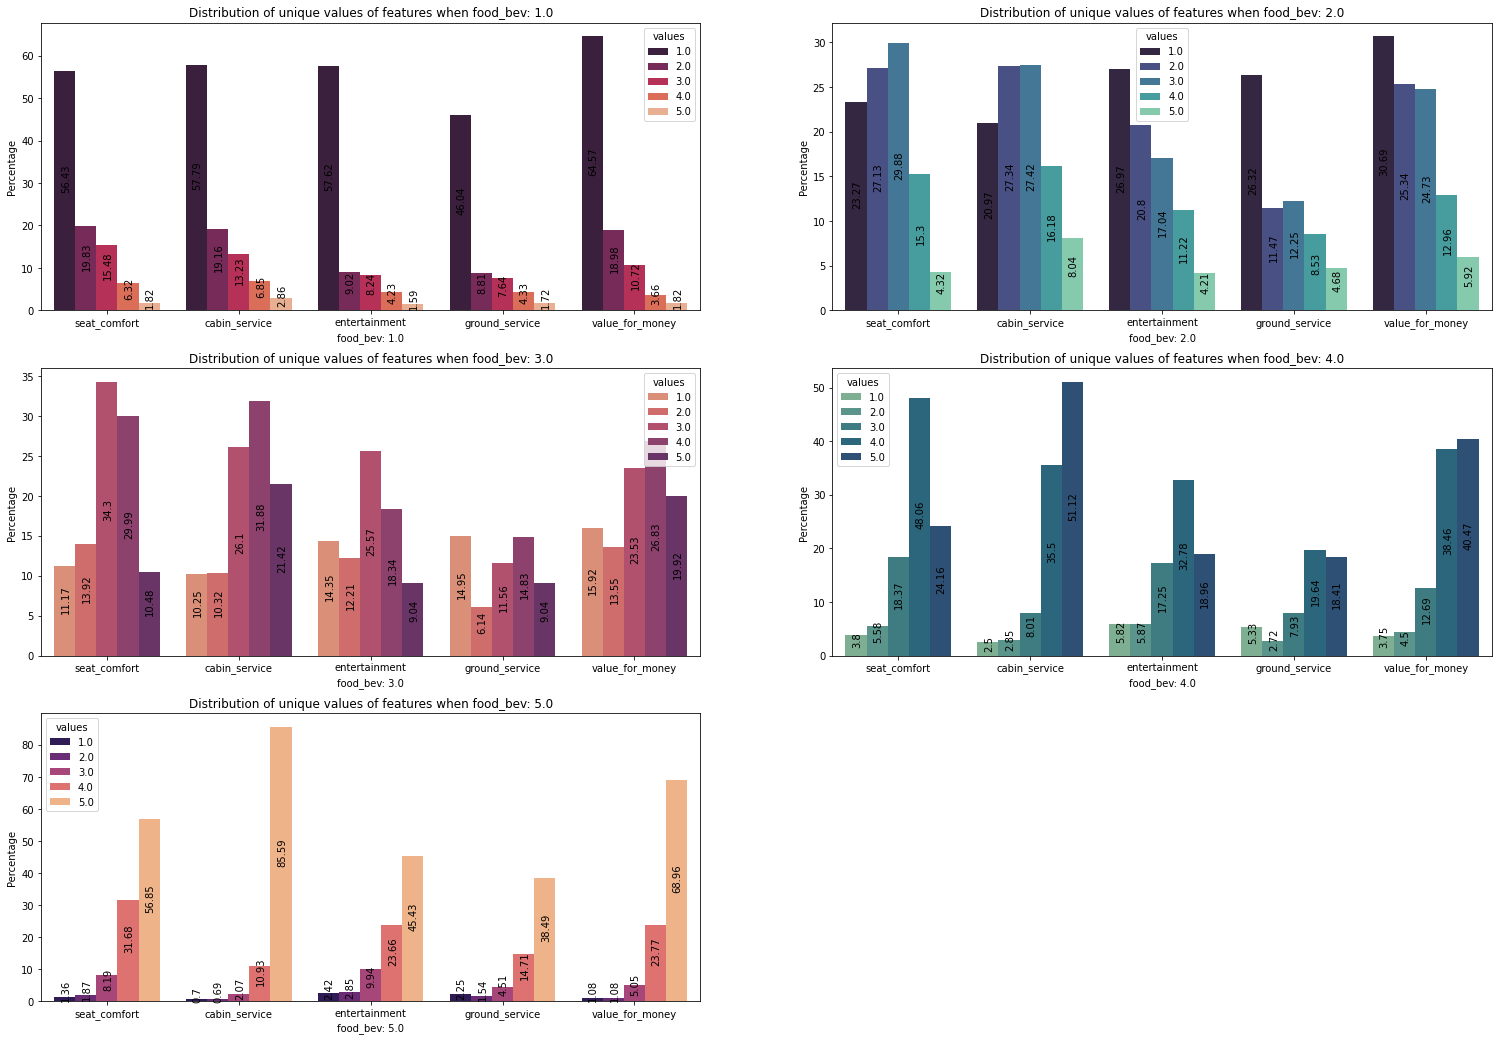

In [83]:
#----------------------------------------Block 54--------------------------------------

#analysing relation between food_bevrages and all other features
relation_plot('food_bev', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['food_bev']])

*As a business, it is important to understand that there is a strong correlation among customers who give low ratings for food and beverage. Over 50% of these customers also tend to give poor ratings (1) for other services, particularly seat comfort and value for money, with more than 70% of them giving a rating of 1.*

*Users who rate food and beverage highly (4) tend to also rate other services (seat comfort,cabin_service,entertainment,value for money) positively with over 50% giving high rating (4) to other services except ground service*

*Users who rate food and beverage highly(5) also tend to rate other in-flight services positively (4 and 5) with more than 50% of them , indicating that the food and beverage offered on a flight can greatly impact their overall satisfaction. As a business, it is important to pay attention to the quality and selection of food and beverage offered on flights in order to enhance the overall experience for users*

### ***Relation of entertainment feature with other 5 rating variables***

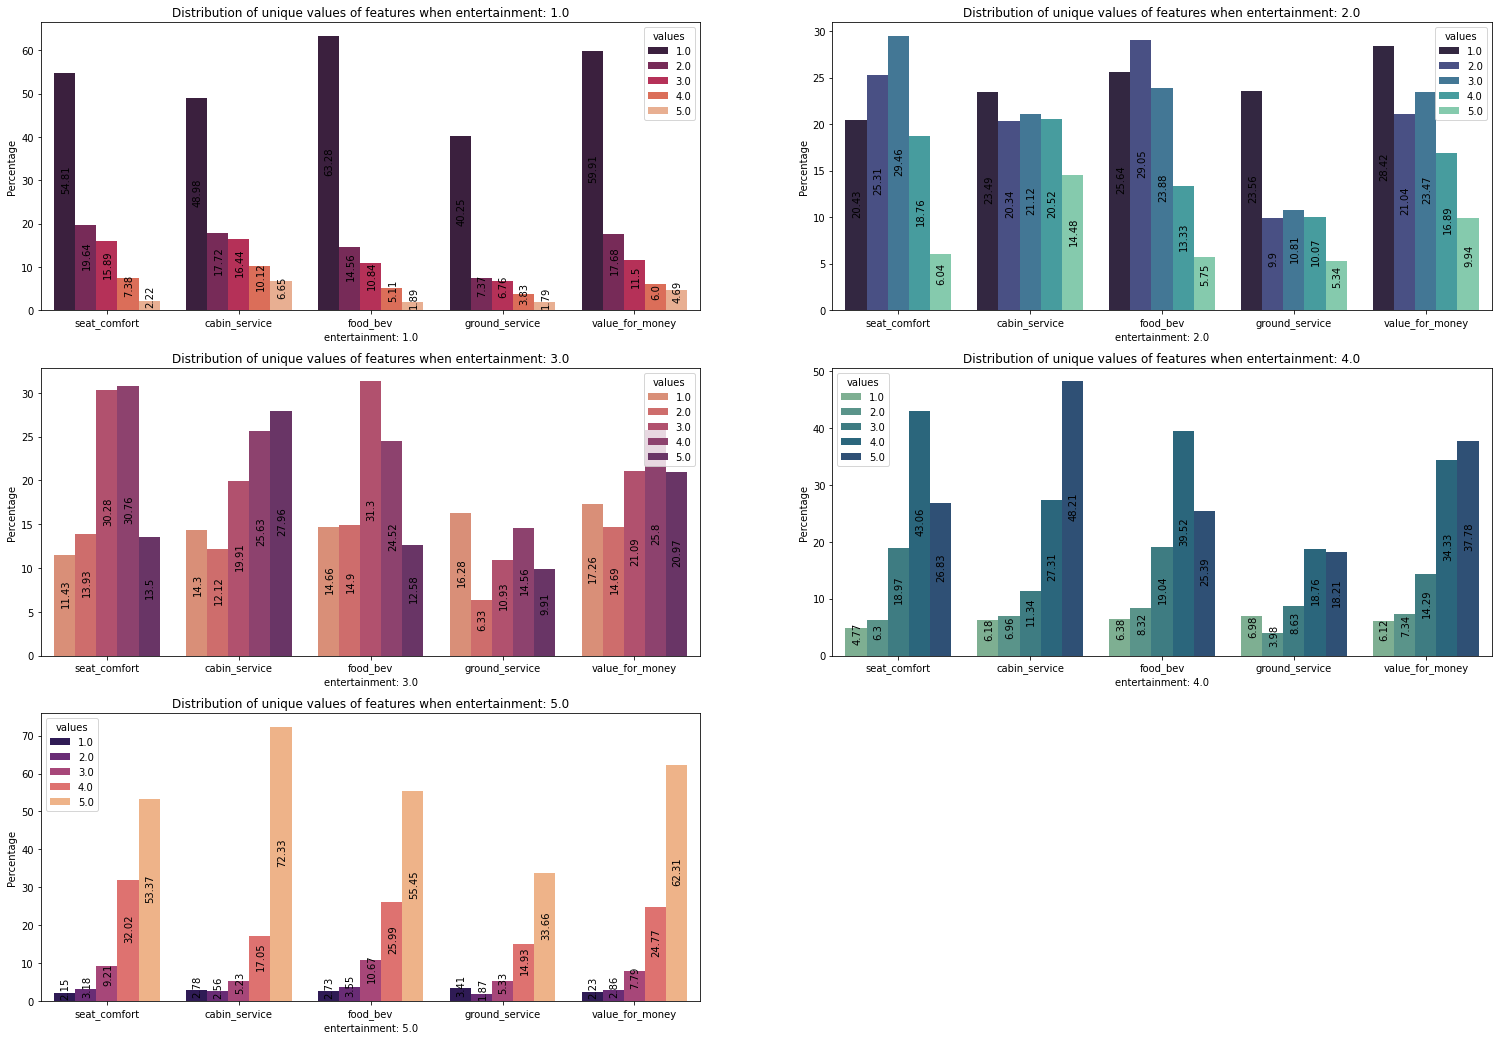

In [84]:
#----------------------------------------Block 55--------------------------------------

#analysing relation between entertainment and all other features
relation_plot('entertainment', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['entertainment']])

### ***Relation of value for money feature with other 5 rating variables***

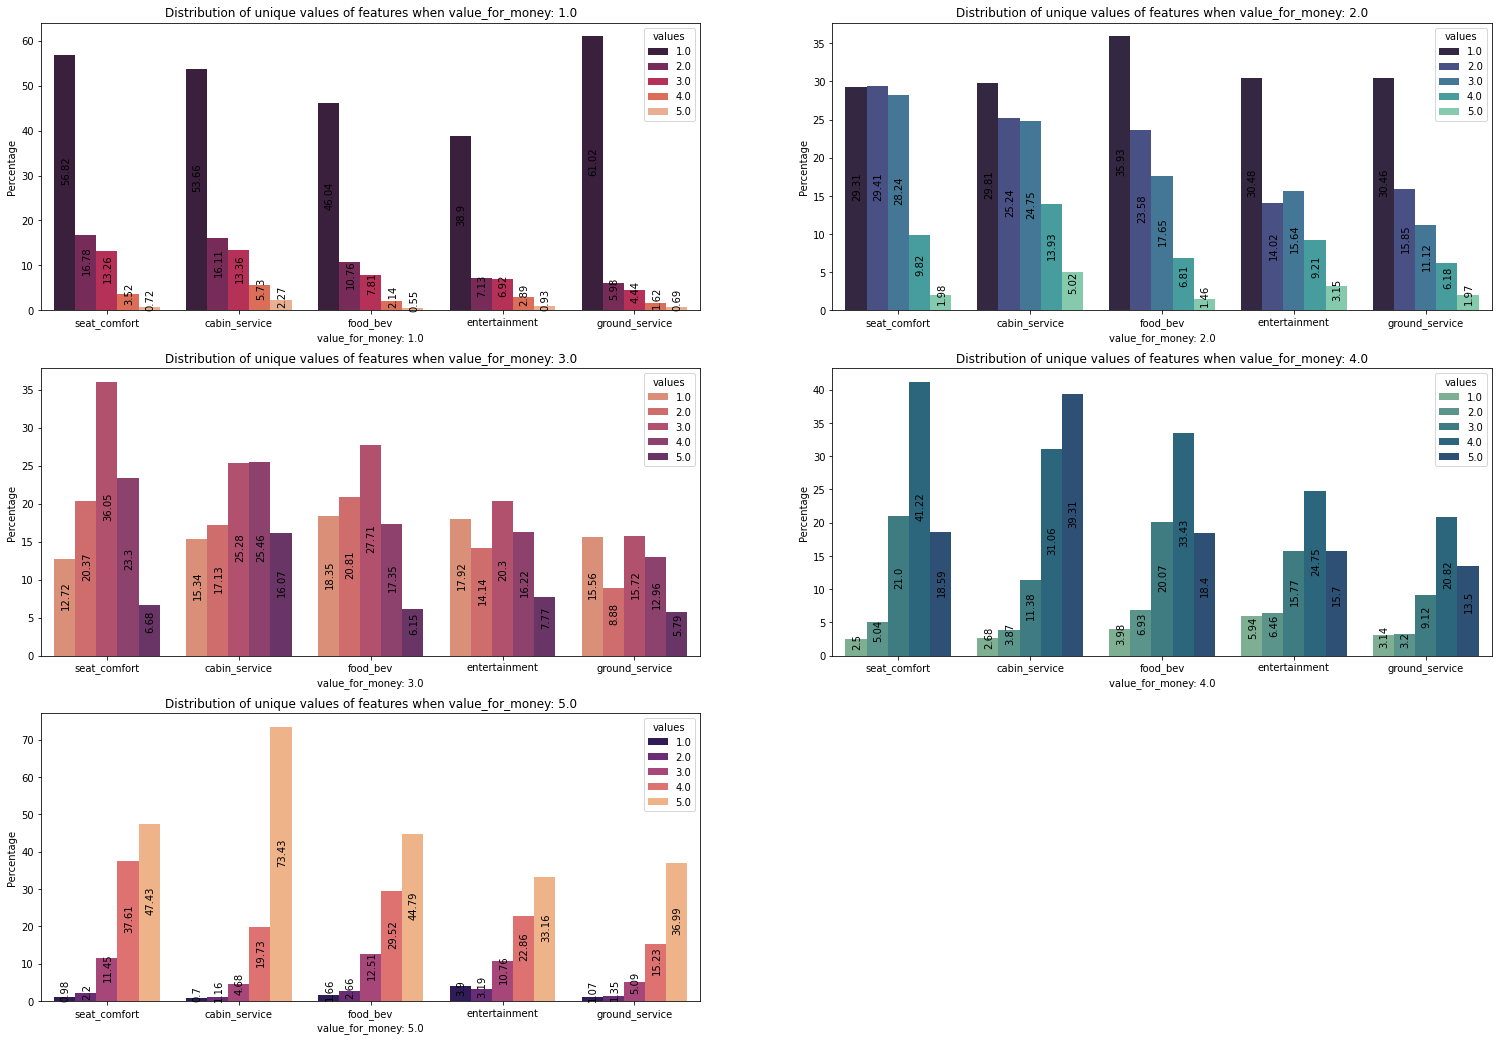

In [85]:
#----------------------------------------Block 56--------------------------------------

#analysing relation between value_for_money and all other features
relation_plot('value_for_money', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['value_for_money']])

*Similar pattern of relationship continues here as well of user giving 1 to value for money also giving lower(1 or 2) to other features as well but one thing worth noticing is that the percentages of user giving 4 or 5 to other features when giving 1 or 2 to value for money is very low. It informs that valur for money holds a strong effect*

### ***Relation of overall cat feature with other 5 rating variables***

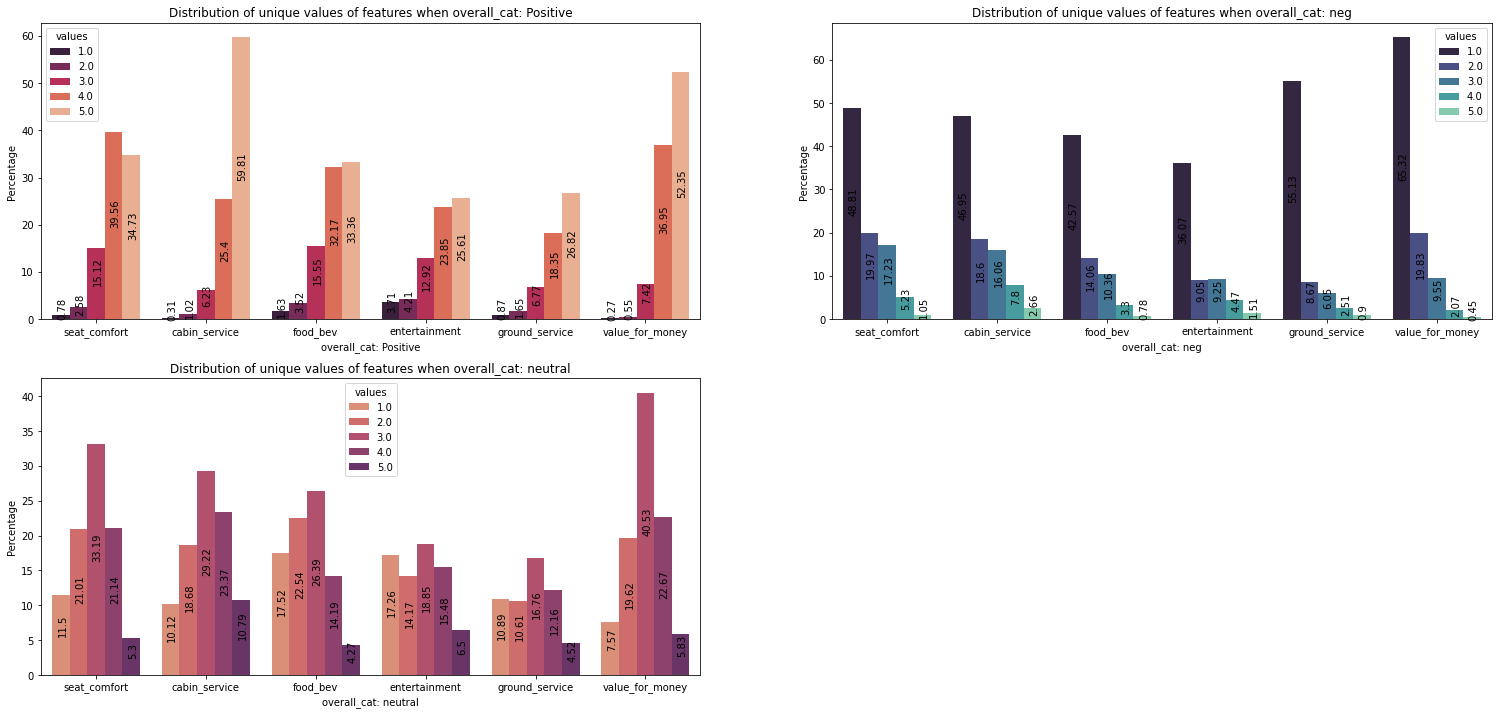

In [86]:
#----------------------------------------Block 57--------------------------------------

#analysing relation between overall_cat and all other features

relation_plot('overall_cat', [cols for cols in airline_data.columns if cols not in non_analysing_feat and cols not in ['overall_cat']])

*Similar relationship as value for money is here also for overall cat rating it seems to have a near to same strong effect as value for money*

*As looking all these visualizations we can see that probability that most of the time customers providing a higher rating to one should provide higher ratings to others as well*

*But at same time we are seeing that few customeres providing as high as 5 star rating to one of the services say seat comfort is providing lower rating to others and it is completely acceptable as these services are independent of each other*

# ***Analysis of Missing values***

<Figure size 720x720 with 0 Axes>

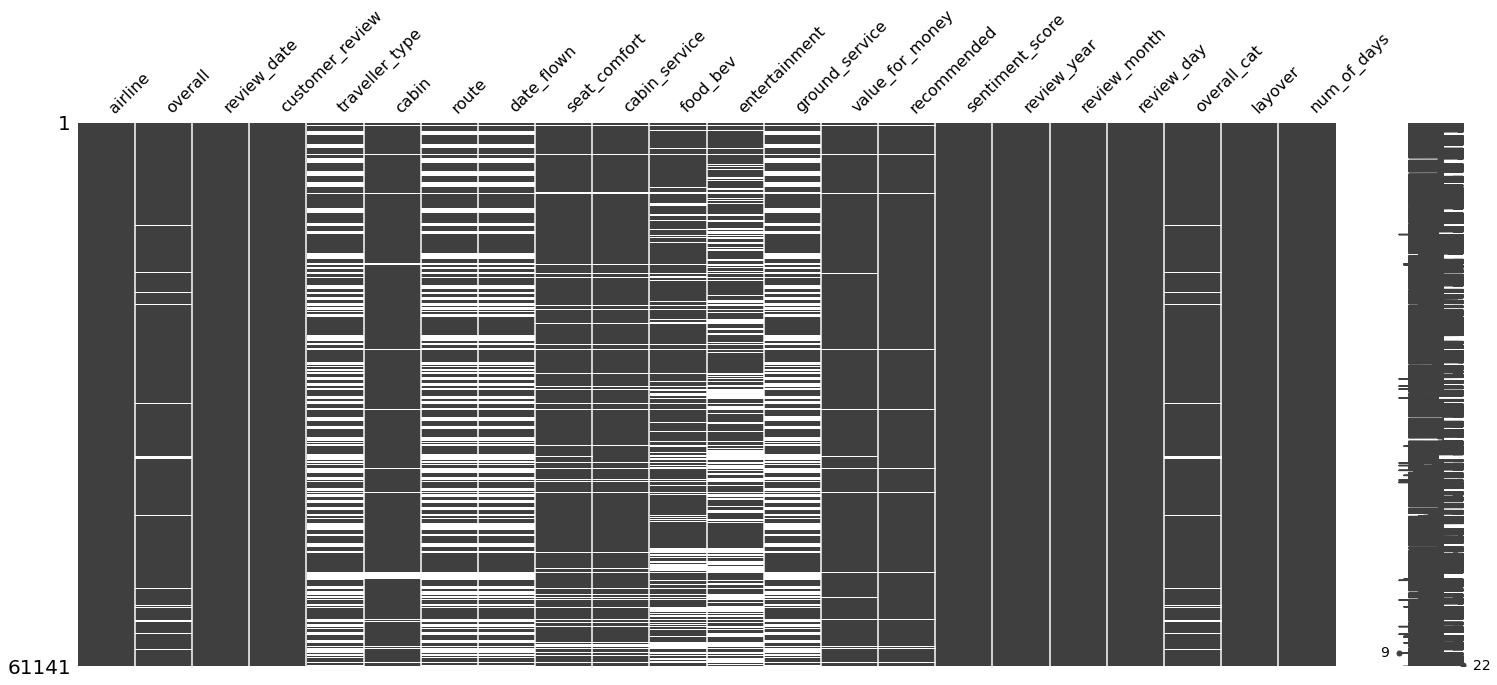

In [87]:
#----------------------------------------Block 58--------------------------------------

#analyzing missing values with respect to other features using missingno library 
plt.figure(figsize=(10,10))
msno.matrix(airline_data)

*Data seems to contain too many null values. We will try to analyze the missing pattern in data*



*Purpose of this is to understand is any of the feature value is differently distributed in missing data as compare to our orignal data*



In [88]:
def missing_analysis(features, missingvalue_df):
 '''This function will take features name list and missing data dataframe as an input and show us a 
    distribution of that feature in missing dataframe and orignal dataframe to see if there is any difference 
    in distribution and missing values are due to any specific values.'''
    
 '''For example if say there are total of 40% values of overall score 1 in a airline data and 40% are present in missing data then it 
    shows there is no chanhge in distribution of 1 rating.Consider another case if overall score 8 is appearing in nearly 30% of rows 
    in airline data and for missing data its appearing in 90% of rows then we can suggest that there is a pattern as people filling 8 
    mostly not filling the data'''
 
 for i,feat_name in enumerate(features):
  #length of missing data
  len_miss_data = len(missingvalue_df)

  #length of airline data
  len_airline_data = len(airline_data)
  
  #dictionary to store value counts of passed feature in missing dataset 
  missingdata_feat_dict = dict(missingvalue_df[feat_name].value_counts())

  #dictionary to store value counts of passed feature in complete airline dataset
  airlinedata_feat_dict = dict(airline_data[feat_name].value_counts())

  #iterating over keys in missing data to get the percent of total values of each unique values
  for key in missingdata_feat_dict.keys():
    missingdata_feat_dict[key] = round((missingdata_feat_dict[key]/len_miss_data)*100,2)

  #iterating over keys in airline data to get the percent of total values of each unique values
  for key in airlinedata_feat_dict.keys():
    airlinedata_feat_dict[key] = round((airlinedata_feat_dict[key]/len_airline_data)*100,2)
  
  #if any of the value of a feature is not there in missing data that is present in airline data then create a key for it in missing data and assign zero value top it 
  for key in airlinedata_feat_dict.keys():
    if key not in missingdata_feat_dict.keys():
      missingdata_feat_dict[key] = 0

  #sorting dictionaries by keys    
  missingdata_feat_dict = {key:missingdata_feat_dict[key] for key in sorted(missingdata_feat_dict.keys())}
  airlinedata_feat_dict = {key:airlinedata_feat_dict[key] for key in sorted(airlinedata_feat_dict.keys())}

  
  #to get a null values percentages from both the datasets
  airlinedata_feat_dict['Null'] = round((airline_data[feat_name].isnull().sum()/len_airline_data)*100,2)
  missingdata_feat_dict['Null'] = round((missingvalue_df[feat_name].isnull().sum()/len_miss_data)*100,2)

  #creating a dataframe from airline and missing data dictionaries
  missing_df = pd.DataFrame({feat_name : list(missingdata_feat_dict.keys()), 'Percentage' : list(missingdata_feat_dict.values())})
  airline_df = pd.DataFrame({feat_name : list(airlinedata_feat_dict.keys()), 'Percentage' : list(airlinedata_feat_dict.values())})
  
  #plot a figure 
  plt.figure(i+1)
  
  #canvas for subplot
  fig, axs = plt.subplots(1, 2, figsize= (30,8))

  #plotting a bar plot for distribution of values of airline data
  abc = sns.barplot(x = feat_name, y = 'Percentage', data = airline_df , ax = axs[0])
  axs[0].set_title('Distribution of ' + feat_name + ' in complete airline data')
  abc.tick_params(axis='x', rotation=90)

  #for getting text on bars
  for p in abc.patches:
      axs[0].text(p.get_x()+0.05,  (p.get_height()-(0.5*p.get_height())), str(p.get_height()), rotation = 'vertical')

  #plotting a bar plot for distribution of values of missing data
  adf = sns.barplot(x = feat_name, y = 'Percentage', data = missing_df , ax = axs[1])
  axs[1].set_title('Distribution of ' + feat_name + ' in missing data')
  adf.tick_params(axis='x', rotation=90)
  #for getting text on bars
  for p in adf.patches:
      axs[1].text(p.get_x()+0.05,  (p.get_height()-(0.5*p.get_height())), str(p.get_height()), rotation = 'vertical')

In [89]:
#----------------------------------------Block 60--------------------------------------

#print value count function
def print_value_counts(feat_name, dataset):
  print('Value counts for overall in missing data : ')
  print(dataset[feat_name].value_counts())
  print('Value counts for overall in airline data : ')
  print(airline_data[feat_name].value_counts())


In [90]:
#----------------------------------------Block 61--------------------------------------

def null_check(feat_name):
  #checking percentage and no. of rows having null value in cabin data
  print('Number of rows having recommended column as Null : ', airline_data[feat_name].isnull().sum())
  print('Percentage of missing value for recommended : ' ,round(airline_data[feat_name].isnull().sum()/len(airline_data)*100, 2), ' %')

# *Recommended feature missing value analysis*

In [91]:
#----------------------------------------Block 62--------------------------------------

#checking for percentage and no. of rows for which recommend column is null
null_check('recommended')

Number of rows having recommended column as Null :  1422
Percentage of missing value for recommended :  2.33  %


*Percentages of row having null values are considerably low. We will analyze further to see if we can impute the values or will delete the rows*

In [92]:
#----------------------------------------Block 63--------------------------------------

#creating sub dataframe where all the values of recommended are null
missing_recommended_data = airline_data[airline_data['recommended'].isnull()]
missing_recommended_data.name = 'Recommended Null Data' 

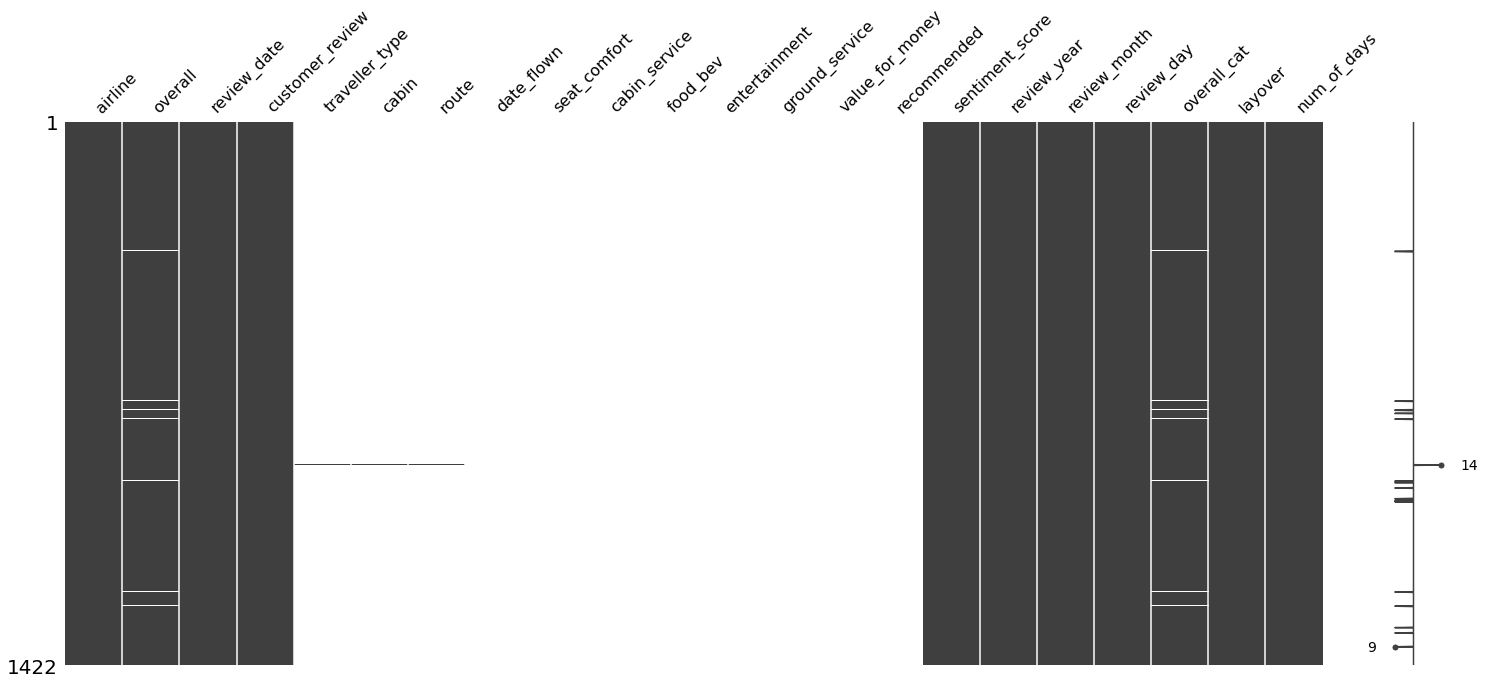

In [93]:
#----------------------------------------Block 64--------------------------------------

#visualising the matrix to understand the pattern at bigger picture
msno.matrix(missing_recommended_data)

*So most of the other features also have null values at the places where recommend is null*

*Missing value of recommend seems to be forming a pattern with unobserved values of other features*

*We'll try to understand these with the other observed features like overall score, review date and check if any pattern can be distinguished*

*As of now understanding from the chart above it seems to be following missing not at random(MNAR) pattern as there is a pattern in missingness with unobserved data*

###*Analysing missing values for recommend*

<Figure size 432x288 with 0 Axes>

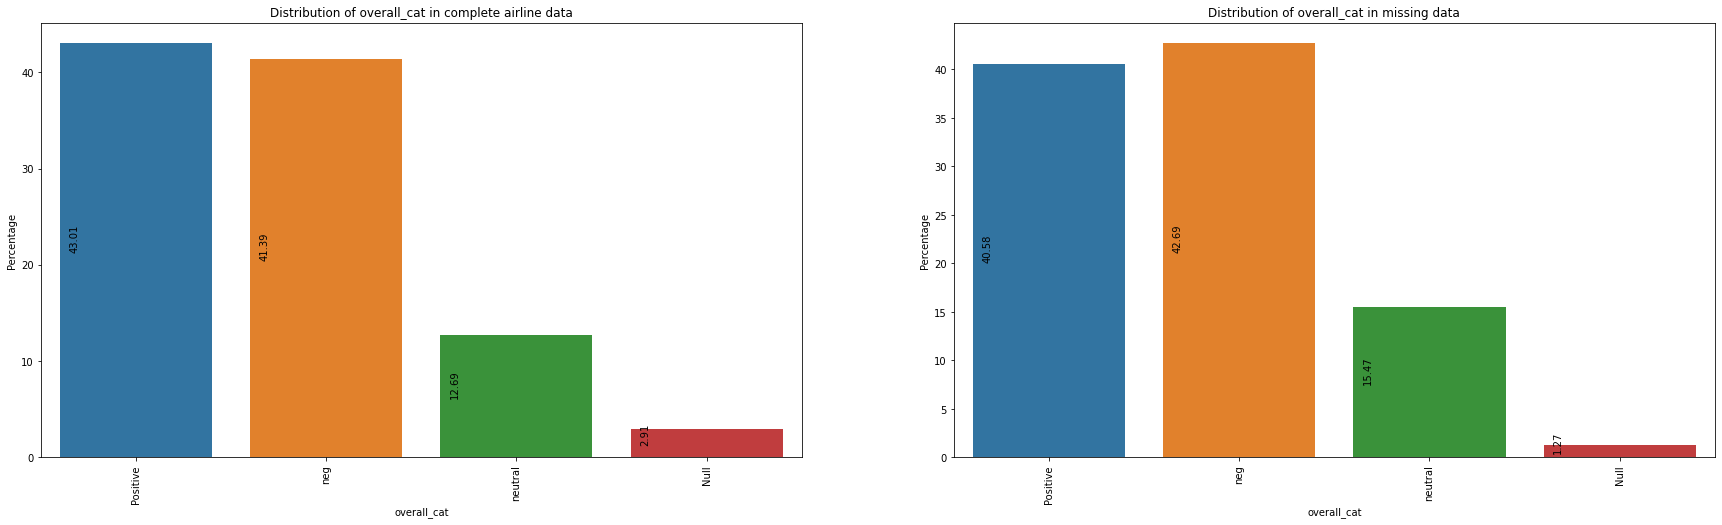

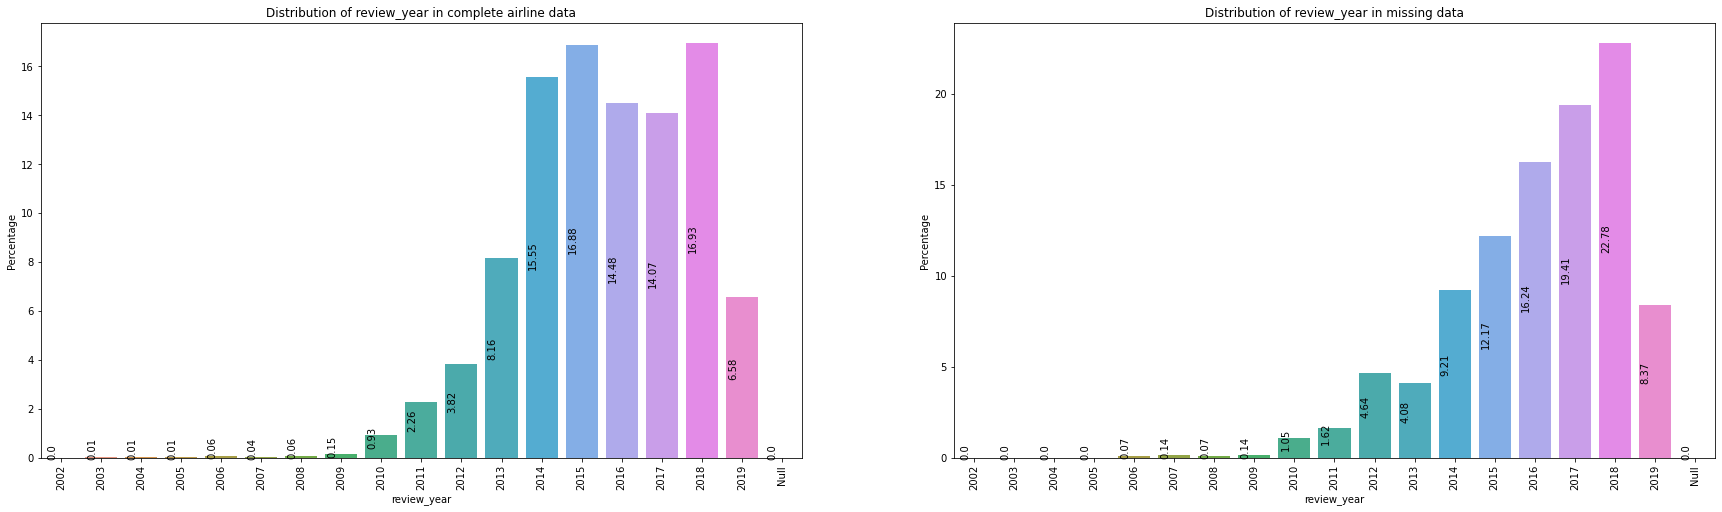

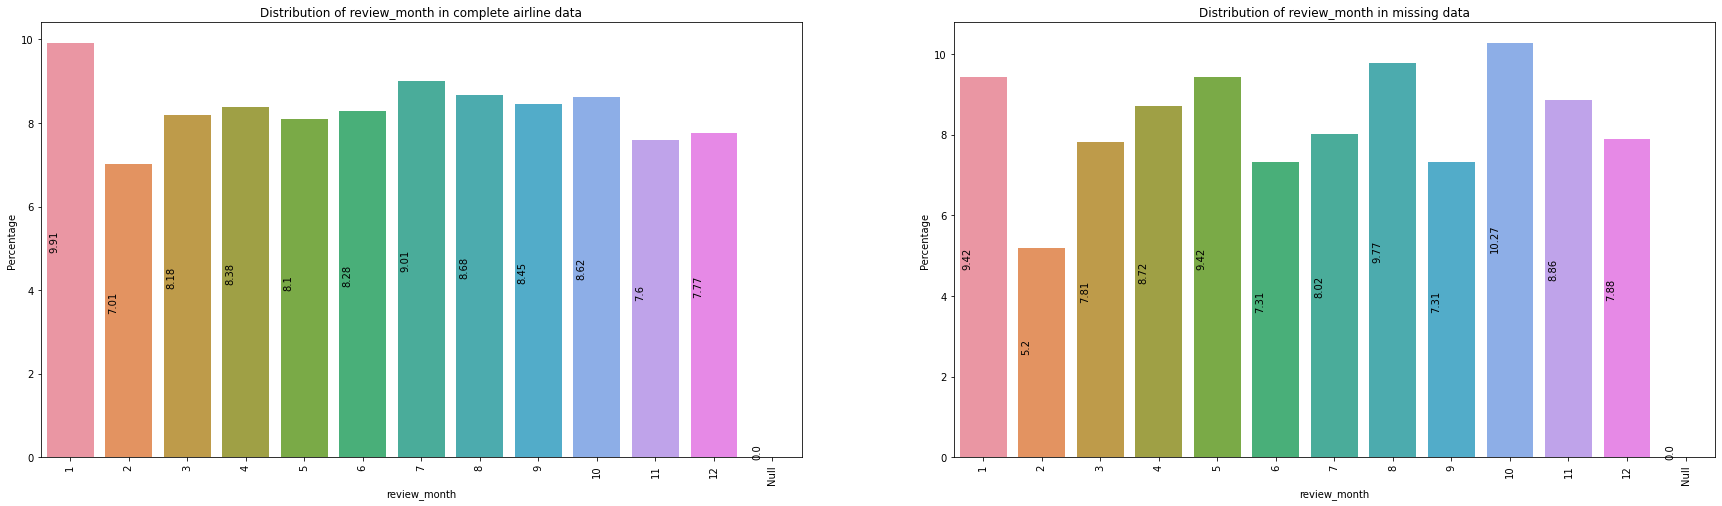

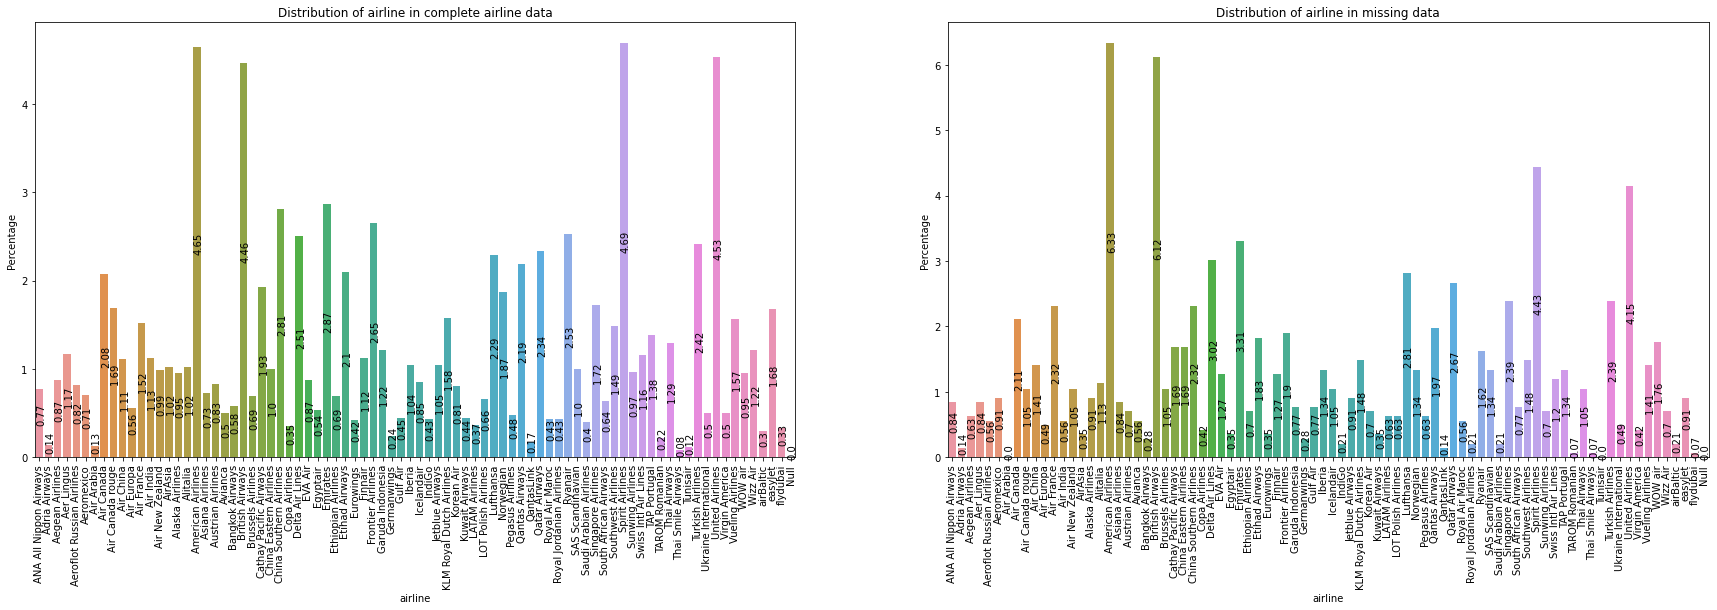

In [94]:
#----------------------------------------Block 65--------------------------------------

#calling percent of total function for oveerall feature and missing recommend data
missing_analysis(['overall_cat','review_year','review_month','airline'], missing_recommended_data)

###*Conclusion on analysis of missing recommend data*

*1. There seems to be not much of a distinguishable or differentaiting pattern among other value of overall features. Roughtly they are distributed on the same scale.But we can note that peoples who haven't updated the recommended column tend to give less positive rating or negative rating and more of a mediocer(neutral) ratings*

*2. We dont have any missing values of recommended in year 2002 to 2005 and also even there is a surge in 2007 but in total we have 23 entries for year 2007 out of which only 2 has missing values in recommended columns. We have bit higher missing values in later years like 2017,18 and 19.So we dont have any defined pattern with respect to years as well*

*3. Difference between percentages for months as well is not quite high values for 2nd, 10th and 11th month are differentiating themselves from other but to not that extend that can justify for existence of pattern*

*4. We have few more missing values of recommend features in Gulf, Wow and Latam air and few less in Fly dubai,tarom and airasia. But there is no such pattern for most of them belongin to any two or three or 10 airlines it seems to be distributed among all*


*There seems to be no distinctible pattern that help us understand the reason of missingness wit the help of observed data*

*There seems to be a relation between missingness and some unobserved data forming MNCAR and assumption that we can made here is that some user refuses to fill these values and submit the form because they might not set as compulsion to fill as we doesnt have a business or stakeholders here to discuss its affect and cause of the missingness. Best option for these value is coming out to be dropping off*  

In [95]:
#----------------------------------------Block 73--------------------------------------

#keeping all the rows where recommended is not null
airline_data = airline_data[airline_data['recommended'].notnull()]

# *Cabin feature missing value analysis*

In [96]:
#----------------------------------------Block 74--------------------------------------

#different values of cabin 
airline_data['cabin'].value_counts()

Economy Class      45146
Business Class      9578
Premium Economy     2410
First Class         1528
Name: cabin, dtype: int64

In [97]:
#----------------------------------------Block 75--------------------------------------

#checking percentage and no. of rows having null value in cabin data
null_check('cabin')

Number of rows having recommended column as Null :  1057
Percentage of missing value for recommended :  1.77  %


*Percentages of row having null values are considerably low here as well. We will analyze further to see if we can impute the values or will delete the rows*

In [98]:
#----------------------------------------Block 76--------------------------------------

#creating a sub dataframe for rows where cabin is null
missing_cabin_data = airline_data[airline_data['cabin'].isnull()]
missing_cabin_data.name = 'Cabin Null Data'

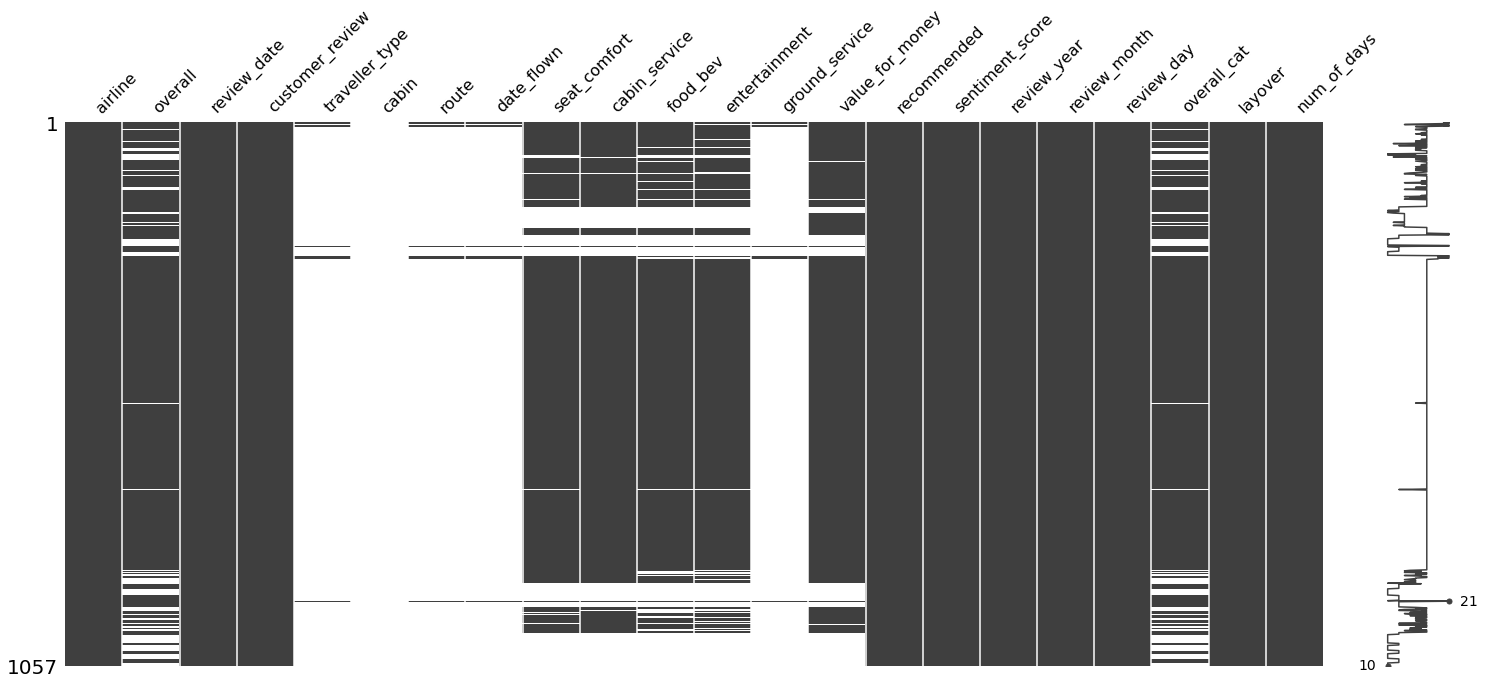

In [99]:
#----------------------------------------Block 77--------------------------------------

#visualising missing dataframe matrix
msno.matrix(missing_cabin_data)

*One visible relation  ius that the information about cabin, route, date flown and traveller type is missing at the same places along with entertainment and ground service*

*Cabin, route, date flown and traveller type are somewhere traveller information like in which cabin, at which location and on which date they travelled and seems like some user is not open to share those details*



###*Analysing missing cabin data*

<Figure size 432x288 with 0 Axes>

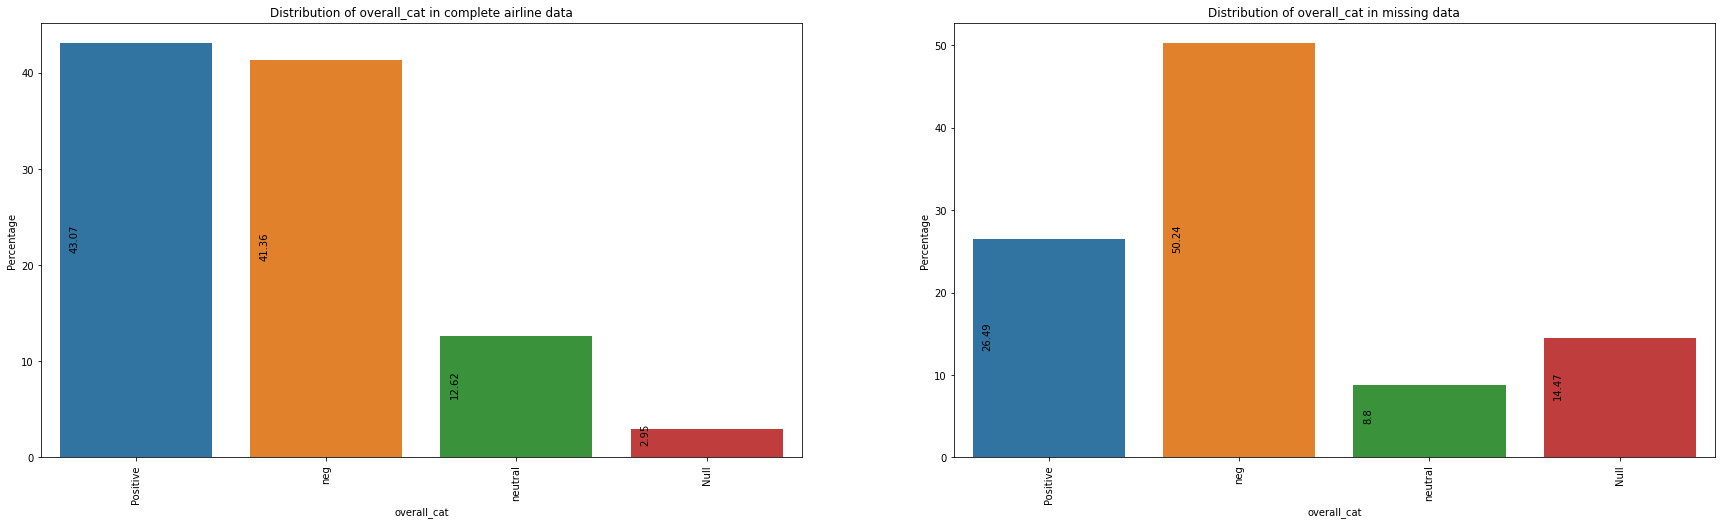

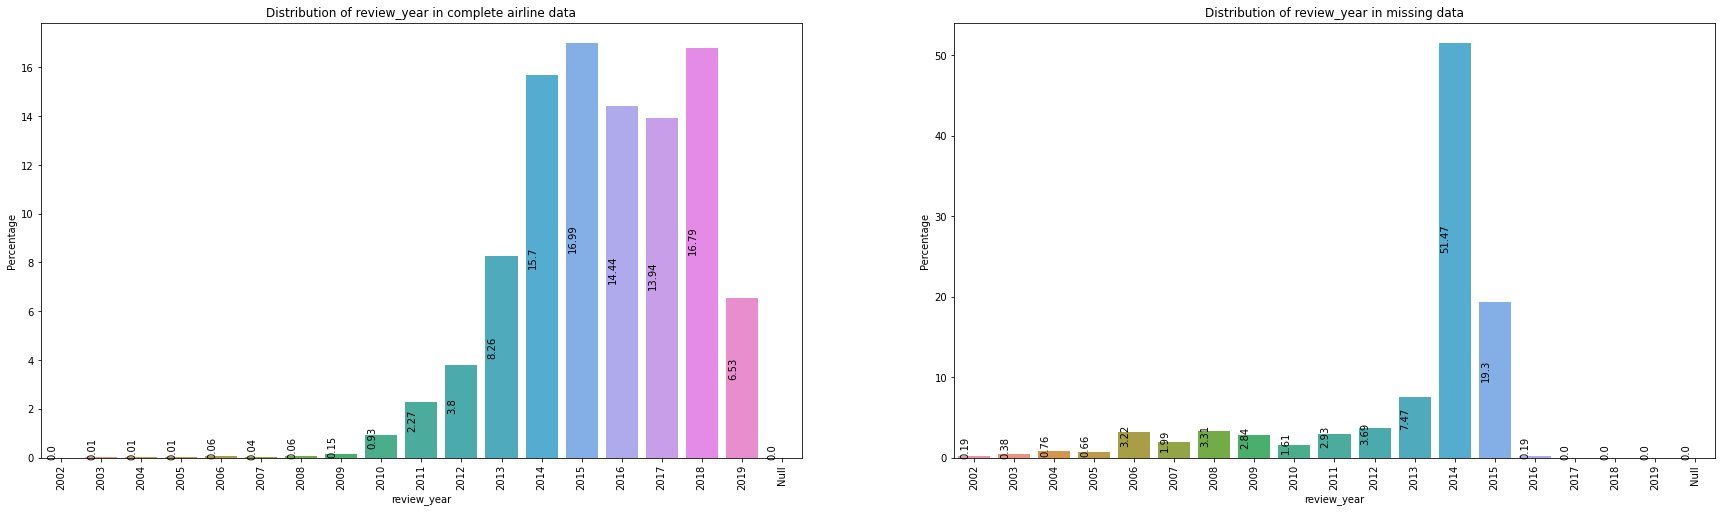

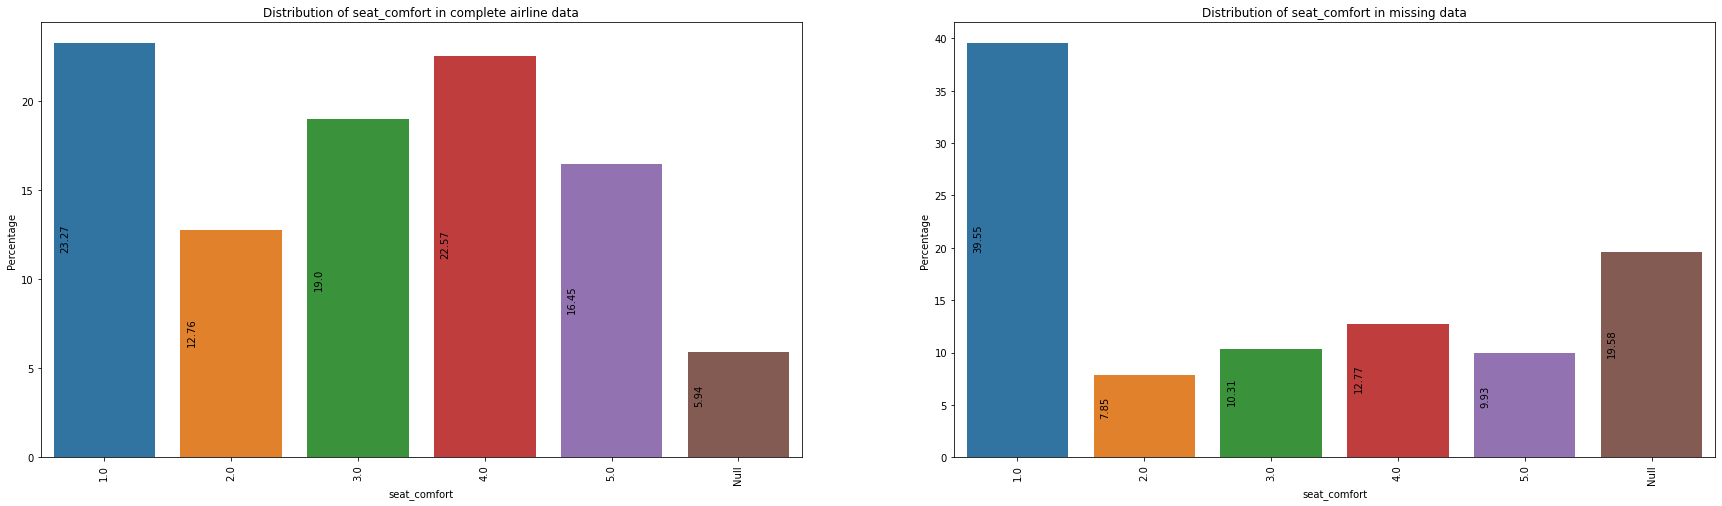

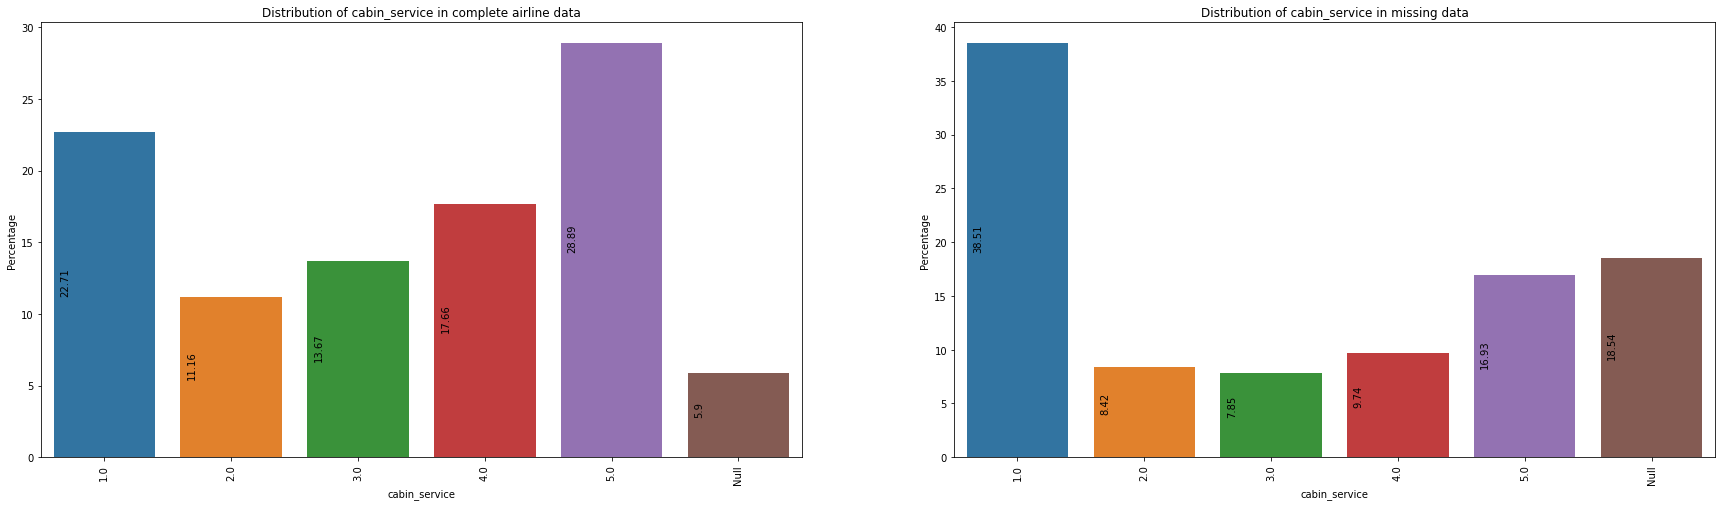

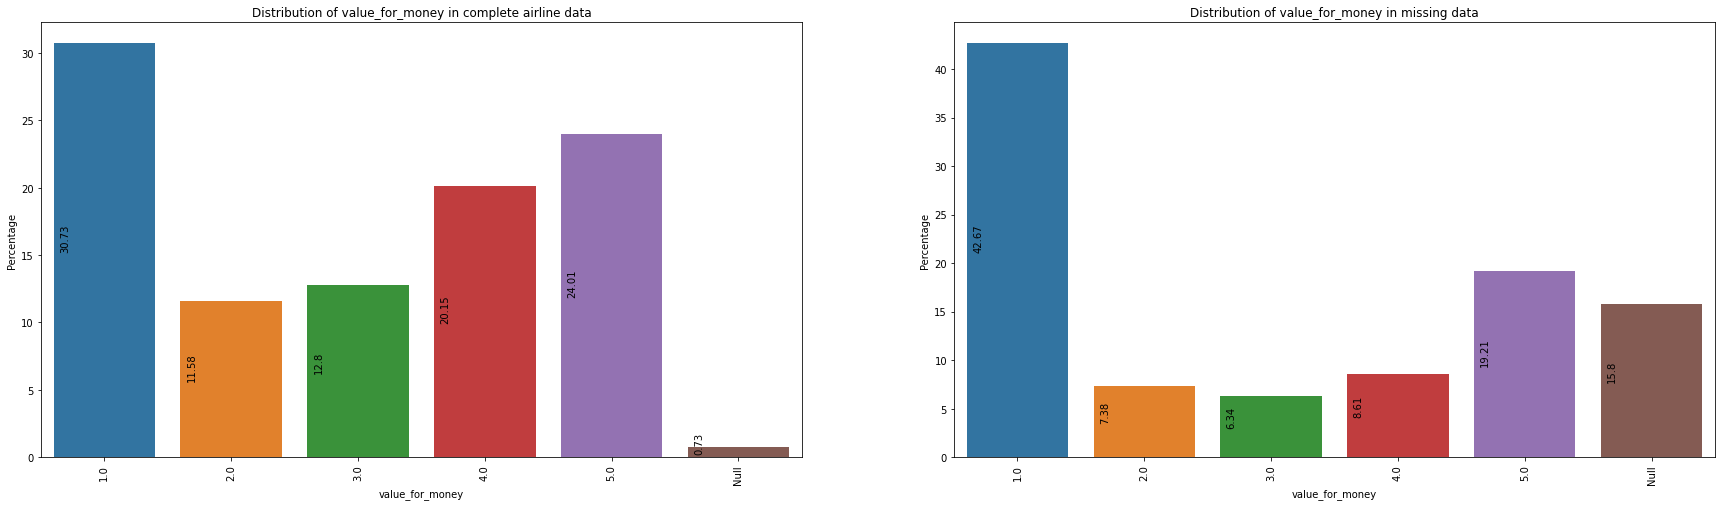

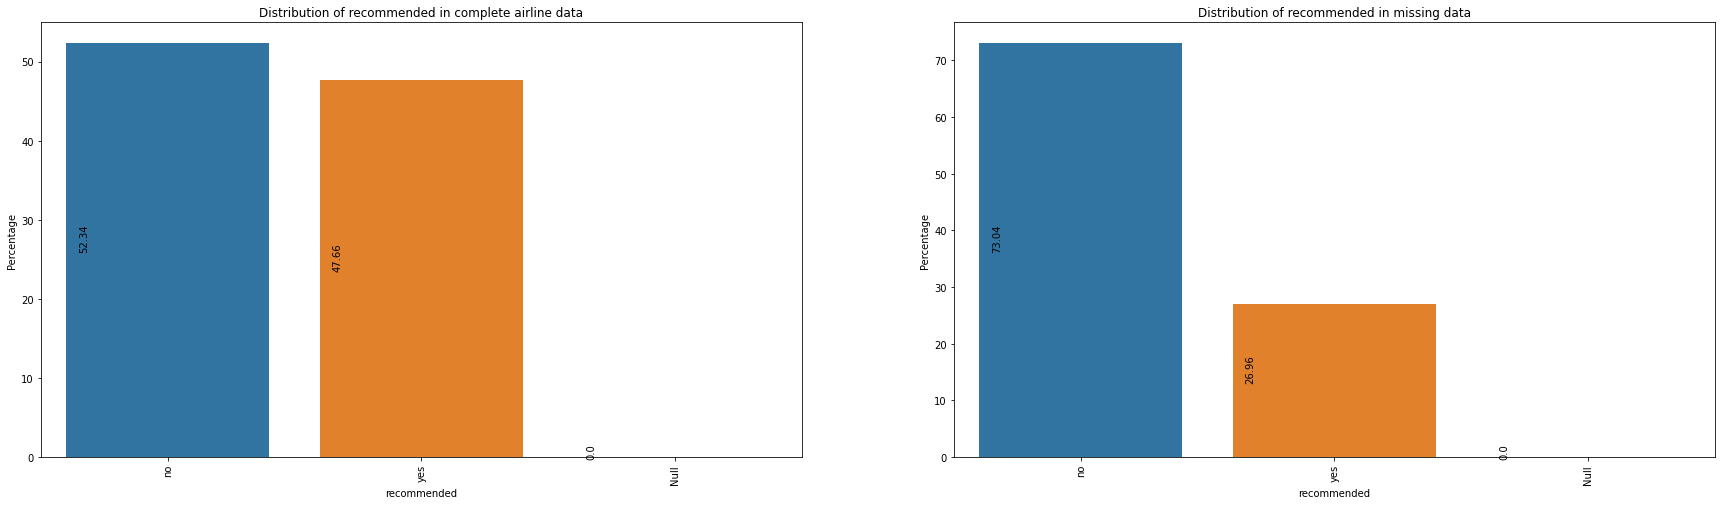

In [100]:
missing_analysis(['overall_cat', 'review_year', 'seat_comfort', 'cabin_service', 'value_for_money', 'recommended'],missing_cabin_data)

###*Conclusion of analysis on missing cabin data*

*1. Forms in which user is not filling cabin data are most who are not interested in giving overall rating as well and after that they are more likely to give negative ranking*

*2. In initial years (2002 to 2009) user is intendedly not filled cabin details. But at the same time if we see combinely from 2002 to 2009 we in total have nearly 231 observations that is nearly 0.3 or 0.4 % of our total data. So again it wont prove to be a effective pattern.We can say either data is not properly collected for these years or airlines use to less often take feedbacks from users. Also there is a bit surge in missing cabin data for year 2014*

*3. There is a generalised pattern for the ratings data user not filling the cabin details are seems to be more of a non happy customer as high percentage of them are either not giving the ratings or giving 1 ratings to other asked rating things.*

*4. For value for money rating mostly users are not intersted in rating it for value for money.*

*5. Comparitively higher people are not recomendding the flight where cabin information is missing*

*Although the differences are not quite high but still we can conclude or say that most of users are avoiding to fill the cabin data either if they doesn't like airline services or they are not at all interested in filling the complete details* 

# *Seat comfort feature missing value analysis*

In [101]:
null_check('seat_comfort')

Number of rows having recommended column as Null :  3550
Percentage of missing value for recommended :  5.94  %


In [102]:
missing_seat_data = airline_data[airline_data['seat_comfort'].isnull()]
missing_seat_data.name = 'seat null data'

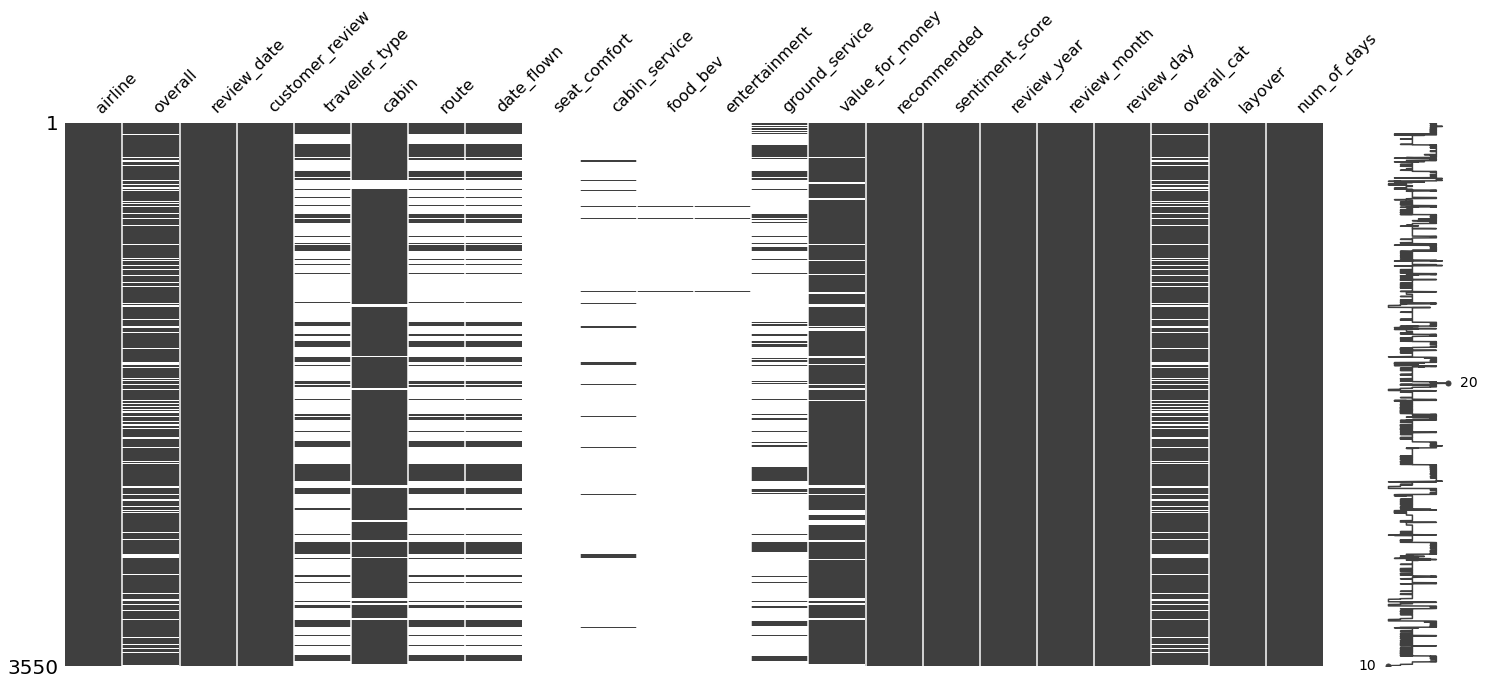

In [103]:
msno.matrix(missing_seat_data)

*Except value for money other rating feature also mostly have null values only where seat comfort is missing*

###*Analysing missing seat data*

<Figure size 432x288 with 0 Axes>

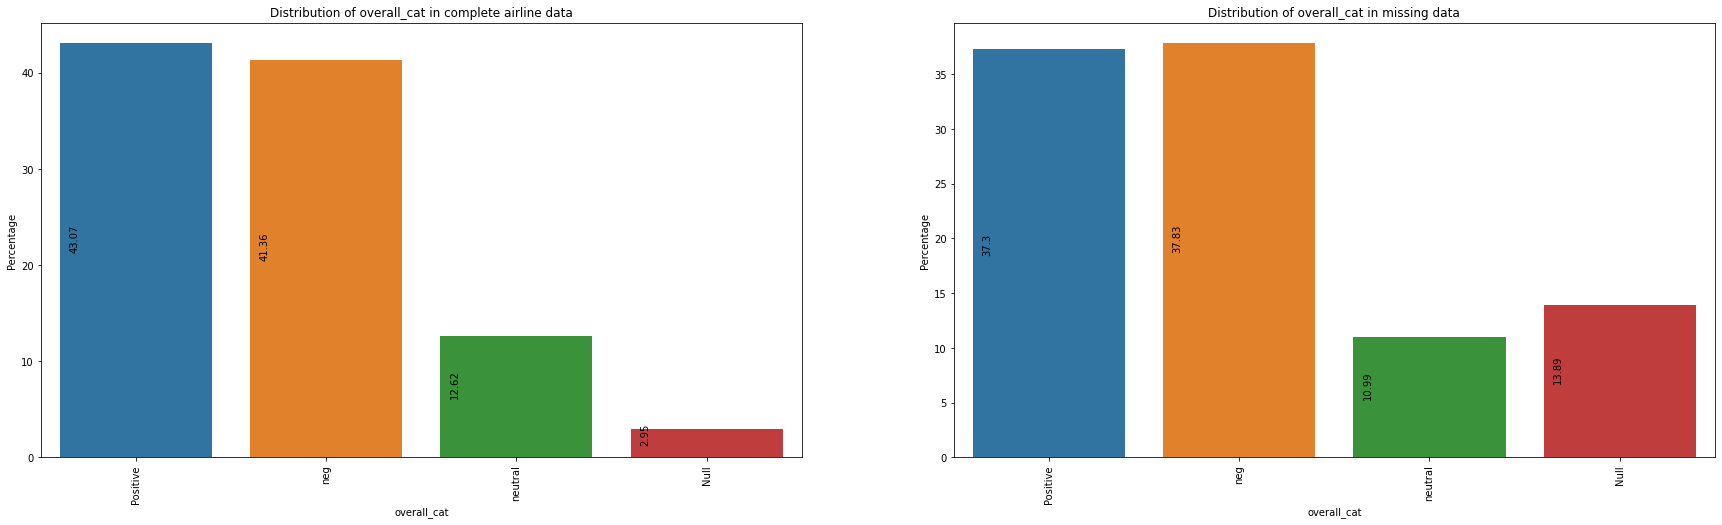

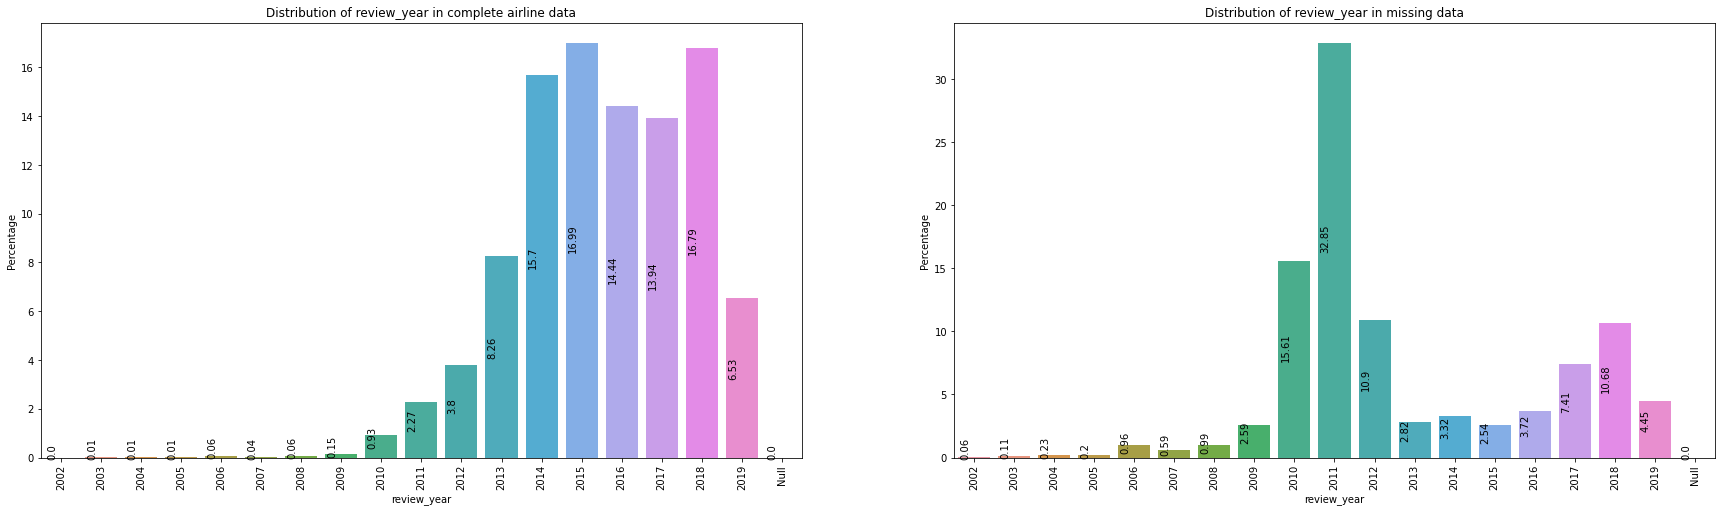

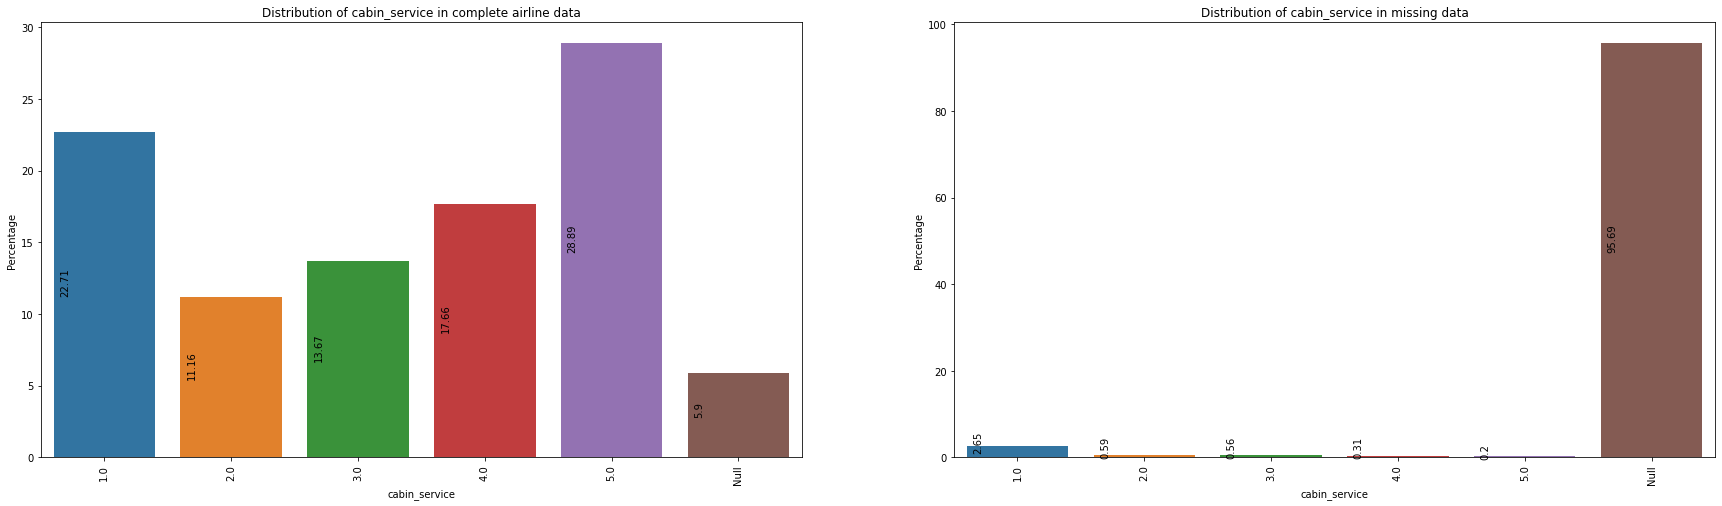

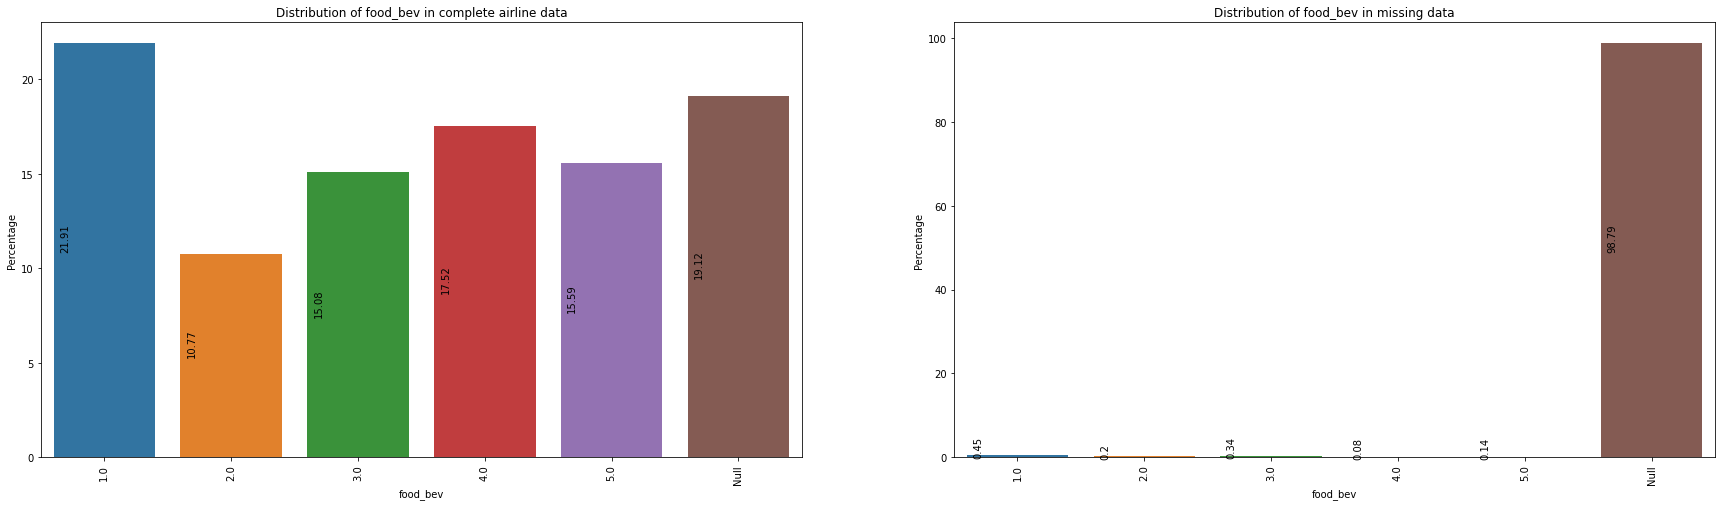

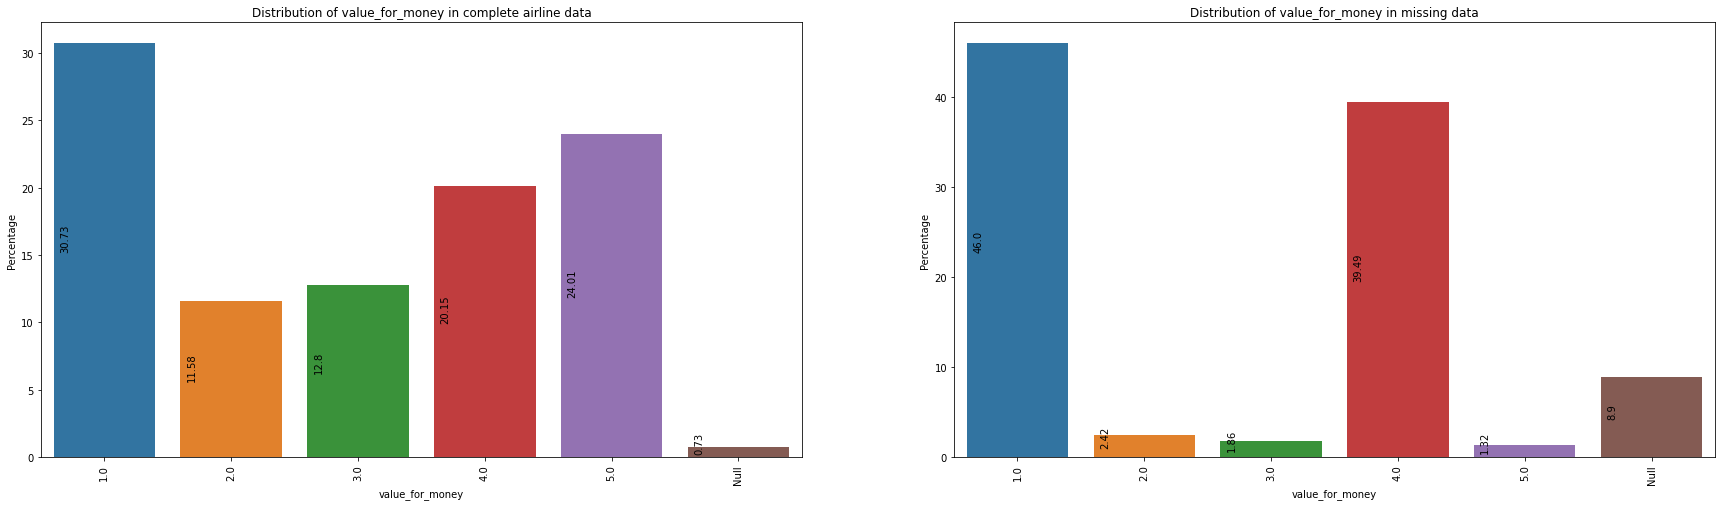

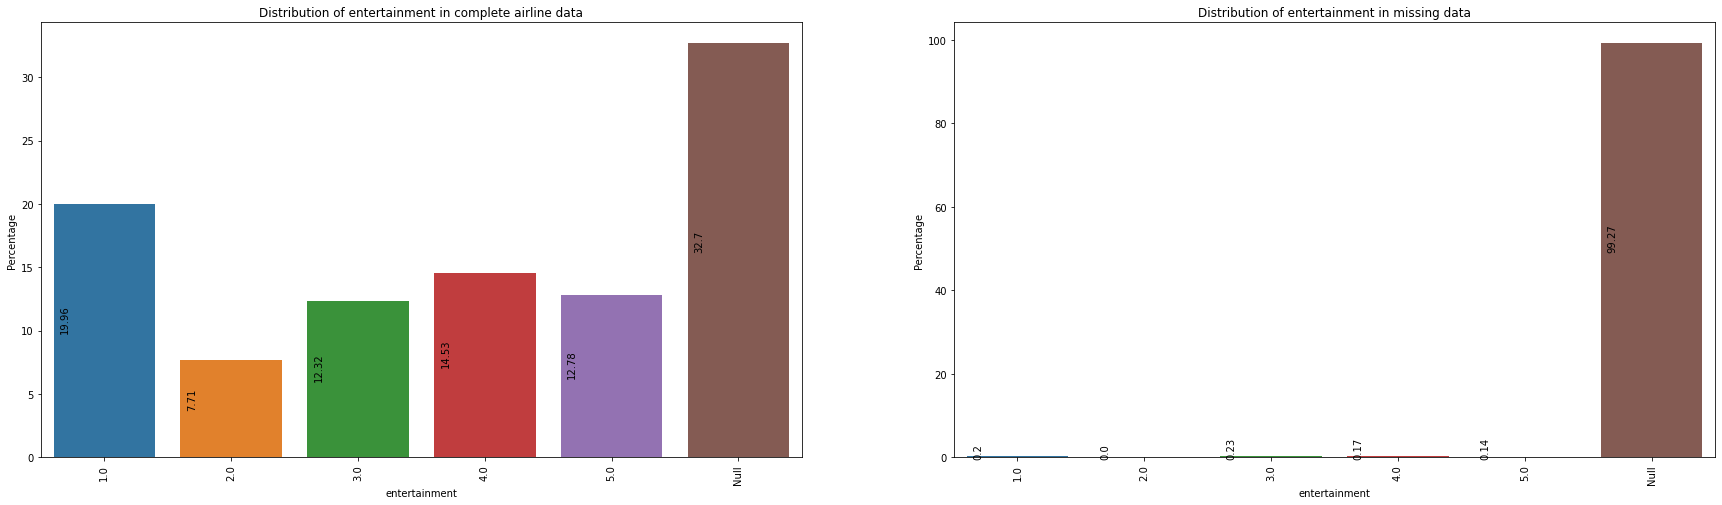

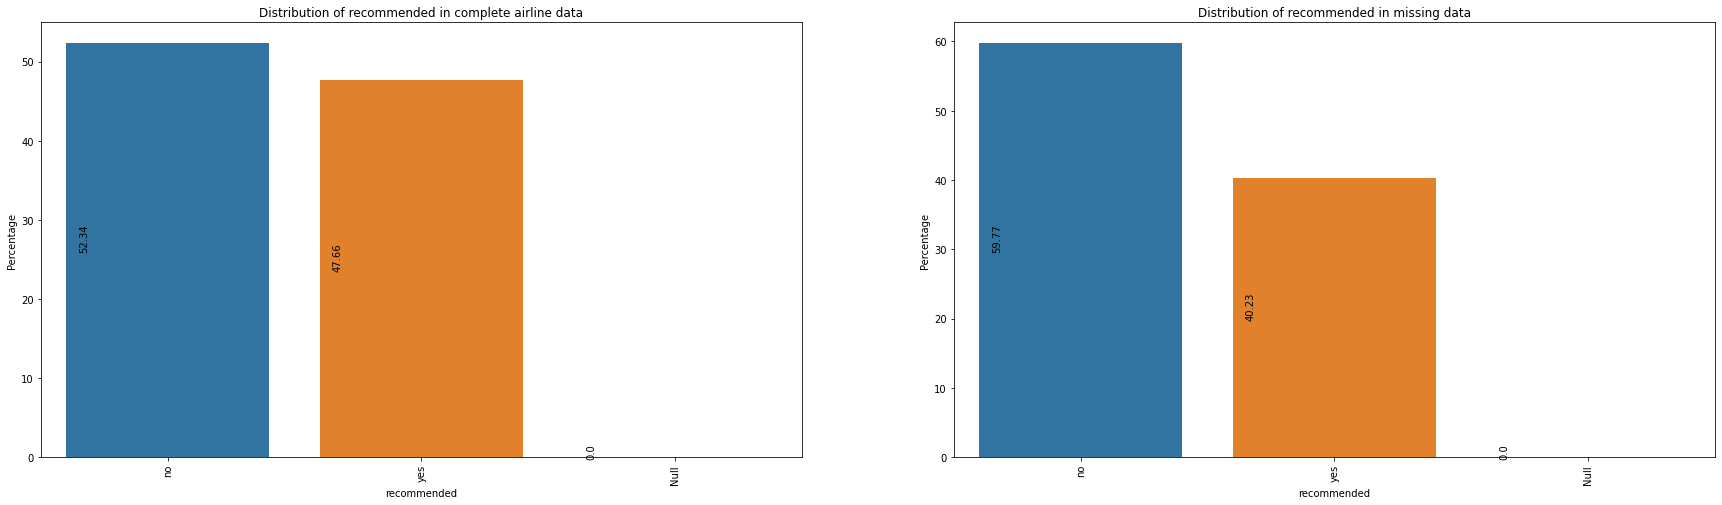

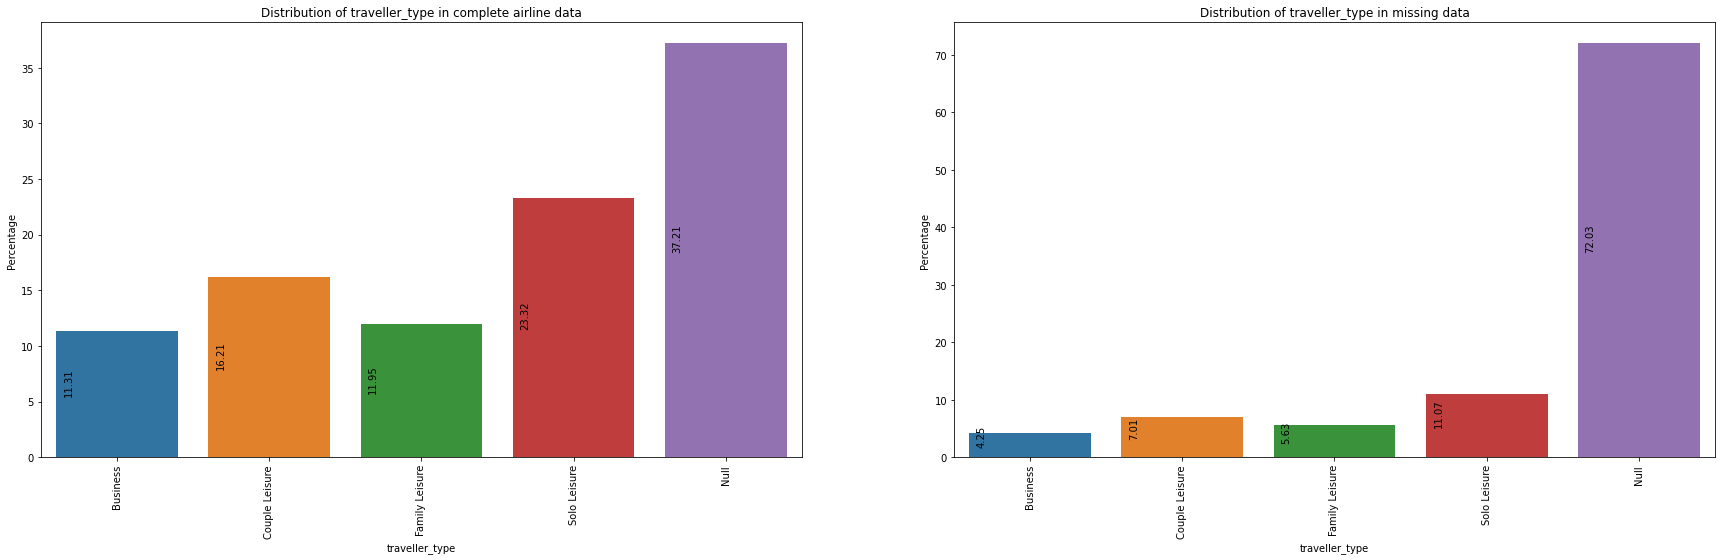

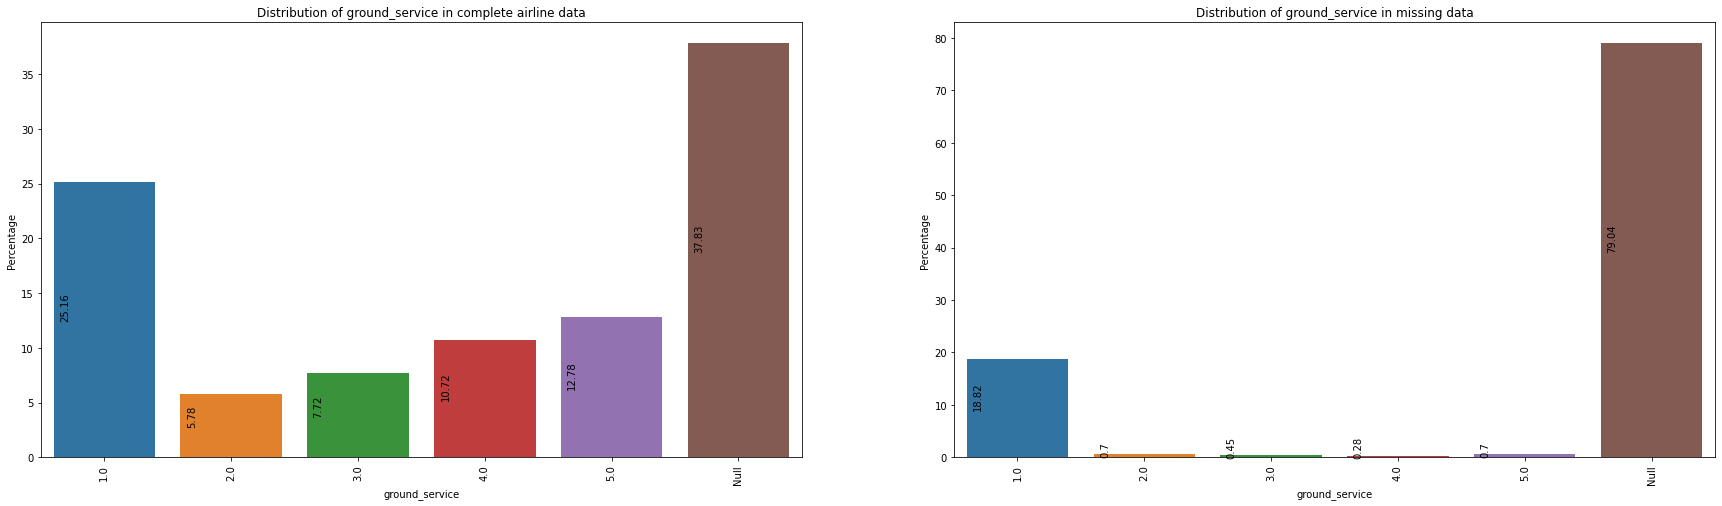

In [104]:
missing_analysis(['overall_cat', 'review_year', 'cabin_service','food_bev', 'value_for_money','entertainment', 'recommended', 'traveller_type', 'ground_service'], missing_seat_data)

###*Conclusion on analysis of missing seat data*

*1. There are no diffrence in overall rating categories for users not filling seat comfort, users who are not filling seat comfort equally giving positive, neutral and negative ranking.Other than  most of the user who are not entring seat comfort mostly not giving overall rating* 

*2. So no user from 2002 to 2010 has rated seat comfort even in 2011 almost 80 percent of users haven't rated seat comfort. Also 20% in 2012 whereas for further year its negligible*

*3. Rating features like ground service, entertainment, food_bev and cabin_service are almost null where user has missed to fill seat comfort*

*4. Most of the users are rating value for money, few of them if ratings are giving below average rating only*

*5. Missing seat comfort rating doesn't affect the recommendation much*

# *Food Beverage rating feature missing value analysis*

In [105]:
null_check('food_bev')

Number of rows having recommended column as Null :  11420
Percentage of missing value for recommended :  19.12  %


In [106]:
missing_food_bev_data = airline_data[airline_data['food_bev'].isnull()]
missing_food_bev_data.name = 'food bev Null Data'

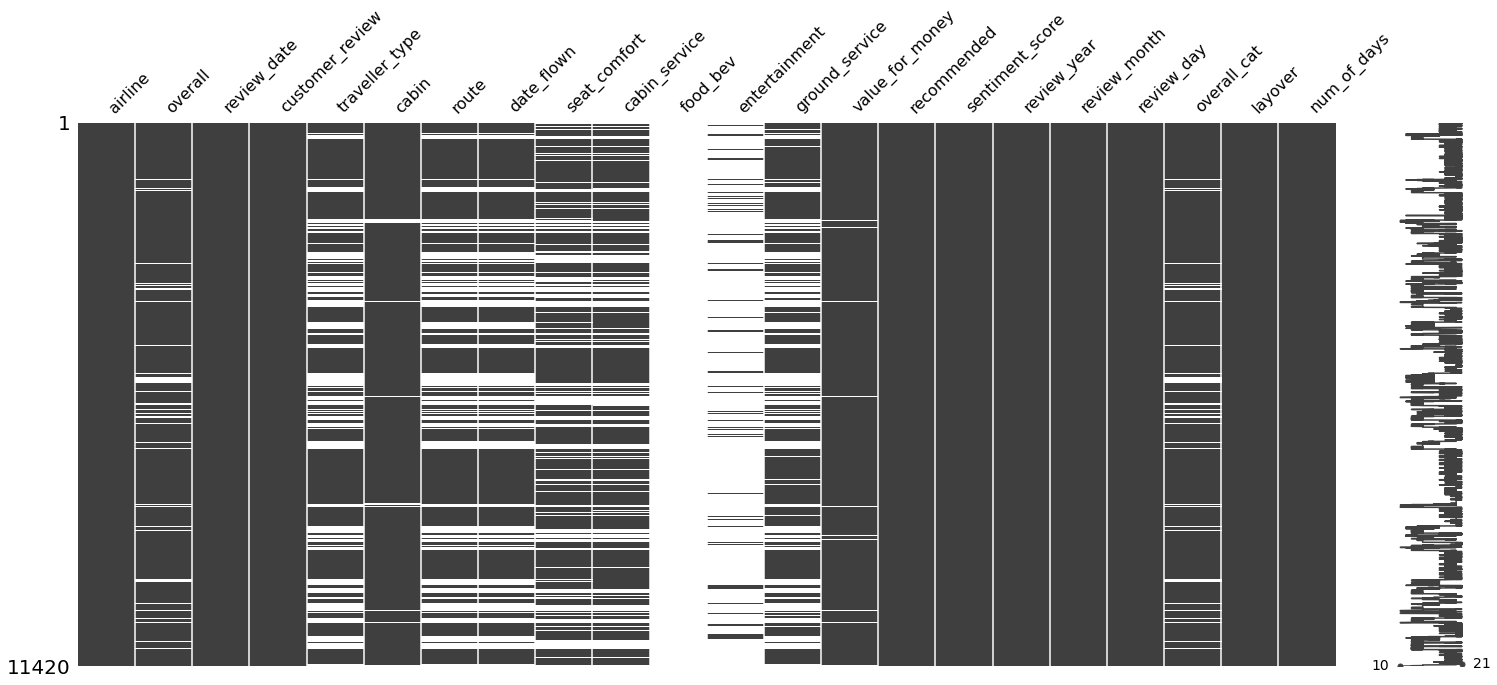

In [107]:
msno.matrix(missing_food_bev_data)

*Again a usual pattern user missing rating food beverages are either rating negative or not at all rating about overall services*

###*Analysing missing food_bev ratings*

<Figure size 432x288 with 0 Axes>

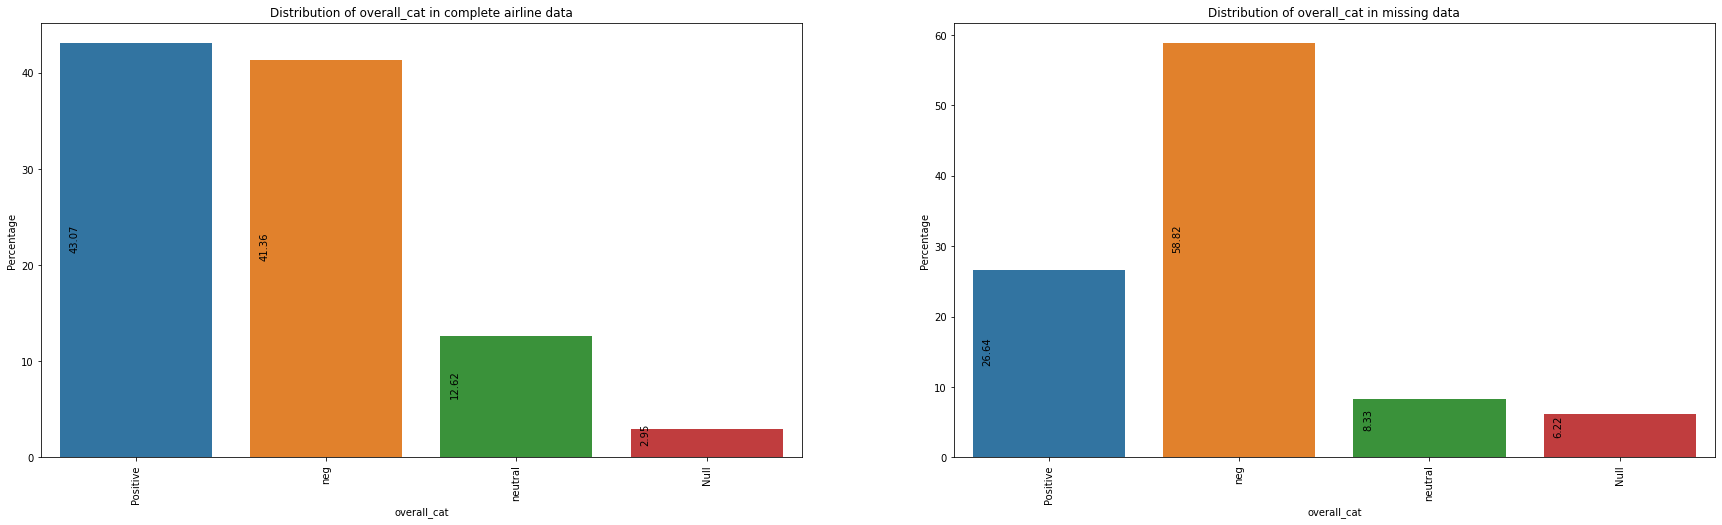

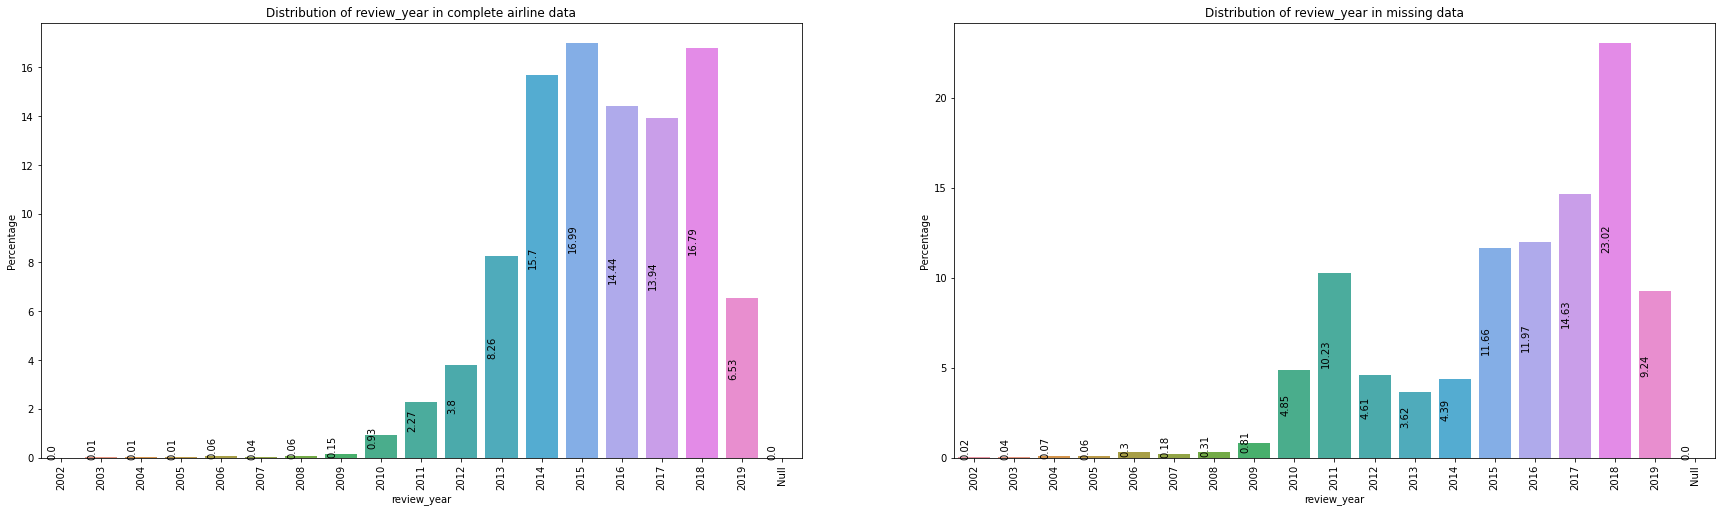

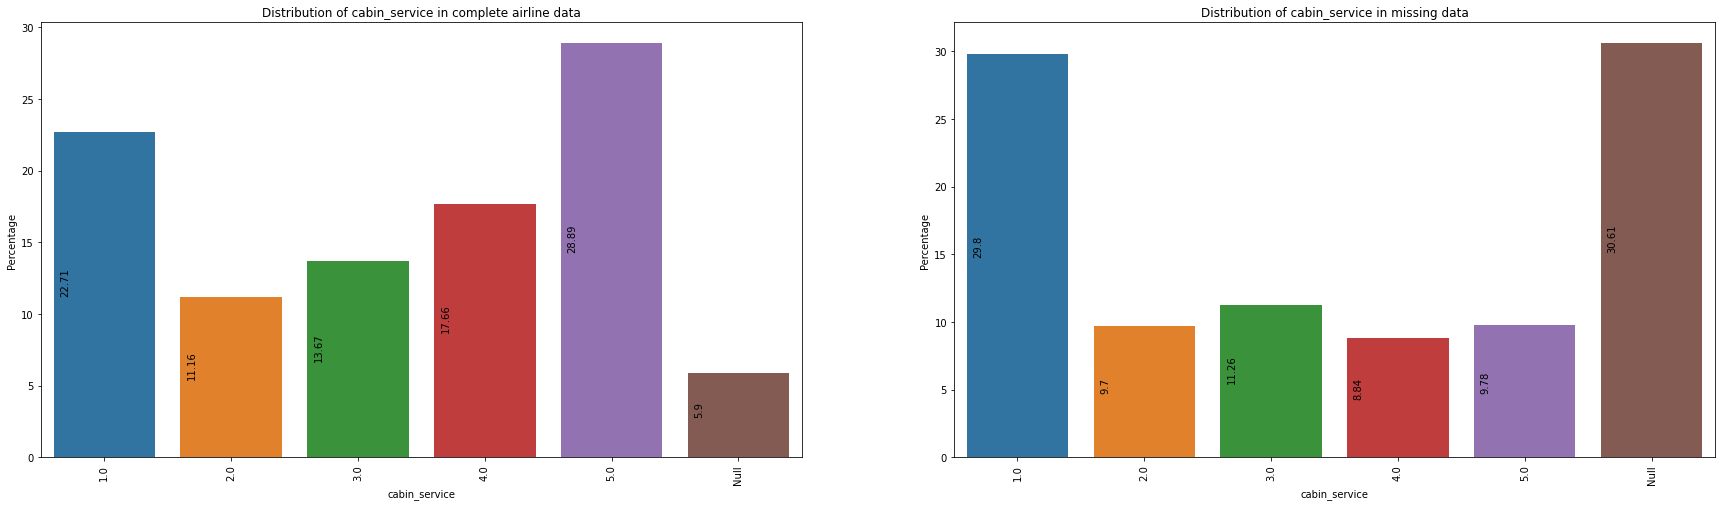

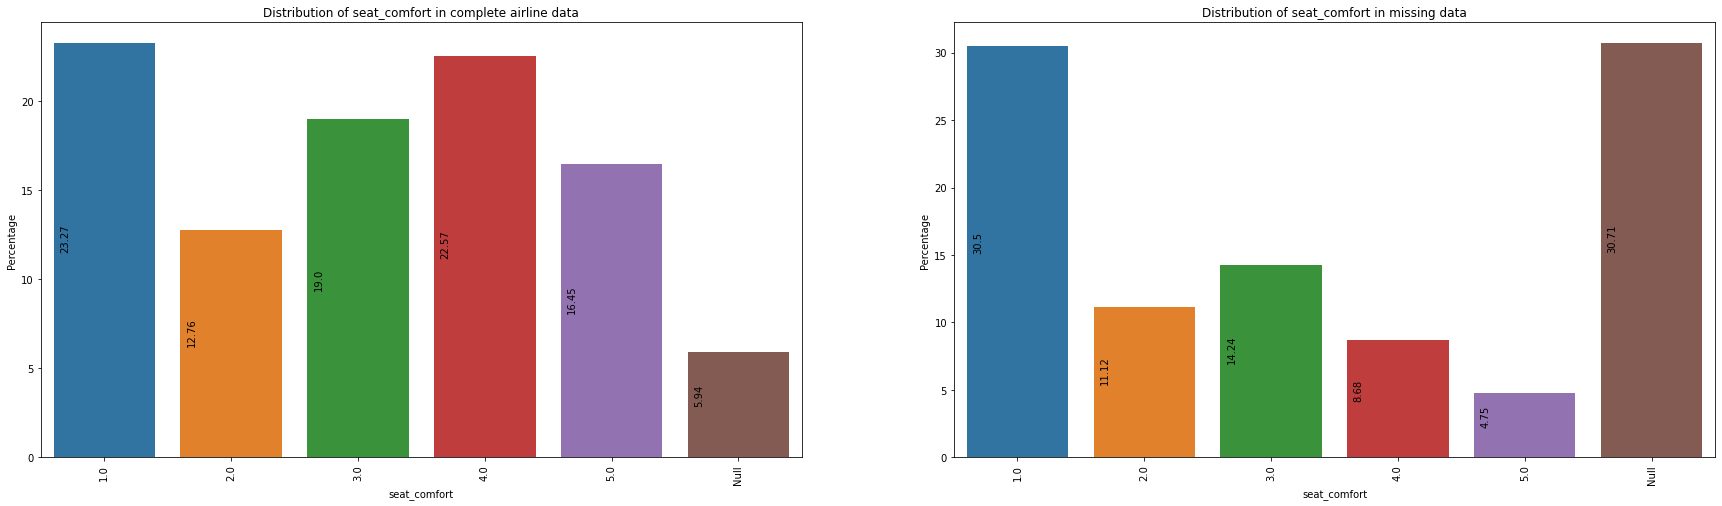

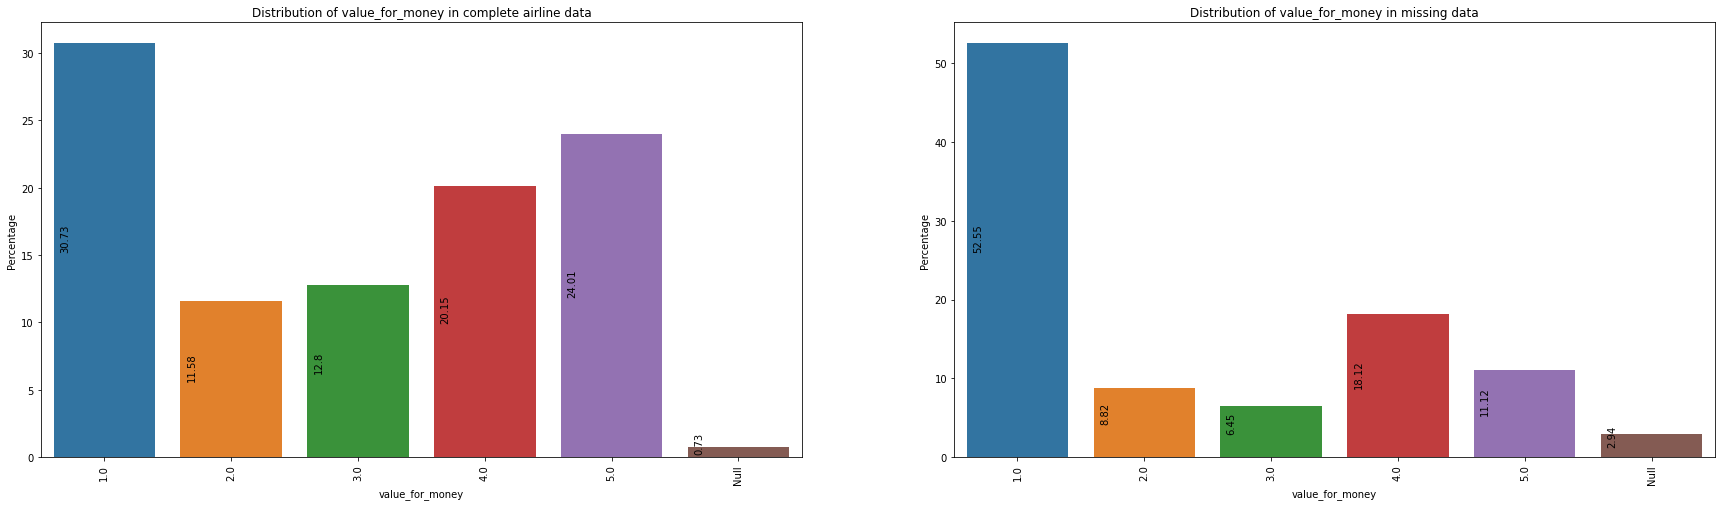

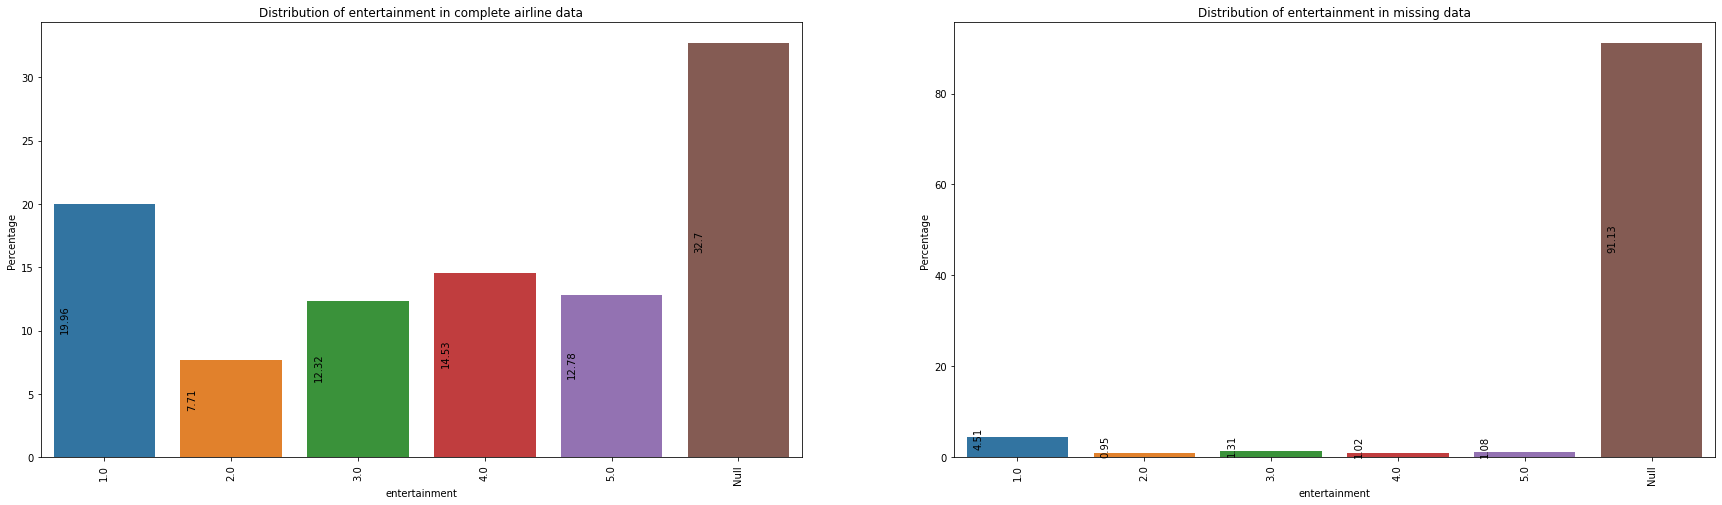

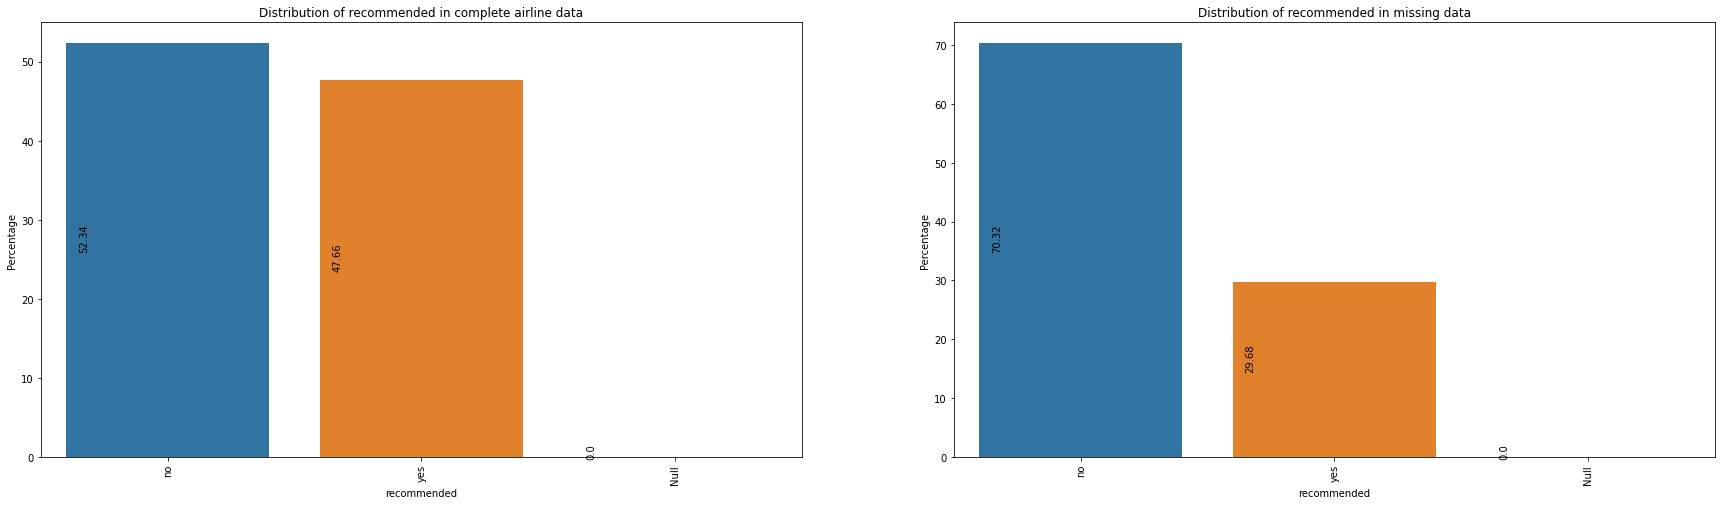

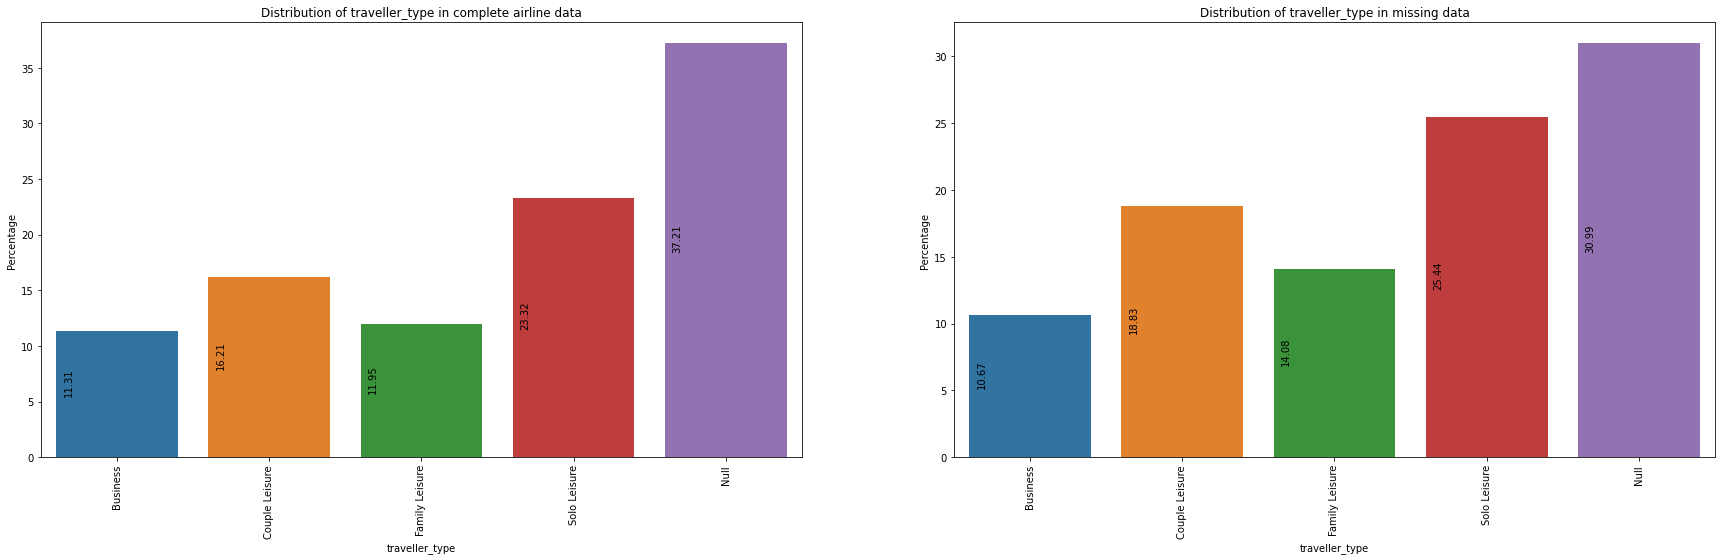

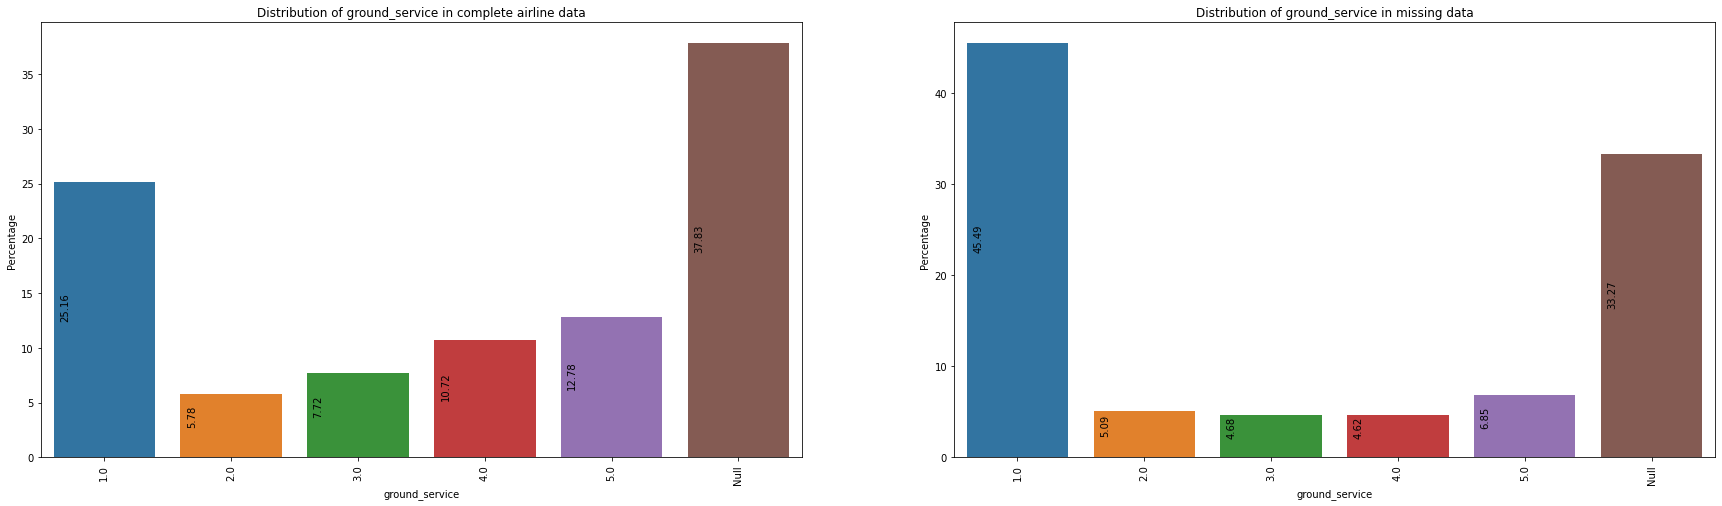

In [108]:
missing_analysis(['overall_cat', 'review_year', 'cabin_service','seat_comfort', 'value_for_money','entertainment', 'recommended', 'traveller_type', 'ground_service'], missing_food_bev_data)

###*Conclusion on Analysis of missing food_bev ratings*

*1. Food bev rating somewhere matches the pattern of missing cabin data. We are observing more 1 rating and null values in our distribution of missing food_bev data*

*2. Pattern for earlier years(2002-11) is similar. However worth noticing difference is for further years is not minute and has increased for recent years(2017, 18,19).*

*3. Negative responding peoples are most likely to miss rating food beverages*


*Same patterm has been observed as we have recognised in cabin missing data.*

*Also we have encounter the missing values of food beverages in recent years as well*


# *Enertainmet rating feature missing value analysis*

In [109]:
null_check('entertainment')

Number of rows having recommended column as Null :  19531
Percentage of missing value for recommended :  32.7  %


In [110]:
missing_entertainment_data = airline_data[airline_data['entertainment'].isnull()]
missing_entertainment_data.name = 'entertainment null Data'

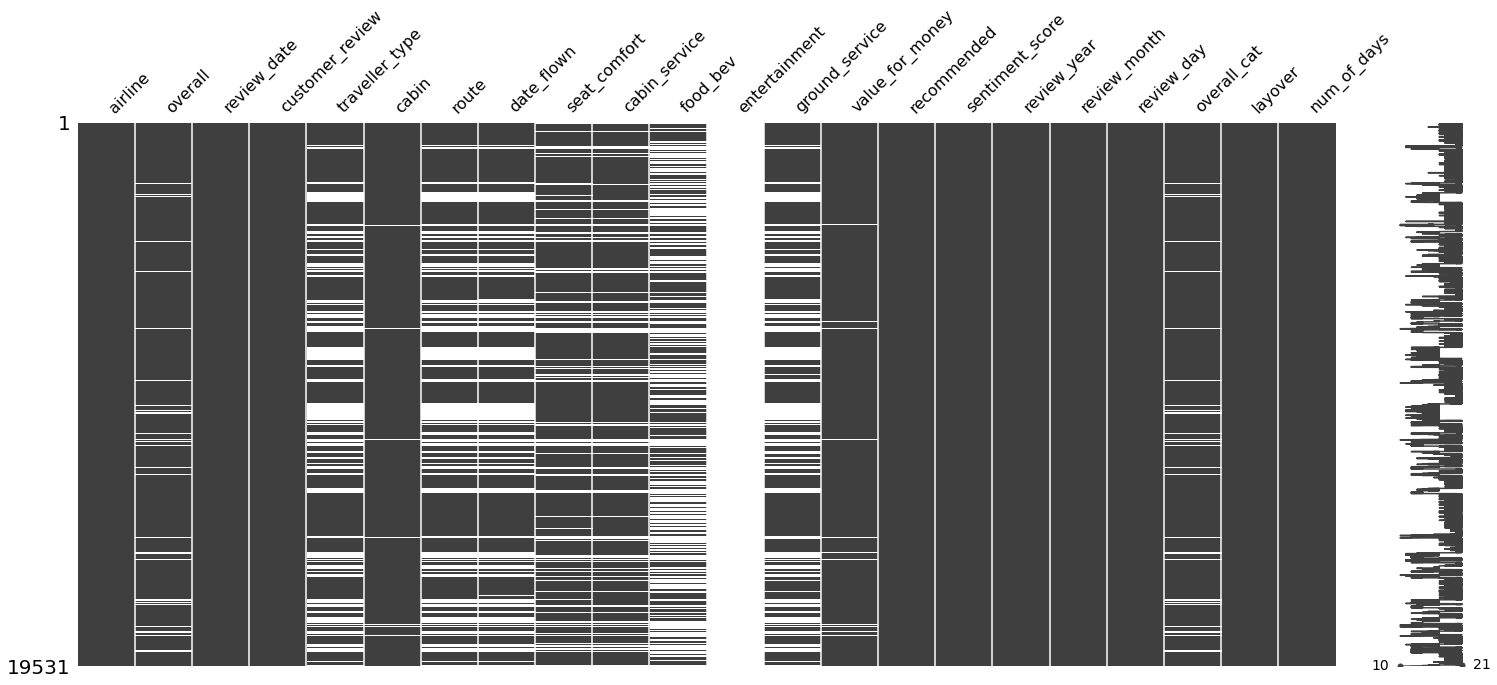

In [111]:
msno.matrix(missing_entertainment_data)

###*Analysing missing entertainment ratings*

<Figure size 432x288 with 0 Axes>

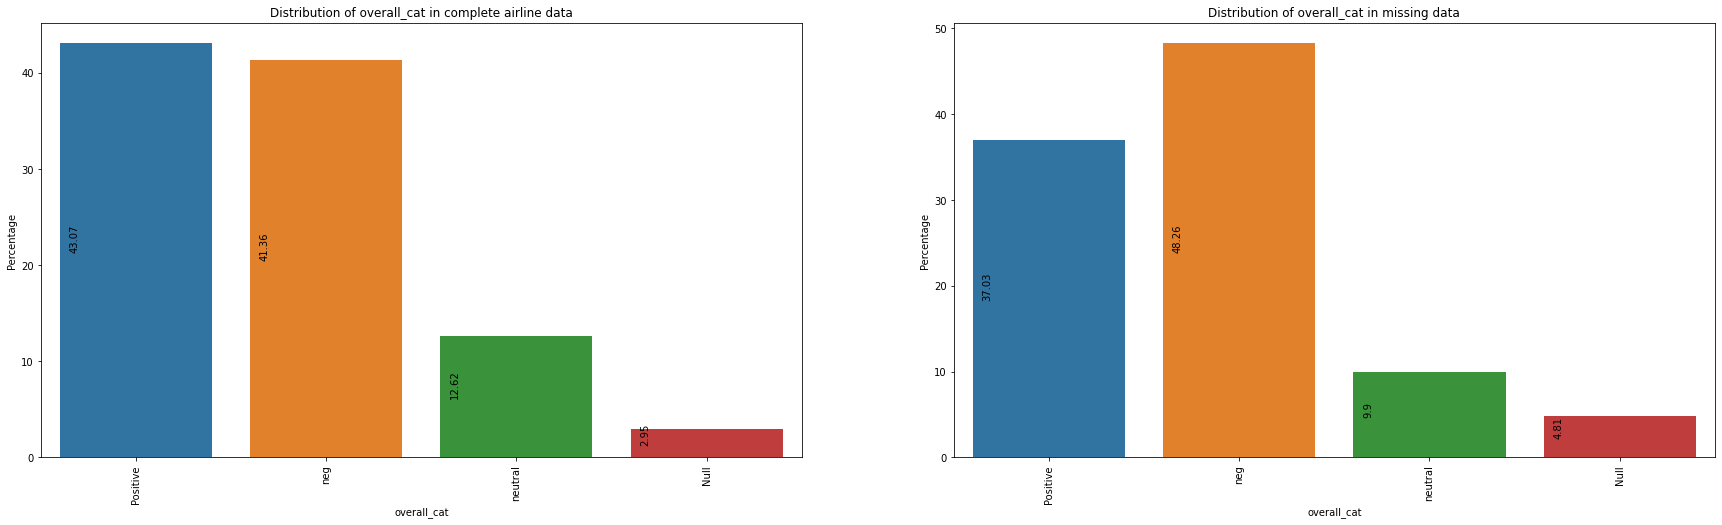

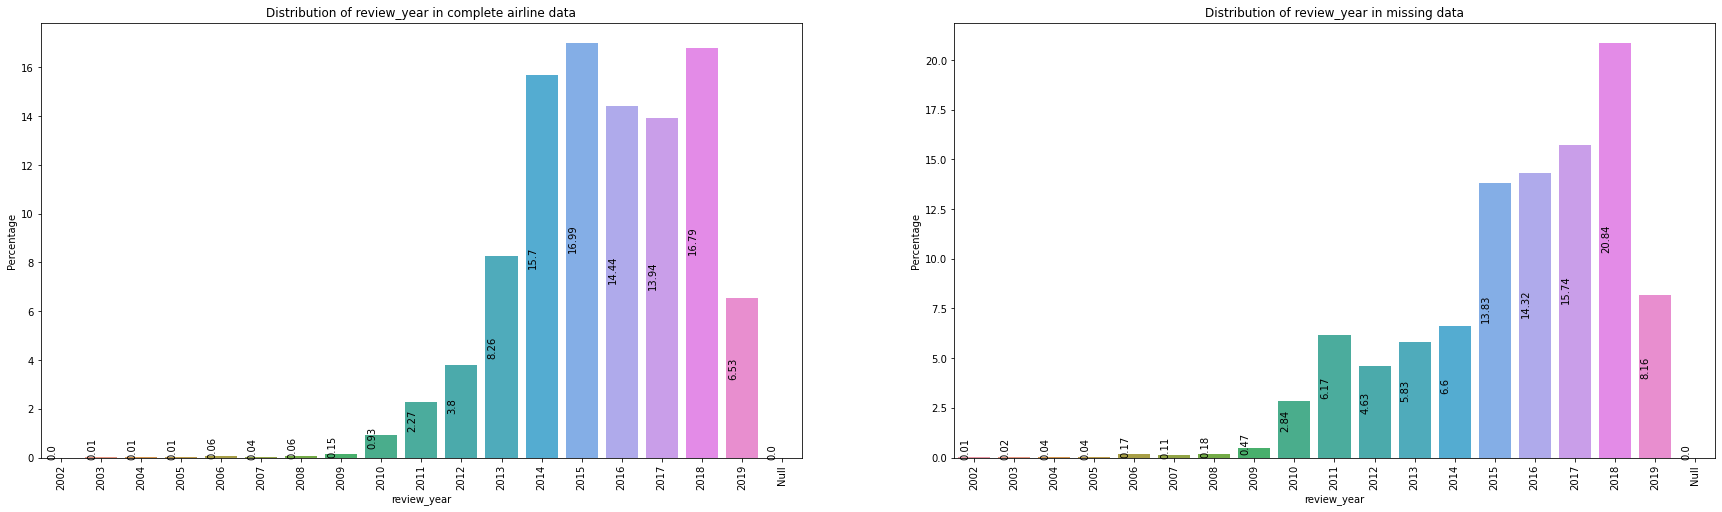

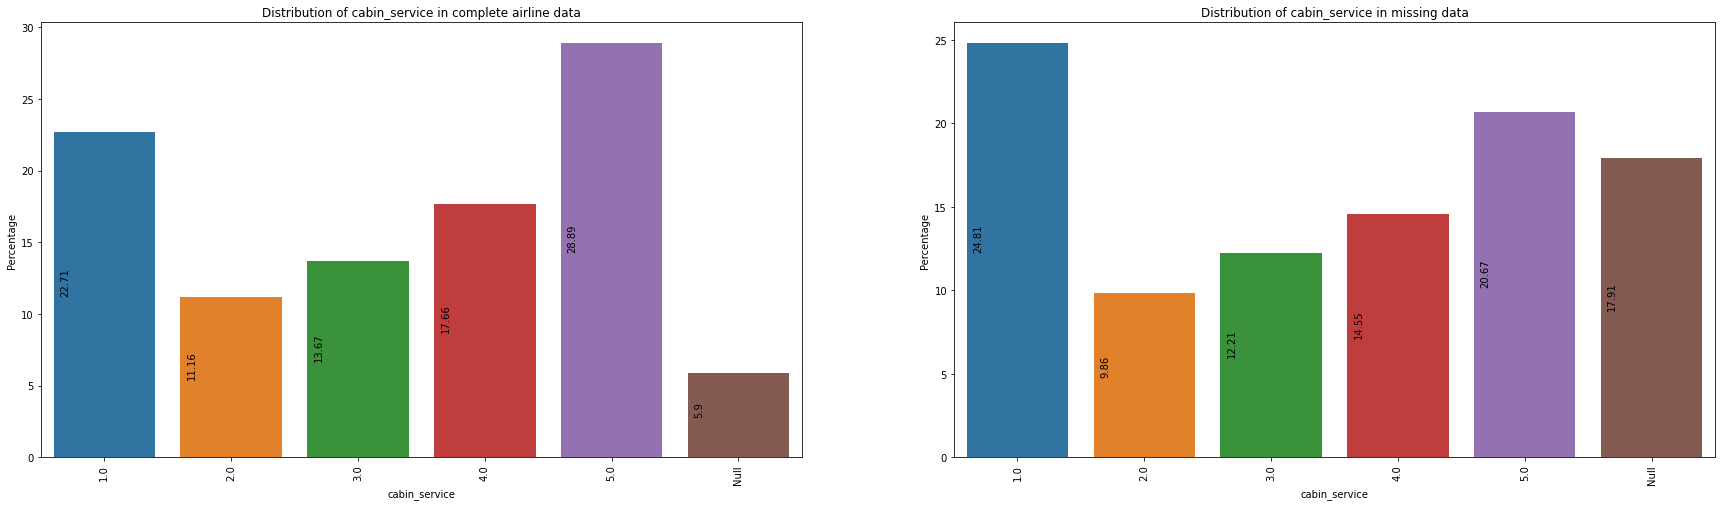

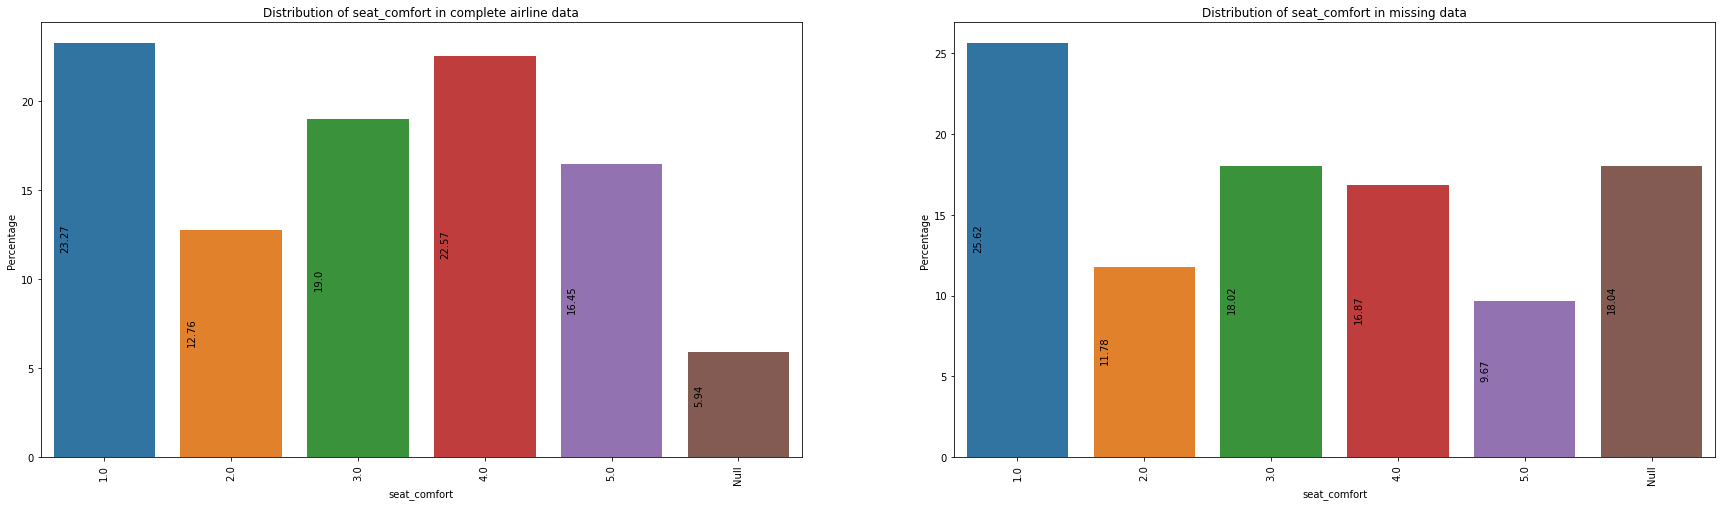

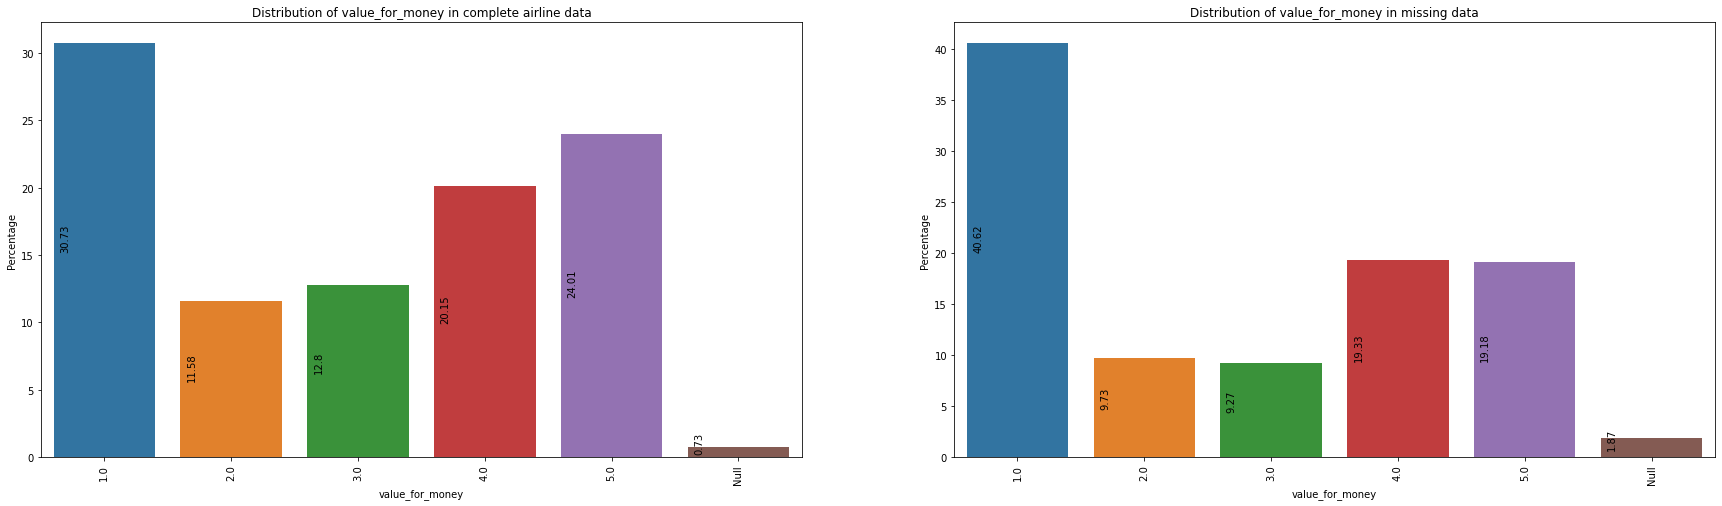

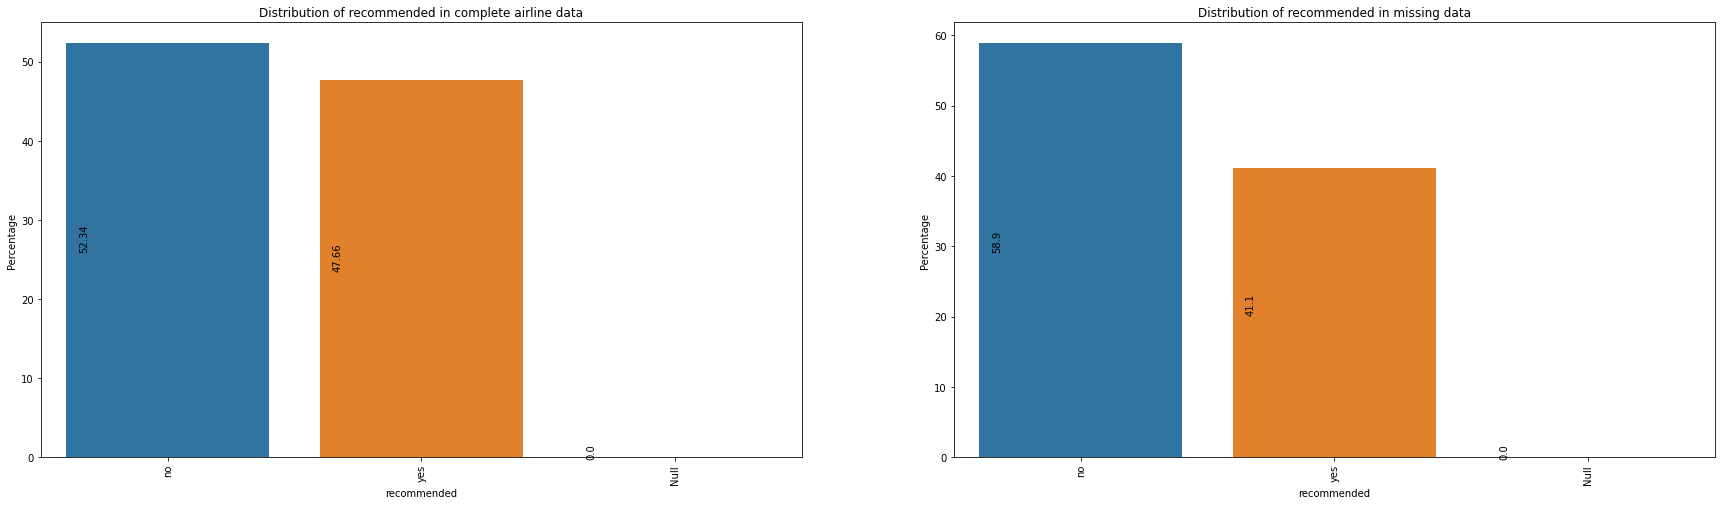

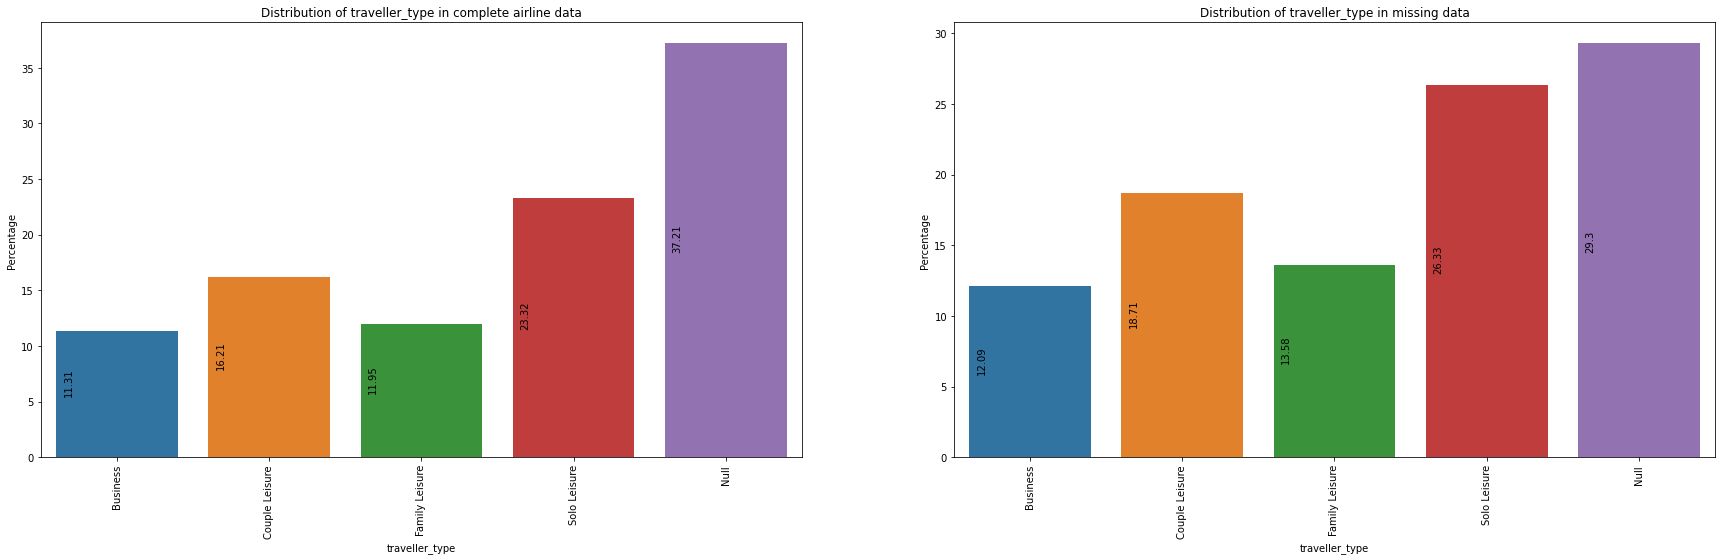

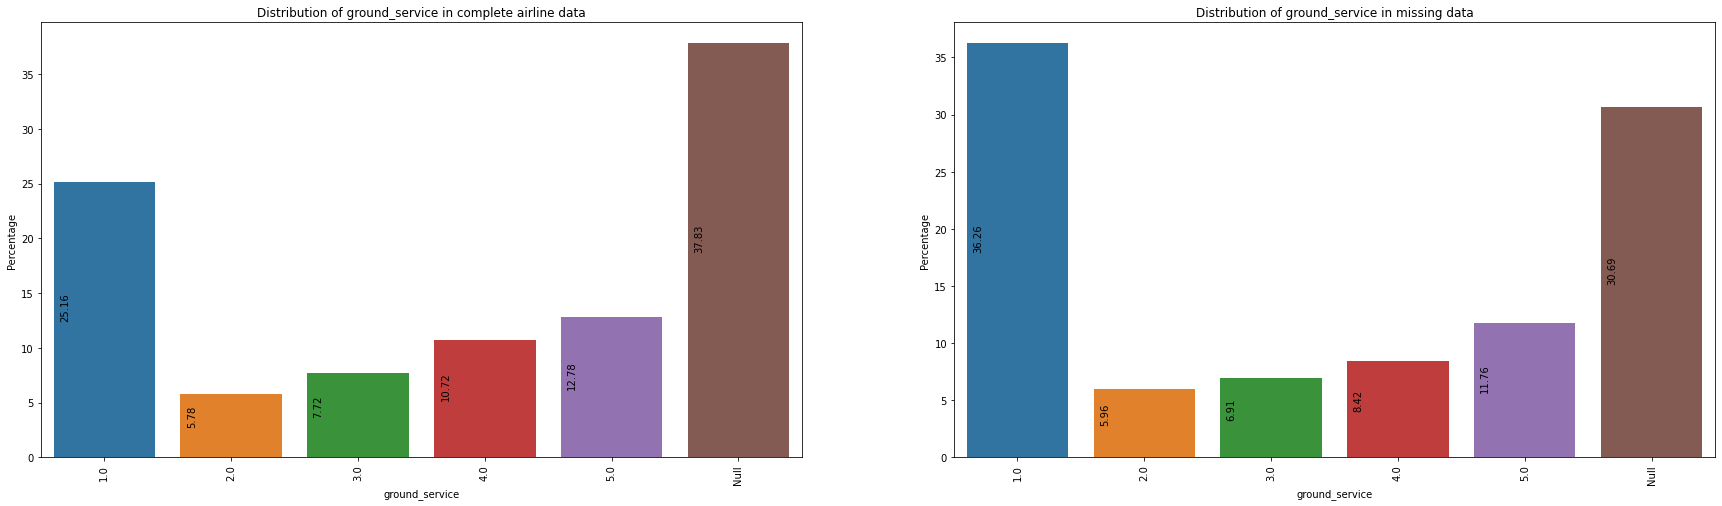

In [112]:

missing_analysis(['overall_cat', 'review_year', 'cabin_service','seat_comfort', 'value_for_money', 'recommended', 'traveller_type', 'ground_service'], missing_entertainment_data)

###*Conclusion on Analysis of missing entertainment ratings*

*Again for years its usual pattern no entries for 2002-2010 nearly low 2011 and there are some in further years*

*Missing values are there for both categories but mostly for No*

*All other features having null values percentage lesser than entertainment column has almost all their null values residing in sub dataframe of entertainment null data*

*Their is baised towards negative recommendations and also user tend to give negative scores on different parameters seems to be leaving space empty for entetainment rating more*

# *Value for Money feature missing value analysis*

In [113]:
null_check('value_for_money')

Number of rows having recommended column as Null :  434
Percentage of missing value for recommended :  0.73  %


*Null values are way too less for value for money and has been captured in previous analysis as well so it didn't require the much of in depth analysis. We'll just try to check its relation with recommended*

In [114]:
misssing_val_for_money = airline_data[airline_data['value_for_money'].isnull()]
misssing_val_for_money.name = 'Value for money null data'

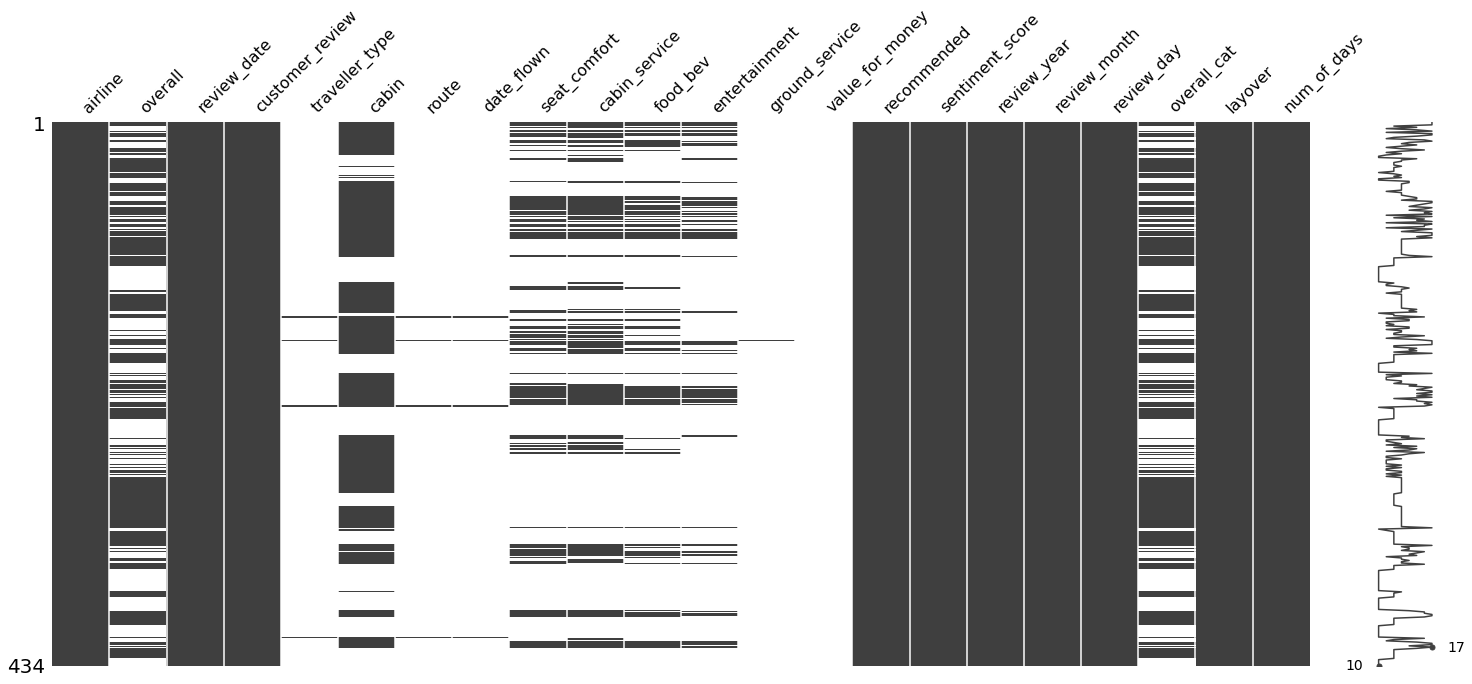

In [115]:
msno.matrix(misssing_val_for_money)

###*Analysing missing value for money ratings*

<Figure size 432x288 with 0 Axes>

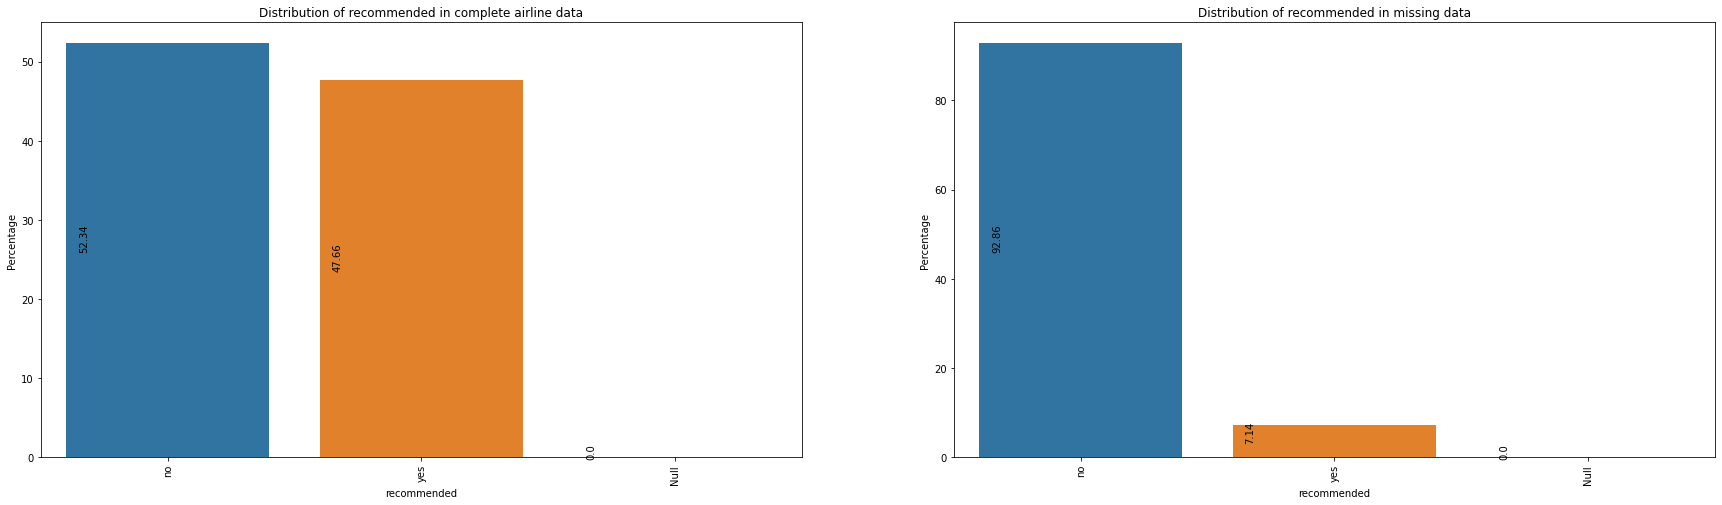

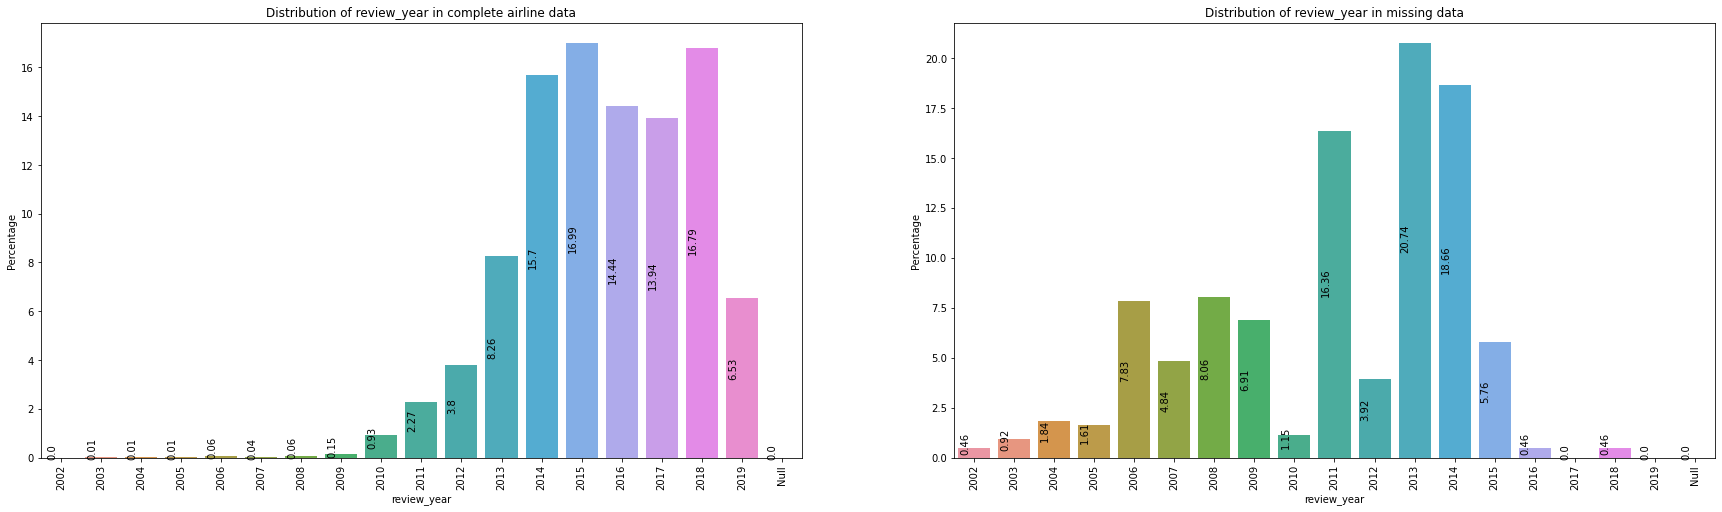

In [116]:
missing_analysis(['recommended','review_year'],misssing_val_for_money)

###*Conclusion on analysis on missing value for money ratings*

*1. Interestingly nearly all the users who doesnt like the flight is not filling their ratings in value for money*

*2. And year pattern remains nearly similar.Mostly all the data for year*

# *Ground Services, Traveller Type, Date flown and Route feature missing value analysis*

In [117]:
null_check('ground_service')

Number of rows having recommended column as Null :  22592
Percentage of missing value for recommended :  37.83  %


In [118]:
misssing_groundservice = airline_data[airline_data['ground_service'].isnull()]
misssing_groundservice.name = 'groundservice'

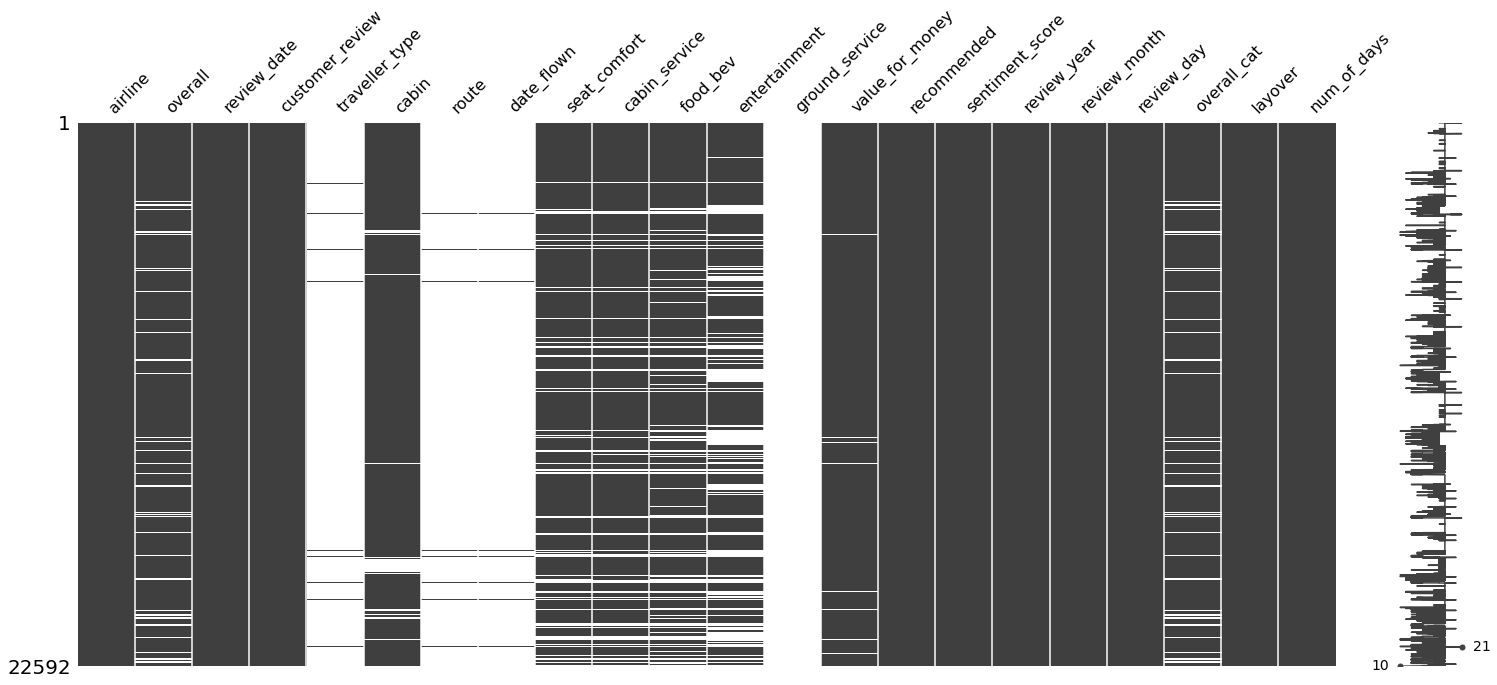

In [119]:
msno.matrix(misssing_groundservice)

In [120]:
null_check('date_flown')

Number of rows having recommended column as Null :  22327
Percentage of missing value for recommended :  37.39  %


In [121]:
null_check('route')

Number of rows having recommended column as Null :  22249
Percentage of missing value for recommended :  37.26  %


In [122]:
null_check('traveller_type')

Number of rows having recommended column as Null :  22222
Percentage of missing value for recommended :  37.21  %


*If we observe care fully the above msno matrix for groundservice and percentages of null values in traveller type, ground services, date flown and route all of them have nearly same amount of missing values and at same observations as well* 

In [123]:
misssing_mul_feat = airline_data[airline_data[['ground_service','traveller_type', 'route', 'date_flown']].isnull().all(axis=1)]
misssing_mul_feat.name = 'groundservice, TravellerType, Route and Date flown null data'

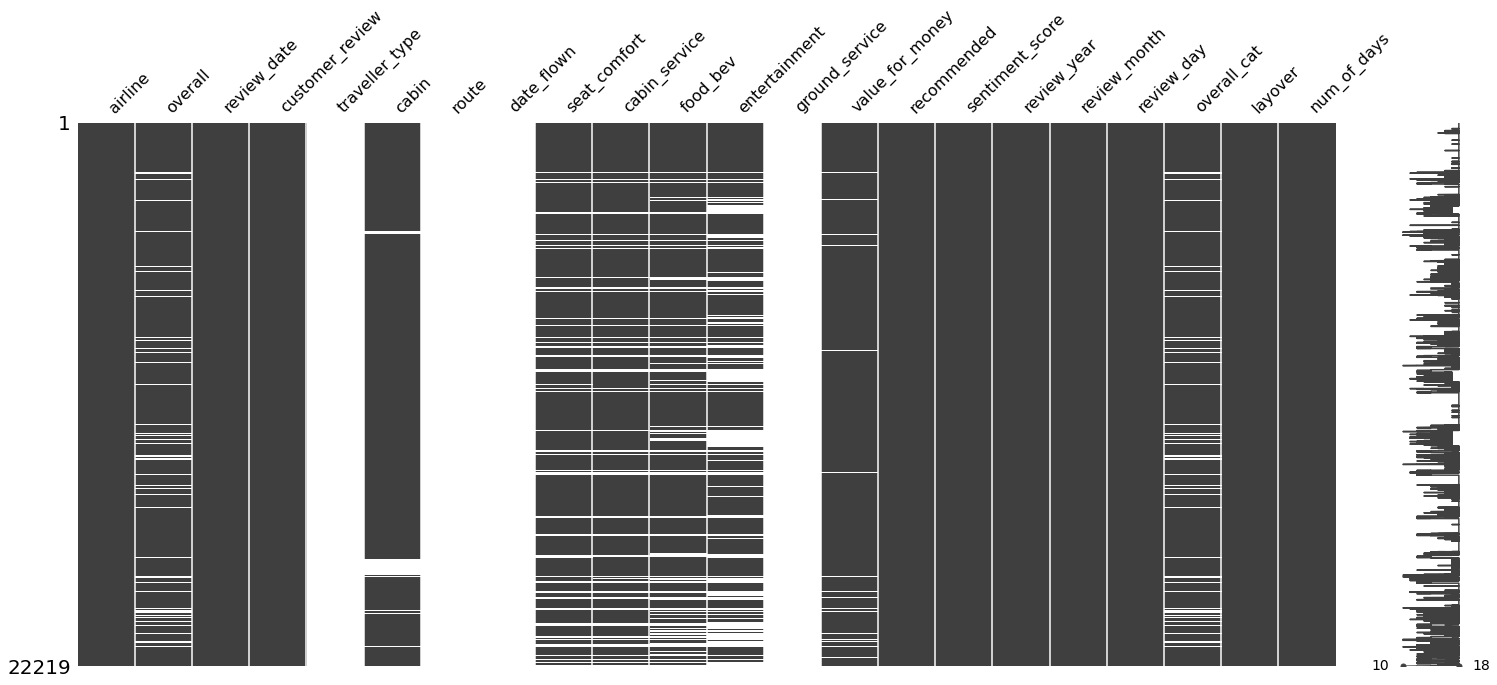

In [124]:
msno.matrix(misssing_mul_feat)

*If we check previous msno matrix ground service and this one there are only difference of 500 rows among all*

###*Analysing multiple features(ground services, Traveller Type, date flown and route)*

<Figure size 432x288 with 0 Axes>

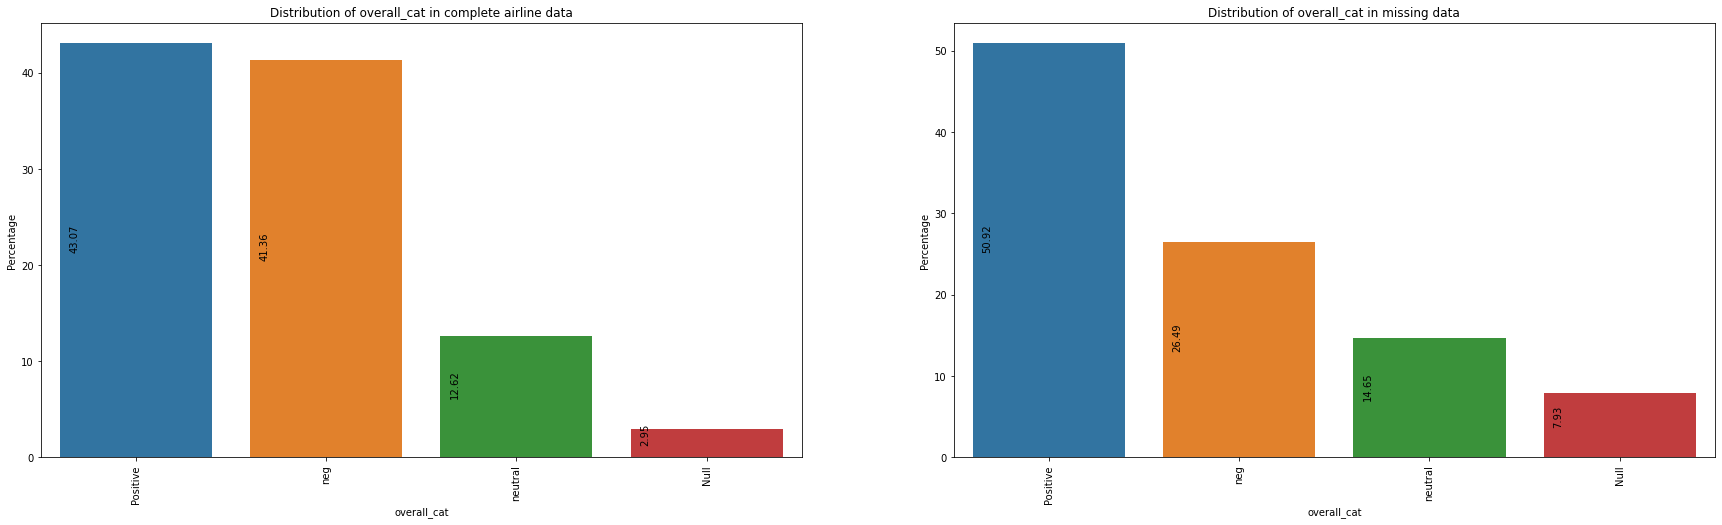

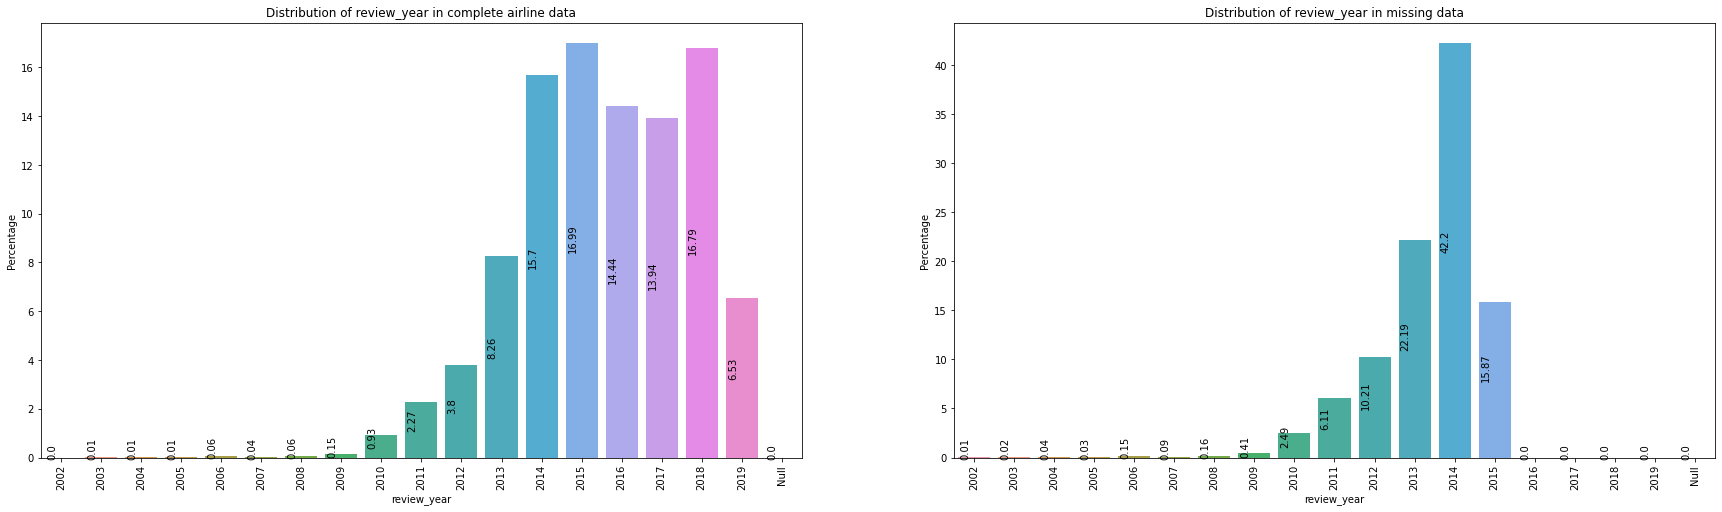

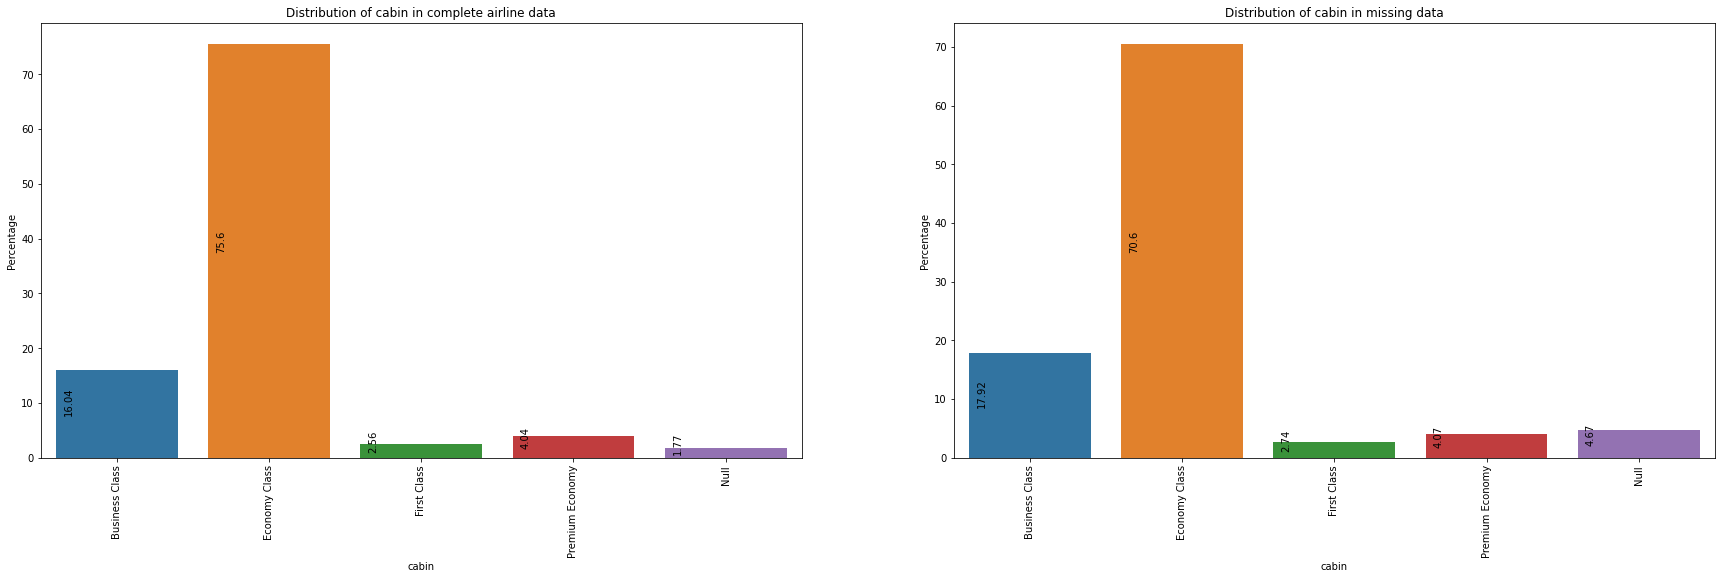

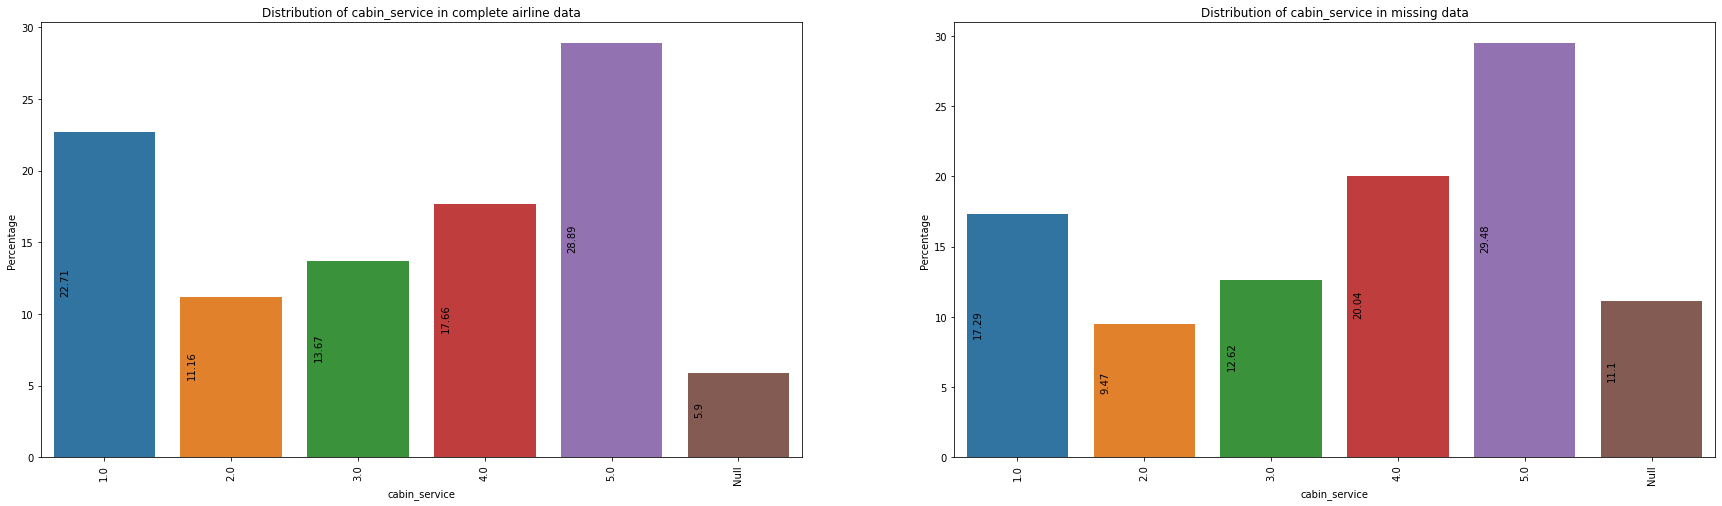

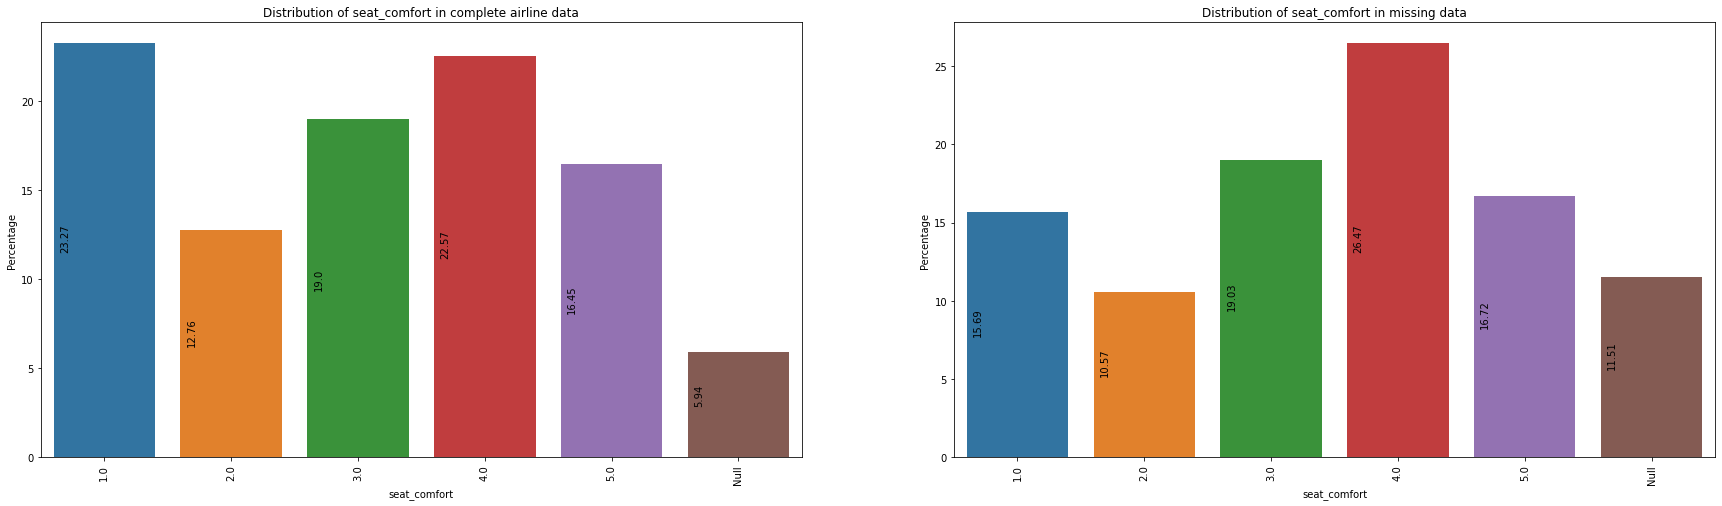

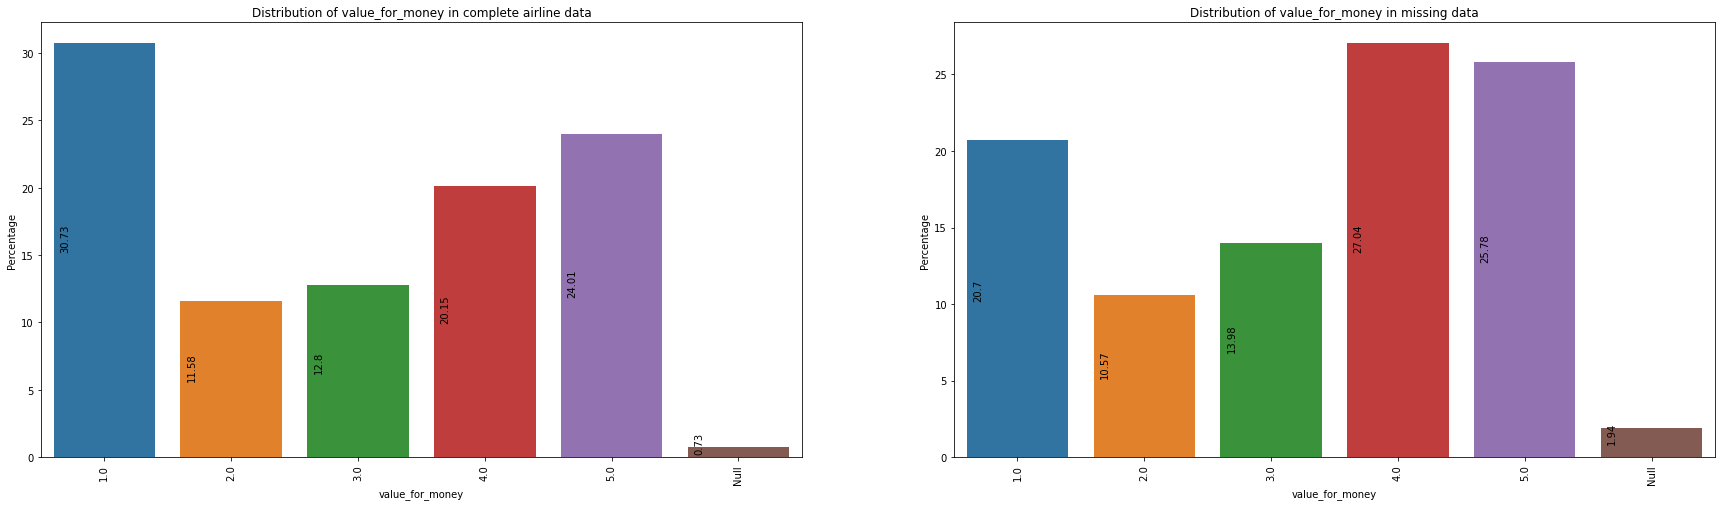

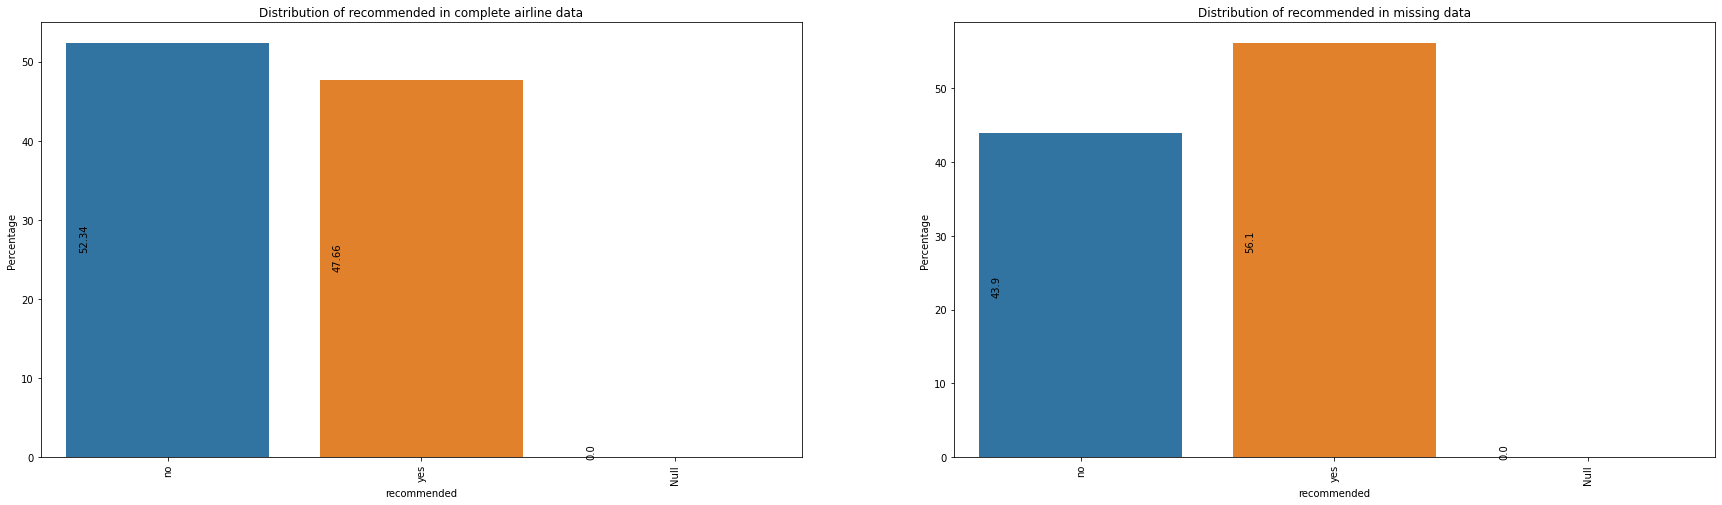

In [125]:
missing_analysis(['overall_cat','review_year', 'cabin', 'cabin_service','seat_comfort', 'value_for_money', 'recommended'], misssing_mul_feat)

###*Conclusion on Analysis multiple features(ground services, Traveller Type, date flown and route) feature null vaues*

*Its first occurence that the user with positive ratings are more tends to not fill the groundservice, route, traveller type*'

*Here as well situation is reveresd either users who haven't rated ground services and haven't filled details like traveller type and route are either not interested in rating seat comfort or users providing good rating to seat comfort as well are more intended to leave ground services null*

*values missing for these columns are quite high nearly 40% of the values of total data is null*

*Also most users who are not filling tends to be not iterested in filling other ratings as well or users with more positive reviews are there who has avoided filling these details*

# ***Conclusion on Analysis of Missing values and ways to fix***

*Following are the findings*

*1. Most of users are not interested in filling all the details they are filling some necessary columns and their recommendation inspite of rating all the services. And it is making kind of pattern that cannot be studided or observed with other variable(MNCAR). If you check the MSNO matrices and analysis where if one rating is not filled its most likely that user has not filled all other ratings as well. As percentage of Null in our bar graph is dominating all over missing value analysis and geusstimate reason for this MNCAR has been discussed in below 4 and 5th point*

*2. Except review_date and customer review no other column has been filled by user between 2002 -2006, possible reason could be these ratings were not there in the feedback form only at that time or users were not iterested to fill up the details*

*3. If we put aside overall rating as well all other ratings features nearly have null values till 2010*

*4. Ground Service, Route, Traveller Type and Date Flown are those feature which were not filled by more number of positive rating users who are recommending fight(those who rated other services as positive but left these features null) as compare to negative raters. As it inolves their travelling personal details more like what type of traveller they are, which route they have flown to and dates thats why more users might be avoiding this*

*5. Whereas for other features like seat comfort, cabin services, cabin, food bev, entertainment most users are not filling these ratings if they are not happy with flight(not recommended) or completey not wanting to fill this*



In [126]:
#as these missing dataset is of no use to us to free up the consumed space
del(missing_recommended_data)
del(missing_cabin_data)
del(missing_seat_data)
del(missing_food_bev_data)
del(missing_entertainment_data)
del(misssing_val_for_money)
del(misssing_groundservice)
del(misssing_mul_feat)

In [127]:
#dropping not needed features
airline_data.drop(columns=['ground_service','route', 'date_flown',  'traveller_type'], inplace = True)

## ***How to deal with it***

*Now if we go for deleting the all the rows that have null values we might loose a lot more data as there are 25k+ rows that have null values*

*Using models or iterative imputation wouldn't be of much use as most of the features have null values in a same rows so other features are also not there to predict the missing value*

*One of the best approach that can be taken care at this state is to delete the features that have more than 35% of nul values because if we see features like route, date flown and traveller type are these features that won't be much useful from prediction prespective as well*

*And for features other than these we will try to fill it with the mode of the feature of respective airline*

## ***Function designed for mode filling of missing feature***

In [128]:
'''--- for filling a mode in overall we have taken an average of all the all the value of overalll for that specific airline say for air aisa we will fill the missing value by mode 
     #of overall score presents for air asia '''

''' -- for filling a mode for other features we have used overall along with airlines so basically for a specific airline if any feature has a missing value and have a overall score 
      greater than or equal to 7 we will take the mode of available values for a feature having overall score greater than or equal to 7 '''

#function designed to use mode for filling missig value
def mode_filling(feat_name, overall_score = False ):
  #iterating over each row with row number and row data 
  for idx,row in airline_data.iterrows():
    #checking if the feature passed to a function in a row is null if null then only proceed to mode filling method
    if pd.isna(row[feat_name]):

      #storing airline name for a row passed 
      airlines = row['airline']

      #if a function got a value to check overall feature than use overall feature also to fill mode
      if overall_score:

        #storing overall score of a row over which we are itering 
        overall_score = row['overall']

        #if row has overall score between 7 -10 then use following method to fill with mode 
        if overall_score in [ 7.0,8.0, 9.0,10.0]:
          airline_data.loc[idx,feat_name] = airline_data[(airline_data['airline']==airlines) & (airline_data[feat_name].notnull()) &
                                                         (airline_data['overall'] >= 7.0)][feat_name].mode().max()
        
        #if row has overall score between 4 -6 then use following method to fill with mode
        if overall_score in [4.0, 5.0, 6.0]:
          airline_data.loc[idx,feat_name] = airline_data[(airline_data['airline']==airlines) & (airline_data[feat_name].notnull()) &
                                                         (airline_data['overall']>3.0) & (airline_data['overall']<7.0)][feat_name].mode().max()
        
        #if row has overall score between 1-3 then use following method to fill with mode
        if overall_score in [1.0, 2.0, 3.0]:
          airline_data.loc[idx,feat_name] = airline_data[(airline_data['airline']==airlines) & (airline_data[feat_name].notnull()) &
                                                         (airline_data['overall'] < 4.0)][feat_name].mode().max()                                                 
      
      #if function has been called to fill mode without overall then use this method 
      else:
        airline_data.loc[idx,feat_name] = airline_data[(airline_data['airline']==airlines) & (airline_data[feat_name].notnull())][feat_name].mode().max()

## ***Mode filling of missing values for overall, value for money, cabin service and cabin*** 

In [129]:
# using mode filling method for some of the columns which have very less percent of null values 
mode_filling('overall')

#for these features we use overall also to fill up mode value
mode_filling('value_for_money', True)
mode_filling('cabin_service', True)
mode_filling('cabin', True)

*Above all features have very less percentage so we have used mode as a way to fill missing values*

*for other feature with higher number of percent we used iterative imputation technique to fill up the missing value*


## ***Iterative imputation of missing values***

In [130]:
#imprting iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#choosen random forest as iterative imputer and fitting imputer 
impute_model = RandomForestClassifier()
imputer = IterativeImputer(estimator=impute_model)
airline_data[['overall', 'seat_comfort', 'cabin_service', 'entertainment', 'value_for_money', 'food_bev']] = imputer.fit_transform(airline_data[['overall', 'seat_comfort', 'cabin_service', 'entertainment', 'value_for_money', 'food_bev']])

In [131]:
airline_data.isnull().sum()

airline               0
overall               0
review_date           0
customer_review       0
cabin                 0
seat_comfort          0
cabin_service         0
food_bev              0
entertainment         0
value_for_money       0
recommended           0
sentiment_score       0
review_year           0
review_month          0
review_day            0
overall_cat        1764
layover               0
num_of_days           0
dtype: int64

In [132]:
#mapping overall cat with overall filled scores 
airline_data['overall_cat'] = airline_data['overall'].map(overall_cat_dict)

# ***Final insights from complete EDA.***

*Till 2010 almost all the users havent rate the different services in airline they only provided their review, overall score and review date*

*Further conclusions of missing values has already been discussed earlier also*

*Traveller type - Business, first class and family seems to be more unhappy with the services and nearly 60% of these traveller type is not recommending the flight whereas for solo travellers 50 % are recommending and 50 not.*

*Nearly 77% of the total travellers 77% is travelling in economy class*

*Irrespective of their traveller type most of the peoples of each traveller type is travelling in economy class only. For eg. Nearly 62% of total business traveller type is travelling in economy class.*

*If you observe previous blocks--- we have seen that more solo traveller is providing positive ratings as compare to negative rating and other traveller is giving more negative ratings as compare to positive ones.*

*Economy class services needs to be improved a bit as for bussiness class and first class user is providing more positive ratings in all the segments and nearly 50 -50 case for premium economy but we have observed that in all the services economy class has more negative or lesser ratings.*

*One observing fact is most of the times 3 star rating for services is more baised towards no recommendations*

*RelationShip of Input feature with dependent variable :-*

*1. Value for money holds a higher importance with our recommendation. If a user is rating low in Value for money there are strict chances of them not recommending the flight*

*2. Overall score also holds a strong relationship with recommend column but bit less as compare to value for money. We have more no. of users in overall who is rating(negative) but still recommending the flight whereas thats not the case in Value for money*

*3. cabin service and seat_comfort are the next ones aligned in a row*

*4. Ground services and entertainment are the ratings that are least strictly aligned with recommendation as even after giving 2 ratings 31.3% of such users is still recommending the flight.*

*As discussed earlier among traveller type solo travellers are the happiest one and recommending highly as compare to others and in terms of cabin cabin type other than economy is recommended highly*










# ***Predictive Modelling*** 

## ***Data Pre Processing***

In [133]:
#preparing a dataset that can be used for build a classifier model 
data = airline_data[['overall', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'value_for_money', 'sentiment_score','recommended']]

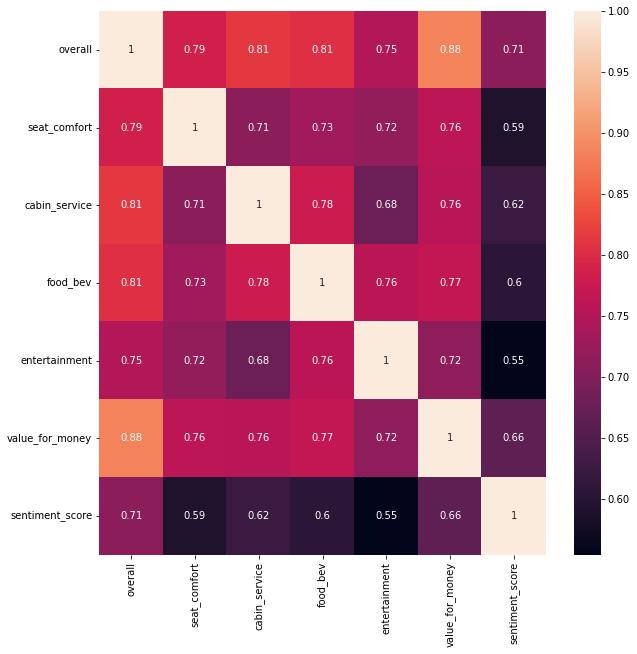

In [134]:
#Checking correlation between the variables
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr,annot=True)

*As we are able to see that all the variables are highly correlated to each other so should be drop multiple columns, actually no because it will degrade our prediction accuracy or score there is a fact that due to this feature interpretation will be hindered a bit and we might not have the actual contribution of the features but here we are aiming more for prediction accuracy as compare to feature interpretation so we will go with all the columns*

## ***Designing a class for building classification moels*** 

In [135]:
''' We have designed a single class with name as predictive model that can be called and used for all kind of predictive models we build and 
    will help us in determining accuracy/score of different models. In short we tried to design a single stop for all the possible functions 
    for predictive models like cross validation, hyperparameter tuning, feature encoding an train test split'''


#class defined to throw exeption if algorithm name passed is invalid
class invalid_model_class_error(Exception):
    pass

#class defined to throw an exception if parameters of the algorithm is not valid
class invalid_model_parameter(Exception):
    pass

#designing a class for complete predictive modeling can be used for any algorithm and various functionalities
class predictive_model: 
  
  #using the data preprocessed from eda to split into x and y input output variables
  x = data[[cols for cols in data.columns if cols not in ['recommended']]] 
  y = data['recommended'].map({'yes':1, 'no':0})
  
  #parameters to store execution time of different functions defined 
  model_performance_time_ = 0
  cross_validation_time_ = 0
  best_hyperparameter_time_ = 0
  hyperparameter_finetune_time_ = 0
  fit_time_ = 0

  #storing auc score
  auc_score = 0

  #if a user will not call split_data method whole data will be considered as training data
  x_train = x
  y_train = y

  #constructor with model name and model parameters
  def __init__(self,model,**kwargs):    
    
    self.model_cat = model
    #logreg for logistic regression checking if model needs to be build is logistic regression
    if model == 'logreg': 
      self.model_instance = LogisticRegression
      #try to check if all the parameters passed for logistic regression are valid if not model will throw an error. 
      try:
        self.model = self.model_instance(**kwargs)   #model initialisation
      
      #capturing the error caused due to invalid parameter for logistic regression and raising an custom exception of invalid model parameters 
      except TypeError:
        raise invalid_model_parameter('Invalid parameter or parameter value for LogisticRegression is passed')     #exception raising
       
    #dt for decision trees checking if model needs to be build is decision trees
    elif model == 'dt':
      self.model_instance = DecisionTreeClassifier
      #same try used for logistic regression
      try:
        self.model = self.model_instance(**kwargs)   #model initialisation
      
      except TypeError:       
        raise invalid_model_parameter('Invalid parameter for DecisionTree is passed')        #custom exception raising
    
    #rf for random forest checking if model needs to be build is Random Forest
    elif model == 'rf':
      self.model_instance = RandomForestClassifier
      #usual model parameter check try
      try:
        self.model = self.model_instance(**kwargs)           #model initialisation
      
      except:
        raise invalid_model_parameter('Invalid parameter for RandomForest is passed')     #raising an custom exception
    
    #gb for gradient boost cheking if model needs to be build is GradientBoost
    elif model == 'gb':
      self.model_instance = GradientBoostingClassifier
      try:        
        self.model = self.model_instance(**kwargs)    #model initialisation
      
      except:        
        raise invalid_model_parameter('Invalid parameter for GradientBoost is passed')    #custom exception raising
    
    #xgb for xtremegradient boost cheking if model needs to be build is XtremeGradientBoost
    elif model == 'xgb':
      self.model_instance = XGBClassifier
      try:        
        self.model = self.model_instance(**kwargs)   #model initialisation
      
      except:        
        raise invalid_model_parameter('Invalid parameter for XtremeGradientBoost is passed')   #custom expectation raising 
    
    #naive bayes classifier
    elif model == 'nb':
      self.model_instance = GaussianNB
      try:        
        self.model = self.model_instance(**kwargs)   #model initialisation

      except:        
        raise invalid_model_parameter('Invalid parameter for XtremeGradientBoost is passed')   #custom expectation raising 
    
    elif model == 'knn':
      self.model_instance = KNeighborsClassifier
      try:        
        self.model = self.model_instance(**kwargs)   #model initialisation

      except:        
        raise invalid_model_parameter('Invalid parameter for XtremeGradientBoost is passed')   #custom expectation raising 

    elif model =='svm':
      self.model_instance = KNeighborsClassifier
      try:        
        self.model = self.model_instance(**kwargs)   #model initialisation

      except:        
        raise invalid_model_parameter('Invalid parameter for XtremeGradientBoost is passed')   #custom expectation raising 


    #if a invalid model name or algorithm name is passed following else block will execute
    else:
      
      #dictionary to help user know the valid model name and their alias
      model_dict = {'LogisticRegression':'logreg', 'DecisionTrees':'dt', 'RandomForest':'rf', 'GradientBoost':'gb', 'XtremeGradientBoost':'xgb','NaiveBayes':'nb',
                     'KNearest Neighbours': "knn"}  

      #error messsage for exception that a user will get if wrong model name is passed
      err_msg = 'Invalid model class \n Please choose from following : \n' + str(model_dict)      
      
      #again a custom exception for invalid model_class_error it will stop executing and throw an exception of invalid_model_class
      raise invalid_model_class_error(err_msg)
    

  def feature_encoding(self,feature_list):
      #looping over each feature in feature list
      for feature in feature_list:
        #checkpoint to see if split data has been called or not if not encode whole data x and y
        if len(self.x_train)==len(self.x):
          #if a feature in a list is present in x data then transform it 
          if feature in self.x.columns:
            #one hot encoding of feature
            dummy_data = pd.get_dummies(self.x[feature],drop_first = True) #dropping first to avoid dummy variable trap
            self.x.drop(columns=[feature], inplace = True)
            self.x = pd.concat([self.x,dummy_data], axis =1 )    #concatentating original and encoded data
        else:
          #if feature is there in x_train to encode
          if feature in self.x_train.columns:
            #training data features one hot encoding 
            dummy_data = pd.get_dummies(self.x_train[feature],drop_first = True)
            self.x_train.drop(columns=[feature], inplace = True)
            self.x_train = pd.concat([self.x_train,dummy_data], axis =1)
            
            #resting data featrures one hot encoding
            dummy_data = pd.get_dummies(self.x_test[feature],drop_first = True)
            self.x_test.drop(columns=[feature], inplace = True)
            self.x_test = pd.concat([self.x_test,dummy_data], axis =1)
  
  #method defined that take percent of split from user and split your data in train and test  
  def split_data(self, percent_test):

    #train_test_split call to split the data
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size = percent_test, random_state = 3)
    
  #method defined to fit a training data 
  def fit(self):

      #checking if training data is equal to whole data and if true print a warning saying that you are training in whole data no error and exception just warning
      start = datetime.datetime.now()
      if len(self.x) == len(self.x_train):
          print('Warning! You are training in your model on complete without splitting. Please call split_data for splitting your data')
      
      #model fitting on training data
      self.model.fit(self.x_train, self.y_train)
      end = datetime.datetime.now()
      self.fit_time_ = (end-start).total_seconds()            #execution time of algorithm 
      #print('\n EXECUTION TIME : ', round(time,2), ' Seconds')
       
  
  #method designed to fine tune hyperparameters of model using different thechniques
  def hyperparameter_finetune(self,method, best_fit = False,**kwargs):

    start = datetime.datetime.now()

    #checking if user passed a tecnique thats not valid or not defined then throw a type exception 
    if method not in ('GridSearchCV', 'RandomizedSearchCV','BayesianSearchCV'):
      raise(TypeError)
    
    #if techique choosen is grid search cv execute following if 
    if method=='GridSearchCV':
      #model initialised for grid search
      model1 = GridSearchCV(self.model,**kwargs)
      #fitting a model
      model1.fit(self.x_train, self.y_train)
      #returning best model parameters along with the score associated with these parameters
      if best_fit:
        self.model = model1.best_estimator_    #assigning a best fit model
        self.fit()   #fitting the model
      end = datetime.datetime.now()
      self.hyperparameter_finetune_time_ =(end-start).total_seconds()      #execution time of algorithm 
      print((model1.best_params_,round(model1.best_score_,2)))   #printing best parameters and the score associated with it
      return(model1.best_params_,round(model1.best_score_,2))   #returning the score that best fited model has scored
    
    #if techique choosen is grid search cv execute following if
    if method == 'RandomizedSearchCV':
      #model initialisation
      model1 = RandomizedSearchCV(self.model,**kwargs)
      #model fitting 
      model1.fit(self.x_train,self.y_train)
      #condition to check if best fit is true then change the original model 
      if best_fit:
        self.model = model1.best_estimator_   #assigning a best fit model
        self.fit()   #fitting the model
      #returning score and best parameters
      end = datetime.datetime.now()
      self.hyperparameter_finetune_time_ = (end-start).total_seconds()            #execution time of algorithm 
      print((model1.best_params_,round(model1.best_score_,2)))   #printing best parameters and the score associated with it
      return(model1.best_params_,round(model1.best_score_,2))   #returning the score that best fited model has scored
    

  def best_hyperparameter(self, score_metrics = 'accuracy',**kwargs):
      
      start = datetime.datetime.now()  

      #counter for plots
      i =1
      #iterating over kwargs dict to get the hyperparameters and their list of values
      for key,values in kwargs.items():
        #list to append all the scores of different values for each hyperparameter    
        score_list = []
        #looping for different values of each hyperparameter 
        for j in range(len(values)):
          #taking each value from a list and building a model over these values
          param_dict = {key:values[j]}
          #initialising a model
          tune_model = self.model_instance(**param_dict)
          #using 3 way split to get the scores
          scores = cross_val_score(tune_model,self.x_train, self.y_train, cv =5, scoring = score_metrics)
          #averaging out the scores of 3 different test sets
          final_score = np.average(scores)
          #appending the score for each value of a hyperparameter in a list
          score_list.append(final_score)
        #using a score lists, and values of hyperparameter for ploting it and visualising the score metrics for different sets of hyperparameters 
        plt.figure(i+1)
        #creating x data 
        xx = list(range(len(values)))
        #plotting the graph
        plt.plot(xx, score_list)
        #renaming x- axis scale
        plt.xticks(xx, values)
        #labelling of x and y axis and title of the plot
        plt.xlabel(str(key))
        plt.ylabel(score_metrics)
        plt.title(score_metrics + ' vs ' + str(key))
        #updating counter
        i = i+1
        fig.tight_layout()
      end = datetime.datetime.now()
      self.best_hyperparameter_time_ = (end-start).total_seconds()            #execution time of algorithm 
      
  #method designed to perform cross validation 
  def cross_validation(self,cv=5,**kwargs):

    start = datetime.datetime.now()
    #setting yp a method to split data in stratifiied manner
    cross_val = KFold(n_splits = cv, random_state =1, shuffle = True)
    #running cross validation
    cv_scores = cross_val_score(self.model,self.x_train,self.y_train,cv=cross_val,**kwargs)
    #checking average score of cross validated models
    avg_score = round(np.mean(cv_scores),2)
    print('\nAverage score from cross validation for a model is : ',avg_score)  #average score of model
    #returning the same average score
    
    end = datetime.datetime.now()
    self.cross_validation_time_ = (end-start).total_seconds()            #execution time of algorithm 
    #print('\n EXECUTION TIME : ', round(time,2), ' Seconds')
    return avg_score
  
  #method to show performance of our model on train and test data 
  def model_performance(self, prob_threshold = False, probability = None):    
    #only possible error is if model is not fitted so we try to capture it through try n except
    start = datetime.datetime.now()
    try:
      #dropping a note of having no test score and getting a score over train data if a model is trained over whole data 
      if len(self.x) == len(self.x_train):        
          print('Split data method has not been called. There is no test data to evaluate\nFollowing are the training scores')
          fig, axs = plt.subplots(1,2, figsize = (15,6))   
    
    #training data different score metrics

          #predicting output of train data through a model built           
          y_train_pred= self.model.predict(self.x_train)
          #predicting probability
          y_train_prob = self.model.predict_proba(self.x_train)[:,1]
          if prob_threshold == True:
            y_train_pred = [1 if val > probability else 0 for val in y_train_prob ]
          print('Performance over train data : ')
          #getting confusion matrix for train data
          conf_mtrx = confusion_matrix(self.y_train,y_train_pred)
          #showing confusion matrix through heatmap
          sns.heatmap(conf_mtrx, annot = True,fmt = "d", ax = axs[0])
          #title of plot
          axs[0].set_title('Confusion matrix of train data')
          #x_label for plot
          axs[0].set_xlabel('predicted')
          #y_label for plot 
          axs[0].set_ylabel('True')
          #printing a complete classification report containing different score metrics
          print('\n Classification Report for a train data :\n')
          print(classification_report(self.y_train, y_train_pred))
          # calculate roc curve
          fpr, tpr, thresholds = roc_curve(self.y_train, y_train_prob)
          axs[1].plot(fpr,tpr, 'o--')
          #title of plot
          axs[1].set_title('ROC Curve of train data')
          #x_label for plot
          axs[1].set_xlabel('False positive rate(FPR)')
          #y_label for plot 
          axs[1].set_ylabel('True positive rate(TPR)')
          self.auc_score  = auc(fpr,tpr)
          print('Auc score is : ', self.auc_score)
          output_score = classification_report(self.y_train, y_train_pred, output_dict = True)
          end = datetime.datetime.now()
          self.model_performance_time_ = (end-start).total_seconds()            #execution time of algorithm 
          #print('\n EXECUTION TIME : ', round(time,2), ' Seconds')
          return output_score
             
      #if test data is there
      else:
        
        #training metrics

          #predicting output of train data through a model built 
          y_train_pred= self.model.predict(self.x_train)
          y_train_prob = self.model.predict_proba(self.x_train)[:,1]
          if prob_threshold == True:
            y_train_pred = [1 if val > probability else 0 for val in y_train_prob]
          print('Performance over train data : ')
          #getting confusion matrix for train data
          conf_mtrx = confusion_matrix(self.y_train,y_train_pred)
          #getting a training confusion matrix over first figure
          fig, axs = plt.subplots(1,3, figsize = (23,6))
          #showing confusion matrix through heatmap
          sns.heatmap(conf_mtrx, annot = True,fmt = "d", ax = axs[0])
          #title of plot
          axs[0].set_title('Confusion matrix of train data')
          #x_label for plot
          axs[0].set_xlabel('predicted')
          #y_label for plot 
          axs[0].set_ylabel('True')
          #printing a complete classification report containing different score metrics
          print('\n Classification Report for a train data :\n')
          print(classification_report(self.y_train, y_train_pred))
    
    #test data different score metrics

          #predicting output of test data through a model built 
          y_test_pred= self.model.predict(self.x_test)
          y_test_prob = self.model.predict_proba(self.x_test)[:,1]
          if prob_threshold == True:
            y_test_pred = [1 if val > probability else 0 for val in y_test_prob]
          print('Performance over test data : ')
          #getting confusion matrix for test data
          conf_mtrx = confusion_matrix(self.y_test,y_test_pred)
          #showing confusion matrix through heatmap
          sns.heatmap(conf_mtrx, annot = True, fmt = "d", ax = axs[1])
          #title of plot
          axs[1].set_title('Confusion matrix of test data')
          #x_label for plot
          axs[1].set_xlabel('predicted')
          #y_label for plot
          axs[1].set_ylabel('True')
          #printing a complete classification report containing different score metrics
          print('\n Classification Report for a test data :\n')
          print(classification_report(self.y_test, y_test_pred))
          output_score = classification_report(self.y_test, y_test_pred, output_dict = True)


          plt.legend(loc = 'lower right')          
          # calculate roc curve
          fpr, tpr, thresholds = roc_curve(self.y_test, y_test_prob)
          self.auc_score  = auc(fpr,tpr)
          print('Auc score is : ', self.auc_score)
          axs[2].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % self.auc_score, linewidth=2, color='darkorange')
          axs[2].plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
          axs[2].set_xlabel('False positives rate')
          axs[2].set_ylabel('True positives rate')
          axs[2].set_xlim([-0.03, 1.0])
          axs[2].set_ylim([0.0, 1.03])
          axs[2].set_title('ROC_AUC')
          plt.legend(loc="lower right")
          axs[2].grid()
          thresholdsLength = len(thresholds)
          colorMap=plt.get_cmap('jet', thresholdsLength)
          for i in range(0, thresholdsLength, 100):
                threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
                axs[2].text(fpr[i] - 0.03, tpr[i] + 0.005, threshold_value_with_max_four_decimals, fontdict={'size': 8}, color=colorMap(i/thresholdsLength))
          fig.tight_layout()
          end = datetime.datetime.now()
          self.model_performance_time_ = (end-start).total_seconds()            #execution time of algorithm 
          #print('\n EXECUTION TIME : ', round(time,2), ' Seconds')
          return output_score
    
    #if model fit is not run will throw an exception to fit a model first
    except:
        print('Please run model.fit() first !')
        return None

  #method designed to show feature importance
  def feature_importance(self):
    #avoid a failure if model.fit not executed used try except to capture it 
    start = datetime.datetime.now()
    try:
      #graph of feature importance for logistic regression
      if self.model_cat == 'logreg':
        features = self.x_train.columns
        bars = features
        height = self.model.coef_[0]
        y_pos = np.arange(len(bars))
        sns.barplot(height,y_pos,orient='h') 
      #checking if algorithm category is tree based
      elif self.model_cat in ['dt','rf','gb','xgb']: 
        bars = self.x_train.columns   #feature names
        height = self.model.feature_importances_  #getting feature importance of tree based model
        y_pos = np.arange(len(bars))
      plt.barh(y_pos, height)   #horizontal bars
      plt.yticks(y_pos, bars)
      plt.xlabel('Feature importance')  #labelling X axis
      plt.ylabel('Feature')   #labelling Y axis
      plt.title('Feature importance Graph')   #graph title
      end = datetime.datetime.now()
      self.feature_importance_time_ = (end-start).total_seconds()            #execution time of algorithm 

    except:
      print('Model fit method has not executed.Please run model.fit() first !')

  def tree_visualisation(self):

    if self.model_cat == 'dt':
      fig = plt.figure(figsize=(25,20))
      graph = Source(tree.export_graphviz(self.model, out_file=None
                     , feature_names=self.x_train.columns, class_names=['0', '1'] 
                           , filled = True))
      display(SVG(graph.pipe(format='svg')))
      #tree.plot_tree(self.model, feature_names = self.x_train.columns, class_names = ['0','1'], filled = True )

  #method to get prediction 
  def model_prediction(self, test_data, prob_threshold = False, probability = None, explain_prediction = False):
    
    start = datetime.datetime.now()
    try:
      #getting a list of features used in training data
      train_cols = list(self.x_train.columns)
      #encoding the required features
      test_data['Economy Class'] = [0 for val in range(len(test_data[list(test_data.keys())[0]]))]
      test_data['First Class']  = [0 for val in range(len(test_data[list(test_data.keys())[0]]))]
      test_data['Premium Economy'] = [0 for val in range(len(test_data[list(test_data.keys())[0]]))]
      #getting the set of features from test data provided that is useful in prediction      
      test_data = pd.DataFrame(test_data)
      #assigning 1 depending on if a cabin type is business, economy, premium economy or first class
      for i in range(len(test_data)):
        if test_data.iloc[i]['cabin'] == 'Economy Class':
          test_data.iloc[i]['Economy Class'] = 1
        elif test_data.iloc[i]['cabin'] == 'First Class':
          test_data.iloc[i]['First Class'] = 1
        elif test_data.iloc[i]['cabin'] == 'Premium Economy':
          test_data.iloc[i]['Premium Economy'] = 1        
      #dropping cabin from dictionary as it is already encoded 
      test_data.drop(columns=['cabin'], inplace = True)
      #predicting output
      output = self.model.predict(test_data)
      
      #mapping yes if output =1 else mapping no
      if prob_threshold:
        prob = self.model.predict_proba(test_data)[:,1]
        output = ['Yes' if val > probability else 'No' for val in prob]
      else:
        output = ['Yes' if val == 1 else 'No' for val in output]

      #model explainability 
      if explain_prediction:
        if self.model_instance != LogisticRegression and self.model_instance != GaussianNB: 
          shap.initjs()
          #building a explainer model
          explainer = shap.TreeExplainer(self.model)
          #train building shap
          shap_values = explainer.shap_values(test_data)
          #ploting a summary of decuision on data 
          shap.summary_plot(shap_values, features=test_data, feature_names=test_data.columns)
        
      #returning output
      end = datetime.datetime.now()
      self.model_prediction_time_ = (end-start).total_seconds() 
      return output

    #exception if a prediction is called before fit
    except:
      print('Model fit method has not executed.Please run model.fit() first !')
      end = datetime.datetime.now()
      self.model_prediction_time_ = (end-start).total_seconds()
      return None

## ***Score function design to store final score functions of each model*** 

In [136]:
#function designed to prepare a score dictionary 
def score_frame(score_dict):
  score_frame = score_dict['1']
  del score_frame['support']
  score_frame['accuracy'] = score_dict['accuracy']
  score_frame['auc_score'] = score_dict['auc_score']
  score_frame['execution_time(seconds)'] = score_dict['Training Time']
  return score_frame

In [137]:
#creating a dictionary to store the scores of different models  
score_df = {}

#preparing sample data to check the functionality of model prediction
predicting_data = data.sample(n=100)
data_dict = predicting_data.drop(columns=['recommended'])
data_dict = data_dict.to_dict('list')

## ***Logistic Regression***


### ***Feature encoding an Finding best range of Hyperparameters***

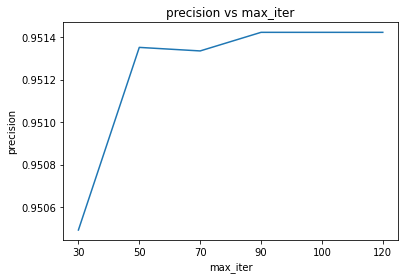

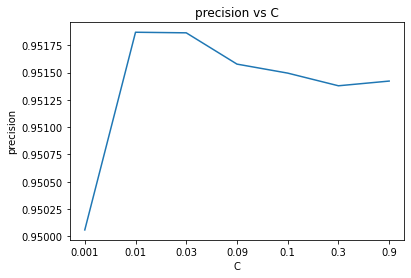

In [138]:
#initialising a class object for logistic regression
logreg_model = predictive_model('logreg')

#spliting a data with 20 percent
logreg_model.split_data(0.2)

#passing a list of feature that needs 
logreg_model.feature_encoding(['cabin'])

#a function call to visualise the best range of hyperparameter valued for max_iter and c values
logreg_model.best_hyperparameter(score_metrics = 'precision', max_iter = [30,50,70,90,100,120], C = [0.001,0.01,0.03, 0.09, 0.1, 0.3,0.9])

*As we can see that performance is highest at somewhere near 70 in case of max_iter and for C its between 0.01 to 0.03 we will try to provide this range for hyperparameter optimization and monitor the results*

### ***Hyperparameter tuning and model fitting using GridSearchCV***

In [139]:
#param_dic to pass to pass for fine tuning hyperparameters for best performance
Param_dic = {'max_iter':[60,70, 80, 90],'C':[0.008, 0.01, 0.03,0.06]}

#function call with tuning method as gridsearearchcv to go through each possible combination of passed parameter grid 
logreg_model.hyperparameter_finetune('GridSearchCV',best_fit= True, param_grid = Param_dic, scoring = 'precision',cv =5)


({'C': 0.03, 'max_iter': 60}, 0.95)


({'C': 0.03, 'max_iter': 60}, 0.95)

### ***Evaluating Performance and Execution time of a Model***

Performance over train data : 

 Classification Report for a train data :

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     24982
           1       0.95      0.96      0.95     22793

    accuracy                           0.96     47775
   macro avg       0.96      0.96      0.96     47775
weighted avg       0.96      0.96      0.96     47775

Performance over test data : 



 Classification Report for a test data :

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6273
           1       0.95      0.95      0.95      5671

    accuracy                           0.95     11944
   macro avg       0.95      0.95      0.95     11944
weighted avg       0.95      0.95      0.95     11944

Auc score is :  0.9908138579036376


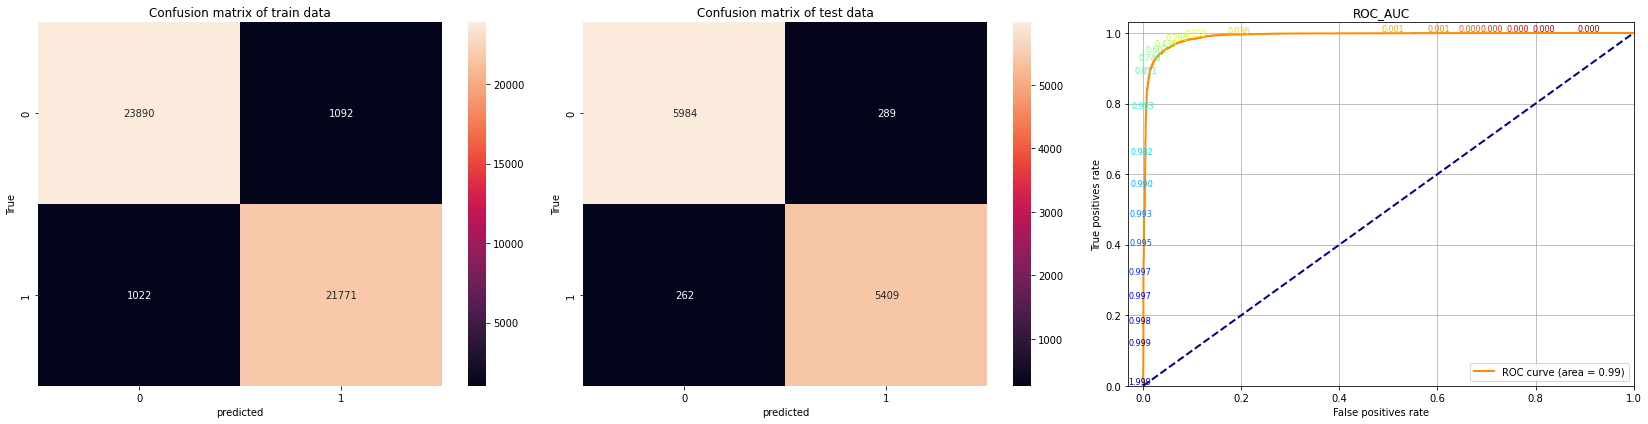

In [140]:
#evaluating a model over train and test data
opscore_logreg = logreg_model.model_performance()

#checkong training time of logistic regression
traintime_logreg = logreg_model.best_hyperparameter_time_+logreg_model.hyperparameter_finetune_time_ + logreg_model.fit_time_ + logreg_model.model_performance_time_


*We are aiming for high precision for class 1 so lets try changing a threshold probaility to evaluate the results*

Performance over train data : 

 Classification Report for a train data :

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     24982
           1       0.97      0.92      0.95     22793

    accuracy                           0.95     47775
   macro avg       0.95      0.95      0.95     47775
weighted avg       0.95      0.95      0.95     47775

Performance over test data : 



 Classification Report for a test data :

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6273
           1       0.97      0.92      0.95      5671

    accuracy                           0.95     11944
   macro avg       0.95      0.95      0.95     11944
weighted avg       0.95      0.95      0.95     11944

Auc score is :  0.9908138579036376


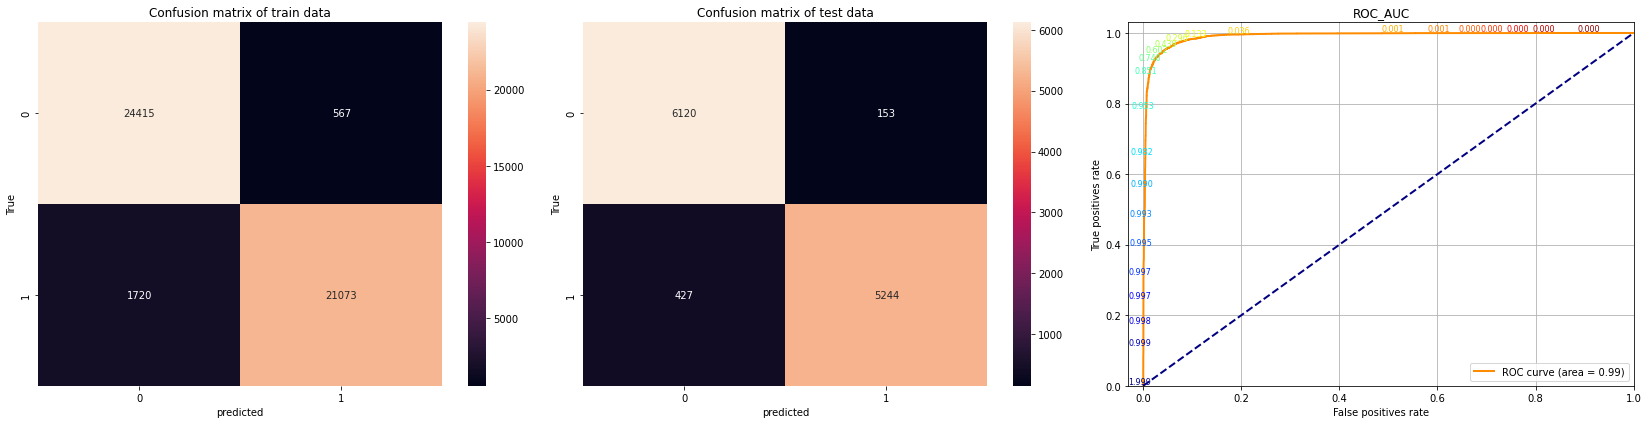

In [141]:
#evaluatng a model with different probability threshold
opscore_logreg = logreg_model.model_performance(prob_threshold = True, probability = 0.70)

*We have scored a precision of 97% at the cost of decreased recall for class1(yes) and decreased precision for class 0(No)* 

### ***Features Importances***

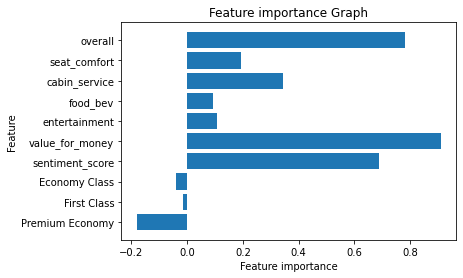

In [142]:
#checking the feature importance of each variable in model
logreg_model.feature_importance()

*Overall rating, value_for_money, sentiment_score is quite dominating feature in predicting our variable*

### ***Model Prediction***

In [143]:
#predicting random 100 samples from the data 
pred_recommendation = logreg_model.model_prediction(data_dict,explain_prediction = True)

#passing sampled dataframe from orignal data to logregpred_df
logregpred_df = predicting_data

#merging output of data from predicting function to logregpred_df
logregpred_df['Predicted Recommendation'] = pred_recommendation 

#visualising result
logregpred_df

overall           cabin  seat_comfort  cabin_service  food_bev  \
47955     10.0   Economy Class           5.0            5.0       5.0   
25748      1.0   Economy Class           3.0            1.0       1.0   
56871      1.0   Economy Class           1.0            1.0       1.0   
18008      1.0   Economy Class           2.0            3.0       2.0   
566        3.0   Economy Class           3.0            2.0       2.0   
...        ...             ...           ...            ...       ...   
19365     10.0  Business Class           4.0            5.0       5.0   
10936      1.0   Economy Class           4.0            4.0       4.0   
63271      1.0   Economy Class           3.0            1.0       1.0   
54137      1.0   Economy Class           1.0            1.0       1.0   
61141      5.0  Business Class           2.0            4.0       2.0   

       entertainment  value_for_money  sentiment_score recommended  \
47955            5.0              5.0             0.93         yes   
25748            1.0              1.0            -0.48          no   
56871            1.0              1.0            -0.87          no   
18008            3.0              1.0            -0.80          no   
566              5.0              3.0            -0.68          no   
...              ...              ...              ...         ...   
19365            3.0              4.0             0.96         yes   
10936            4.0              1.0            -0.97          no   
63271            1.0              2.0            -0.88          no   
54137            1.0              1.0             0.10          no   
61141            3.0              4.0             0.99         yes   

      Predicted Recommendation  
47955                      Yes  
25748                       No  
56871                       No  
18008                       No  
566                         No  
...                        ...  
19365                      Yes  
10936                       No  
63271                       No  
54137                       No  
61141                      Yes  

[100 rows x 10 columns]

### ***Storing final scores of the model***

In [144]:
#storing auc score in op_score dictionary
opscore_logreg['auc_score'] = round(logreg_model.auc_score,2) 

#storing training time in op_score dictionary
opscore_logreg['Training Time']  = traintime_logreg

#storing the score of logistic regression
score_df['LogisticRegression'] = score_frame(opscore_logreg)

*With logistic regression we are able to build a model that is 95% precise and we have reached till 97% precision by switching the threshold. Lets check on other algorithms to look if we can achieve higher score*

## ***Decision Trees***

### ***Feature encoding an Finding best range of Hyperparameters***

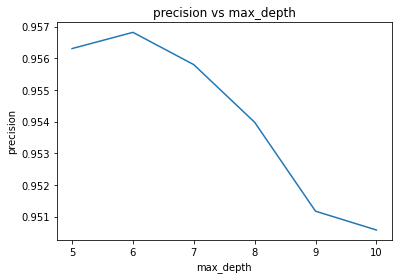

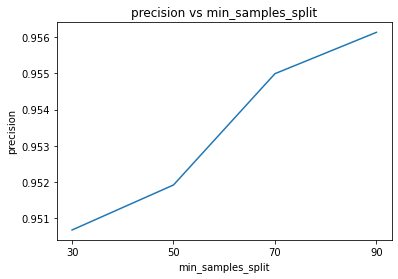

In [145]:
#initialising a decision tree
dectree = predictive_model('dt', max_depth =5,)

#spliting a data for decision tree
dectree.split_data(0.2)

#feature encoding
dectree.feature_encoding(['cabin'])

#calling best hyperparameter to find best range of hyperparameters
dectree.best_hyperparameter(score_metrics = 'precision', max_depth = [5,6,7,8,9,10], min_samples_split =[30,50,70,90])

### ***Hyperparameter tuning and model fitting using GridSearchCV***

In [146]:
#running gridsearch to find bext parameter and refitting a model with the parameters(best fit = true)
param_dict ={'max_depth':[6,7,8,9,10], 
             'min_samples_split' : (70,80,90,100),  
             'criterion':['ginni', 'entropy', 'gain ratio']}

#function call to tune hyperparameter using gridsearchcv            
dectree.hyperparameter_finetune('GridSearchCV',True, param_grid = param_dict , scoring = 'precision', cv =5)

({'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 90}, 0.96)


({'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 90}, 0.96)

### ***Evaluating Performance and Execution time of a Model***

Performance over train data : 

 Classification Report for a train data :

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     24982
           1       0.96      0.96      0.96     22793

    accuracy                           0.96     47775
   macro avg       0.96      0.96      0.96     47775
weighted avg       0.96      0.96      0.96     47775

Performance over test data : 

 Classification Report for a test data :



              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6273
           1       0.95      0.96      0.95      5671

    accuracy                           0.96     11944
   macro avg       0.96      0.96      0.96     11944
weighted avg       0.96      0.96      0.96     11944

Auc score is :  0.9908944500566604


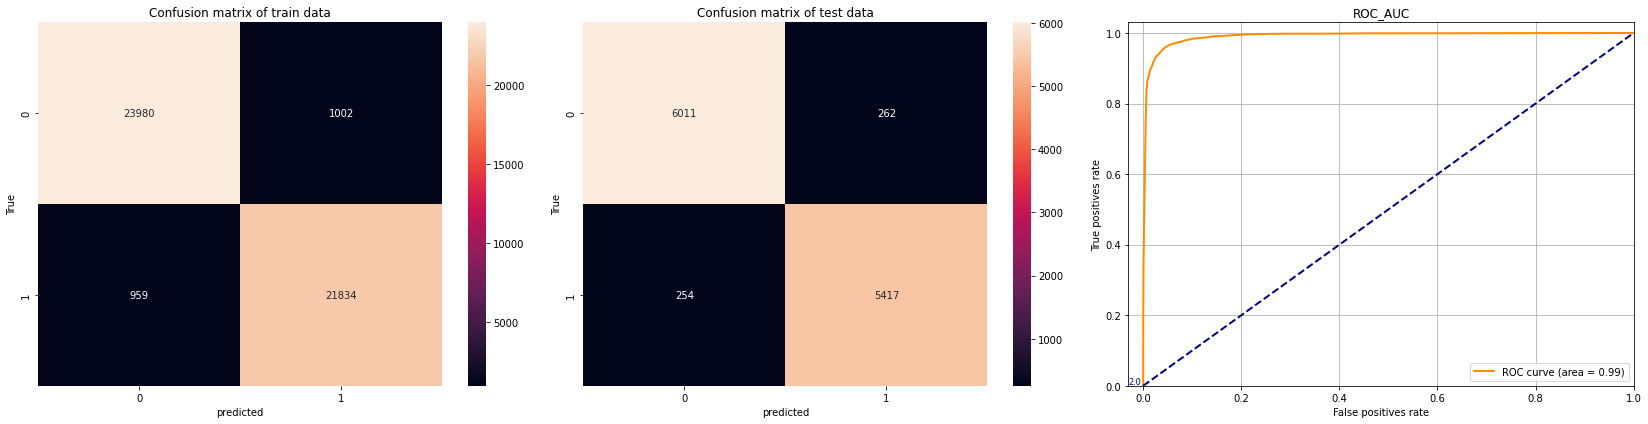

In [147]:
#evaluating a model over train and test data
opscore_dectree = dectree.model_performance()

#checkong training time of logistic regression
traintime_dectree = dectree.best_hyperparameter_time_+ dectree.hyperparameter_finetune_time_ + dectree.fit_time_ + dectree.model_performance_time_

Performance over train data : 

 Classification Report for a train data :



              precision    recall  f1-score   support

           0       0.94      0.98      0.96     24982
           1       0.98      0.93      0.95     22793

    accuracy                           0.96     47775
   macro avg       0.96      0.95      0.96     47775
weighted avg       0.96      0.96      0.96     47775

Performance over test data : 

 Classification Report for a test data :

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6273
           1       0.97      0.93      0.95      5671

    accuracy                           0.95     11944
   macro avg       0.95      0.95      0.95     11944
weighted avg       0.95      0.95      0.95     11944

Auc score is :  0.9908944500566604


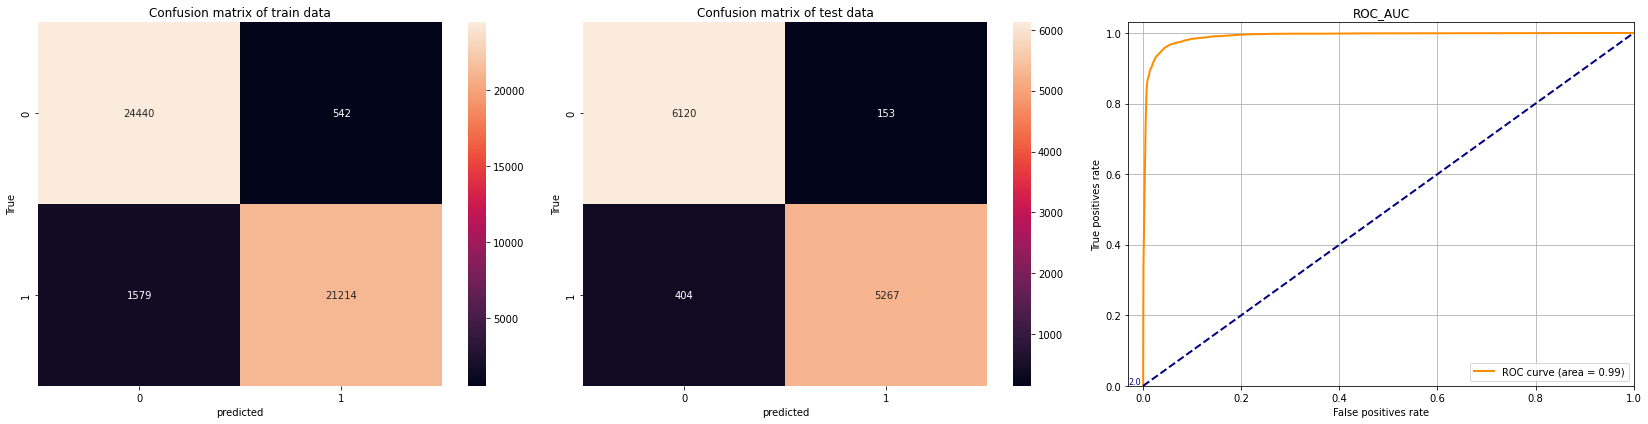

In [148]:
#as its a binary classification only we will try to switch threshold probability and verify the results
opscore_dectree = dectree.model_performance(prob_threshold = True, probability = 0.70)

*We have scored a precision of 98% at the cost of decreased recall for class1(yes) and decreased precision for class 0(No) in case of changing threshold whereas without changing threshold we got a 96%* 

### ***Features Importances***

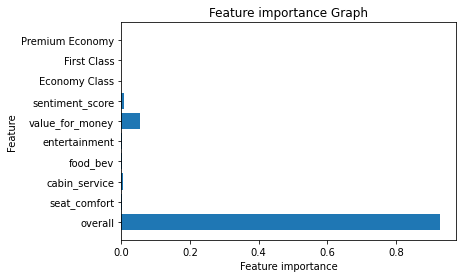

In [149]:
#checking the global importance of each feature in making the decision
dectree.feature_importance()

*Incase of decison tree overall score is dominating and then value for money whereas almost other variable has zero importance*

### ***Visualising DecisionTrees***

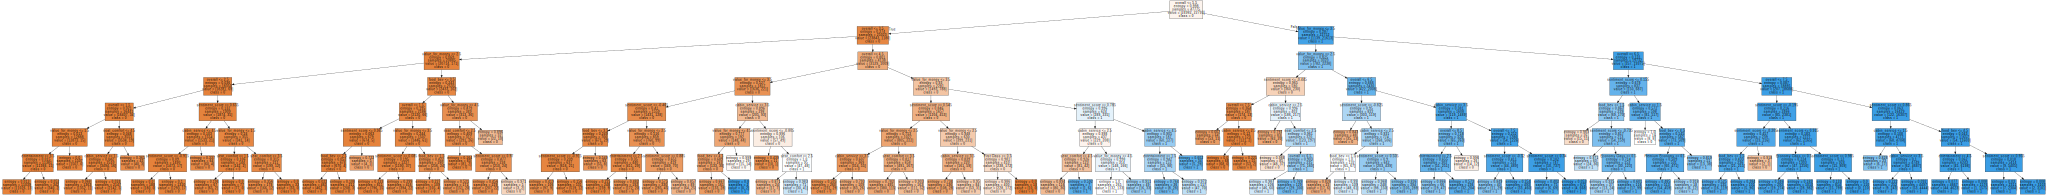

<Figure size 1800x1440 with 0 Axes>

In [150]:
#visualising a decision tree
dectree.tree_visualisation()

### ***Model Prediction***

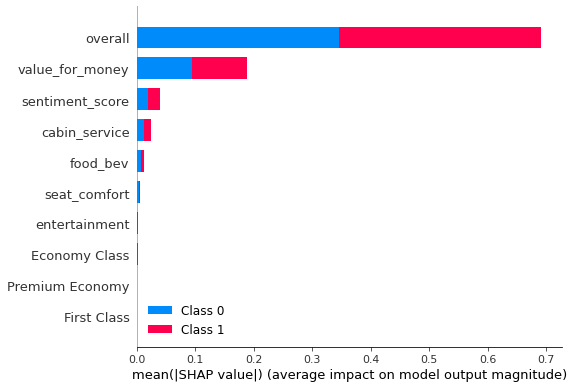

In [151]:
pred_recommendation = dectree.model_prediction(data_dict,explain_prediction = True)
dectreepred_df = predicting_data
dectreepred_df['Predicted Recommendation'] = pred_recommendation 

### ***Storing final scores of the model***

In [152]:
#storing auc score in op_score dictionary
opscore_dectree['auc_score'] = round(dectree.auc_score,2) 

#storing training time in op_score dictionary
opscore_dectree['Training Time']  = traintime_dectree

#storing the score of logistic regression
score_df['DecisionTree'] = score_frame(opscore_dectree)

## ***Random Forest***

### ***Feature encoding an Finding best range of Hyperparameters***

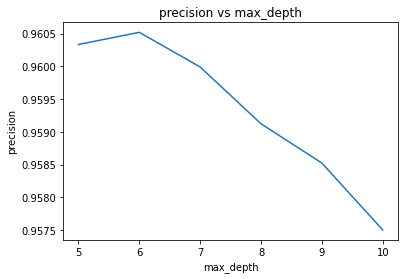

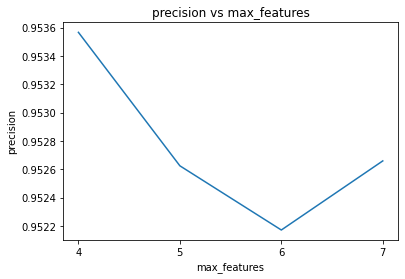

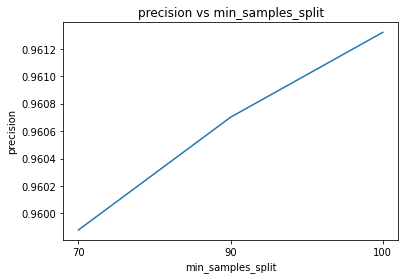

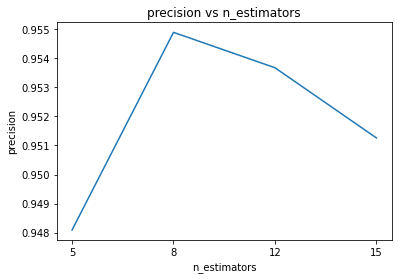

In [153]:
#creating a object for random forest class
rand_forest = predictive_model('rf',max_features = 5, n_estimators =5, min_samples_split =100)

#spliting a data for decision tree
rand_forest.split_data(0.2)

#feature encoding
rand_forest.feature_encoding(['cabin'])

#to find the range of best hyperparameters 
rand_forest.best_hyperparameter(score_metrics = 'precision', max_depth = [5,6,7,8,9,10], max_features = [4,5,6,7], min_samples_split =[70,90,100], n_estimators = [5,8,12,15])

*Best Range of Hyperparameters are:*

*1. max_depth : 5 to 7*

*2. n_extimators : 8 -12*

*3. min_samples_split :nearby 90*

*4. max_features : 3-5*

### ***Hyperparameter tuning and model fitting using GridSearchCV***

In [154]:
#running gridsearch to find bext parameter and refitting a model with the parameters(best fit = true)
param_dict ={'max_depth':[7,8,9], 
             'min_samples_split' : (80,90,100), 
             'max_features':[5,6,7], 
             'criterion':['ginni', 'entropy', 'gain ratio'],
             'n_estimators': [5,7,9,12,15]}

#function call to tune hyperparameter using gridsearchcv             
rand_forest.hyperparameter_finetune('GridSearchCV',True, param_grid = param_dict , scoring = 'precision', cv = 5)


({'criterion': 'entropy', 'max_depth': 9, 'max_features': 5, 'min_samples_split': 100, 'n_estimators': 15}, 0.96)


({'criterion': 'entropy',
  'max_depth': 9,
  'max_features': 5,
  'min_samples_split': 100,
  'n_estimators': 15},
 0.96)

### ***Evaluating Performance and Execution time of a Model***

Performance over train data : 

 Classification Report for a train data :

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     24982
           1       0.96      0.95      0.96     22793

    accuracy                           0.96     47775
   macro avg       0.96      0.96      0.96     47775
weighted avg       0.96      0.96      0.96     47775

Performance over test data : 



 Classification Report for a test data :

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6273
           1       0.96      0.95      0.95      5671

    accuracy                           0.96     11944
   macro avg       0.96      0.96      0.96     11944
weighted avg       0.96      0.96      0.96     11944

Auc score is :  0.9918174227641434


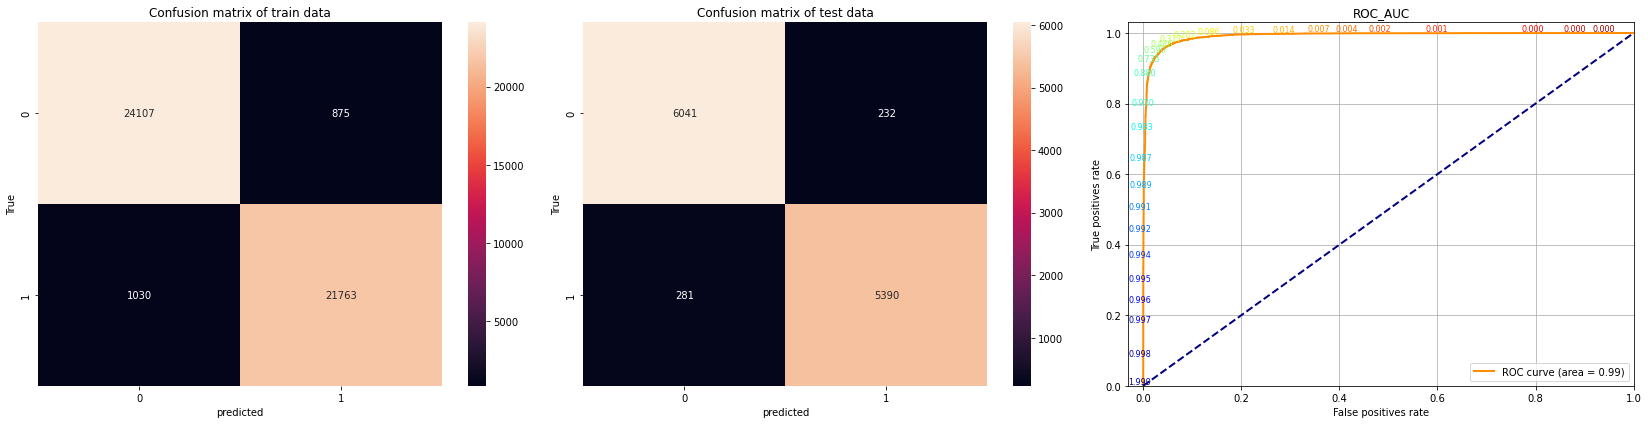

In [155]:
#evaluating a model over train and test data
opscore_rf = rand_forest.model_performance()

#checking training time of logistic regression
traintime_rf = rand_forest.best_hyperparameter_time_+ rand_forest.hyperparameter_finetune_time_ + rand_forest.fit_time_ + rand_forest.model_performance_time_

Performance over train data : 

 Classification Report for a train data :

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     24982
           1       0.98      0.92      0.95     22793

    accuracy                           0.95     47775
   macro avg       0.96      0.95      0.95     47775
weighted avg       0.96      0.95      0.95     47775

Performance over test data : 



 Classification Report for a test data :

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6273
           1       0.98      0.92      0.95      5671

    accuracy                           0.95     11944
   macro avg       0.95      0.95      0.95     11944
weighted avg       0.95      0.95      0.95     11944

Auc score is :  0.9918174227641434


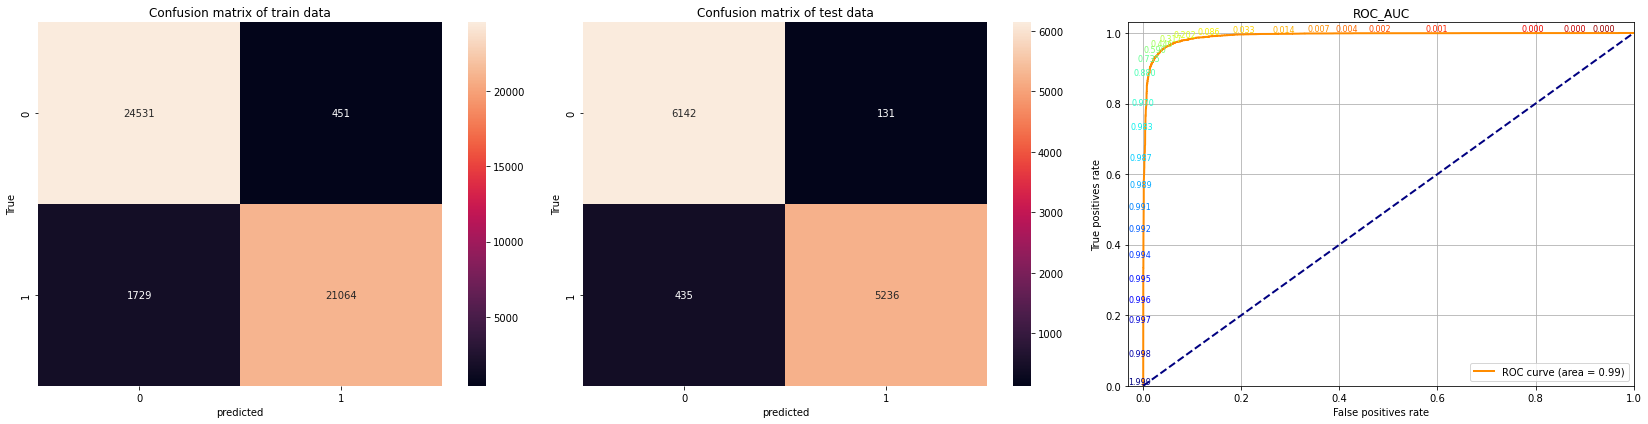

In [156]:
#checking scores after changing the hyperparameters - switching it to best parameters 
opscore_rf = rand_forest.model_performance(prob_threshold = True, probability = 0.70)

*We have scored a precision of 98% at the cost of decreased recall for class1(yes) and decreased precision for class 0(No) in case of changing threshold whereas without changing threshold we got a 96%* 

### ***Features Importances***

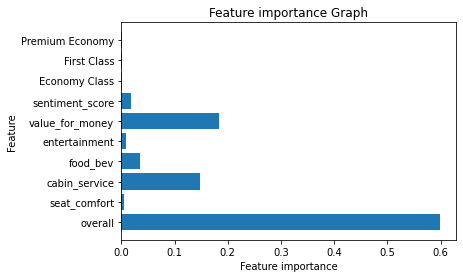

In [157]:
rand_forest.feature_importance()

### ***Model Prediction***

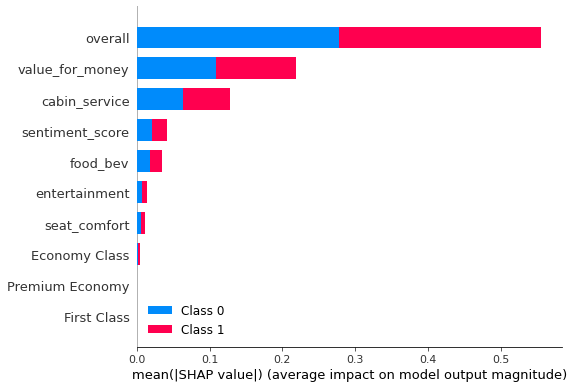

In [158]:
pred_recommendation = rand_forest.model_prediction(data_dict,explain_prediction = True)
rfpred_df = predicting_data
rfpred_df['Predicted Recommendation'] = pred_recommendation 

### ***Storing final scores of the model***

In [159]:
#storing auc score in op_score dictionary
opscore_rf['auc_score'] = round(rand_forest.auc_score,2) 

#storing training time in op_score dictionary
opscore_rf['Training Time']  = traintime_rf

#storing the score of logistic regression
score_df['RandomForest'] = score_frame(opscore_rf)

## ***GradientBoost***

### ***Feature encoding an Finding best range of Hyperparameters***

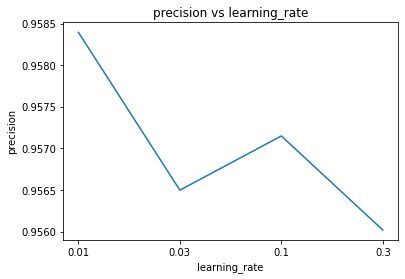

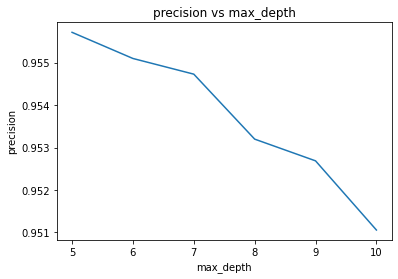

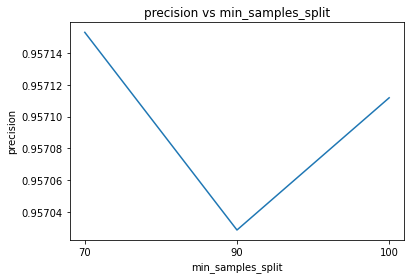

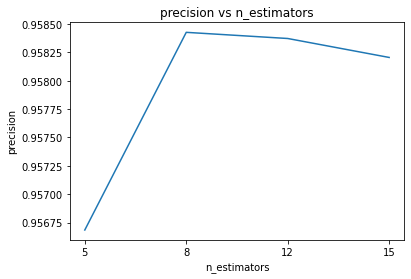

In [160]:
#creating a object for random forest class
grad_boost = predictive_model('gb',max_features = 5, n_estimators =5, min_samples_split =100)

#spliting a data for decision tree
grad_boost.split_data(0.2)

#feature encoding
grad_boost.feature_encoding(['cabin'])

#to find the range of best hyperparameters 
grad_boost.best_hyperparameter(score_metrics = 'precision', learning_rate = [0.01,0.03,0.1, 0.3], max_depth = [5,6,7,8,9,10] , min_samples_split =[70,90,100], n_estimators = [5,8,12,15])

### ***Hyperparameter tuning and model fitting using GridSearchCV***

In [161]:
#running gridsearch to find bext parameter and refitting a model with the parameters(best fit = true)
param_dict ={'max_depth':[7,8,9], 
             'min_samples_split' : (80,90,100), 
             'learning_rate':[0.003, 0.01,0.03],
             'n_estimators': [7,10,13]}
             
grad_boost.hyperparameter_finetune('GridSearchCV',True, param_grid = param_dict , scoring = 'precision', cv = 5)

({'learning_rate': 0.01, 'max_depth': 8, 'min_samples_split': 90, 'n_estimators': 7}, 0.98)


({'learning_rate': 0.01,
  'max_depth': 8,
  'min_samples_split': 90,
  'n_estimators': 7},
 0.98)

### ***Evaluating Performance and Execution time of a Model***

Performance over train data : 

 Classification Report for a train data :

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     24982
           1       0.98      0.90      0.94     22793

    accuracy                           0.95     47775
   macro avg       0.95      0.95      0.95     47775
weighted avg       0.95      0.95      0.95     47775

Performance over test data : 

 Classification Report for a test data :



              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6273
           1       0.98      0.90      0.94      5671

    accuracy                           0.94     11944
   macro avg       0.95      0.94      0.94     11944
weighted avg       0.95      0.94      0.94     11944

Auc score is :  0.9914176806253007


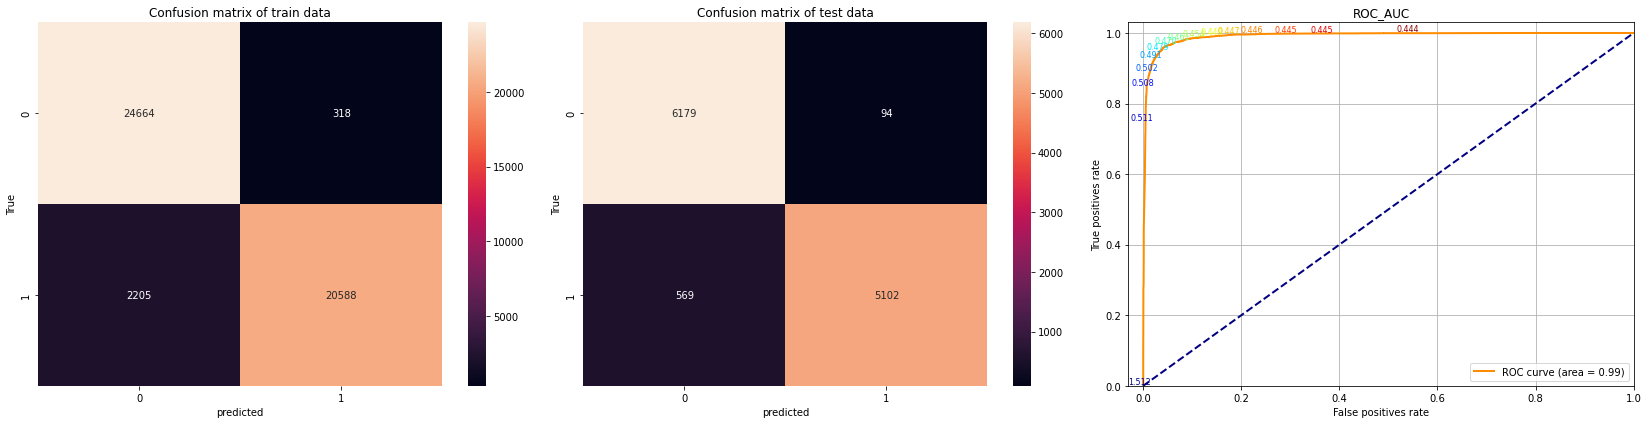

In [162]:
#evaluating a model over train and test data
opscore_gb = grad_boost.model_performance()

#checking training time of logistic regression
traintime_gb = grad_boost.best_hyperparameter_time_+ grad_boost.hyperparameter_finetune_time_ + grad_boost.fit_time_ + grad_boost.model_performance_time_

### ***Features Importances***

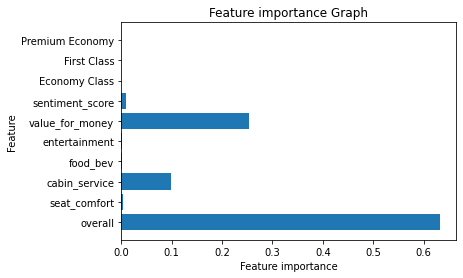

In [163]:
grad_boost.feature_importance()

### ***Model Prediction***

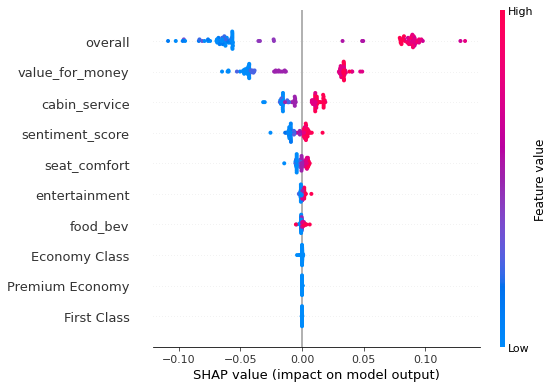

In [164]:
pred_recommendation = grad_boost.model_prediction(data_dict,explain_prediction = True)
gbpred_df = predicting_data
gbpred_df['Predicted Recommendation'] = pred_recommendation 

### ***Storing final scores of the model***

In [165]:
#storing auc score in op_score dictionary
opscore_gb['auc_score'] = round(grad_boost.auc_score,2) 

#storing training time in op_score dictionary
opscore_gb['Training Time']  = traintime_gb

#storing the score of logistic regression
score_df['GradientBoost'] = score_frame(opscore_gb)

## ***Naive Bayes***

### ***Feature encoding an Finding best range of Hyperparameters***

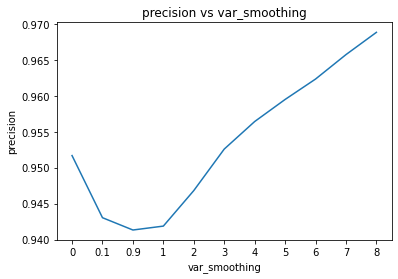

In [166]:
#initialising a class object for logistic regression
nb_model = predictive_model('nb')

#spliting a data with 20 percent
nb_model.split_data(0.2)

#passing a list of feature that needs 
nb_model.feature_encoding(['cabin'])

#calling best hyperparameter
nb_model.best_hyperparameter(score_metrics = 'precision', var_smoothing = [0, 0.1, 0.9,1,2,3,4,5,6,7,8])

### ***Hyperparameter tuning and model fitting using GridSearchCV***

In [167]:
#running gridsearch to find bext parameter and refitting a model with the parameters(best fit = true)
param_dic = {'var_smoothing':[7,9,11,13,15]}


nb_model.hyperparameter_finetune('GridSearchCV',True, param_grid = param_dic, scoring = 'precision', cv=5)

({'var_smoothing': 15}, 0.98)


({'var_smoothing': 15}, 0.98)

### ***Evaluating Performance and Execution time of a Model***

Performance over train data : 

 Classification Report for a train data :

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     24982
           1       0.98      0.86      0.92     22793

    accuracy                           0.92     47775
   macro avg       0.93      0.92      0.92     47775
weighted avg       0.93      0.92      0.92     47775

Performance over test data : 



 Classification Report for a test data :

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6273
           1       0.98      0.85      0.91      5671

    accuracy                           0.92     11944
   macro avg       0.93      0.92      0.92     11944
weighted avg       0.93      0.92      0.92     11944

Auc score is :  0.9893765234186825


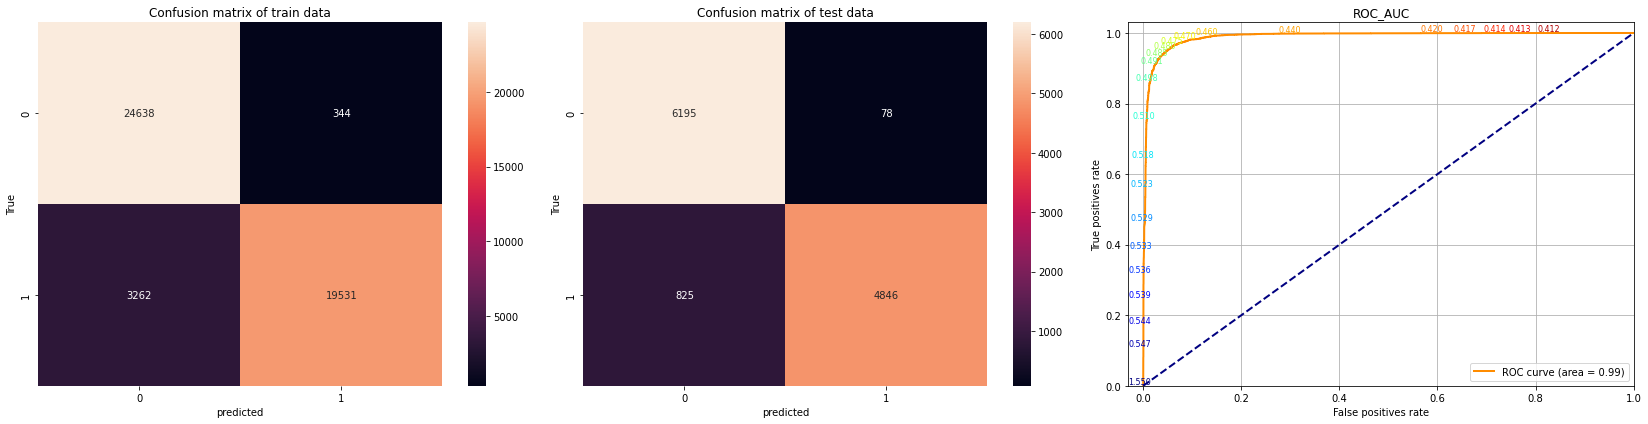

In [168]:
#evaluating a model over train and test data
opscore_nb = nb_model.model_performance()

#checking training time of logistic regression
traintime_nb = nb_model.best_hyperparameter_time_+ nb_model.hyperparameter_finetune_time_ + nb_model.fit_time_ + nb_model.model_performance_time_

### ***Model Prediction***

In [169]:
pred_recommendation = nb_model.model_prediction(data_dict,explain_prediction = True)
nbpred_df = predicting_data
nbpred_df['Predicted Recommendation'] = pred_recommendation 

### ***Storing final scores of the model***

In [170]:
#storing auc score in op_score dictionary
opscore_nb['auc_score'] = round(nb_model.auc_score,2) 

#storing training time in op_score dictionary
opscore_nb['Training Time']  = traintime_nb

#storing the score of logistic regression
score_df['NaiveBayes'] = score_frame(opscore_nb)

## ***Comparing model performances***

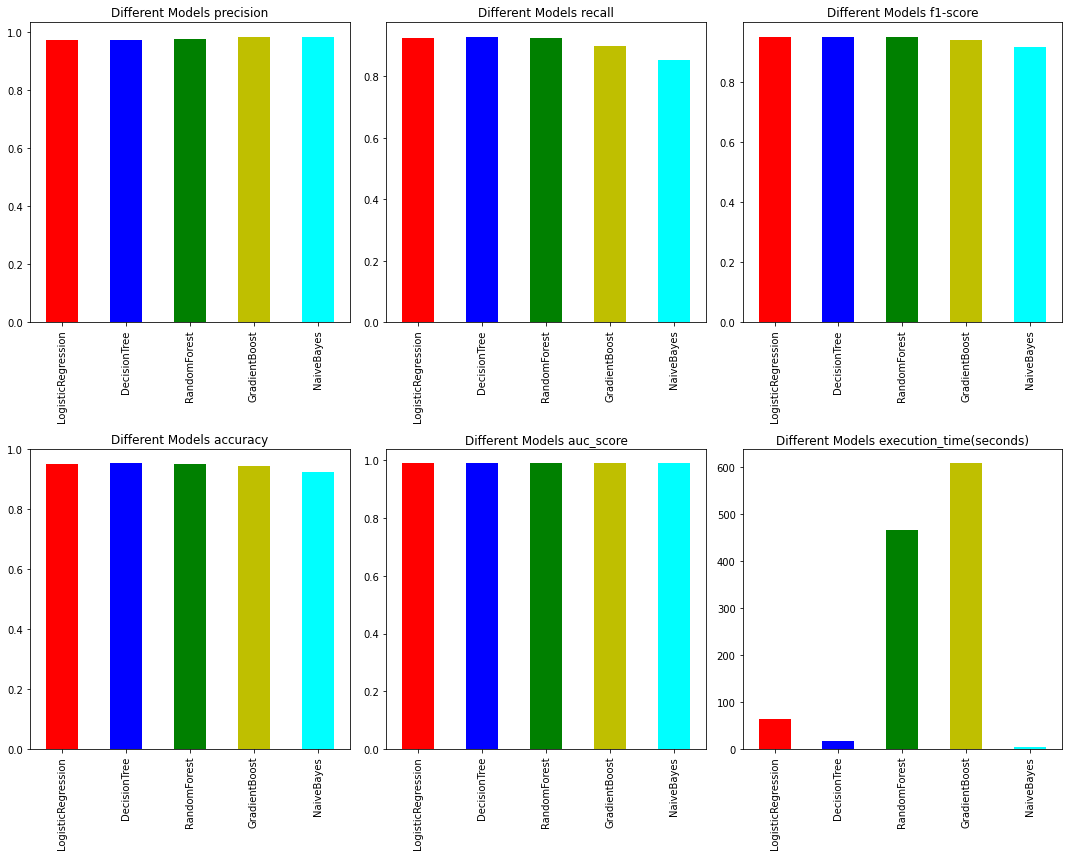

In [171]:
#__________________________________________BLOCK 134_______________________________________________________

#converting dictionaries in data frame and series
score_df = pd.DataFrame(score_df)

#visualising different score metrics for different models

fig, axes = plt.subplots(2,3,figsize=(15,12))
k =0     #create for indexing title

#different colors to represent different model
colours=['r','b','g','y','cyan','purple','indigo']

#running a nested for loop to plot each score_metric graph
for i in range(2):
  for j in range(3):
    #plotting a bar for each type scores of different models
    ax = score_df.iloc[k].plot.bar(ax = axes[i][j],color=colours)

    #setting up title for each graph 
    ax.set_title("Different Models "+str(score_df.iloc[k].name))
    k = k+1
    
fig.tight_layout()

## ***Conclusion on Predictive modelling***

*We have observed that nearly all the models are giving up the same scores from logistic regression to gradient boost.Scores are similar because we have seen in our data analysis as well relation seems to straight forward and easy between recommended and other rating varables.*

***Score metrics***

*Now there are two major scores precision and recall they are coming out to be nearly same and equal. We can provide the importance to each depending on the case for which the model can be used :*

*Case 1: If Airline company is demanding this project to understand the areas in which they need an improvement and improving custromer service is their major concern then we need that precision for class 1 (yes) should be high.That will in turn increases recall value of class 0.*

*case 2: If airline company is using this to somewhere to attract customer and trying to show the happy customers then recall is important.*

*We can consider case 1 here and considering all the models are nearly same only and if timing of execution is not a concern then we can go for gradient boost or else we can pick up Loogistic regression or Decision Tree. We will pick up logistic regression as our final classifier*

## ***Final model selection and saving***

In [172]:
#________________________________________________Block 137____________________________________________________

#importing pickle module to save the model so that it can be used later directly for prediction without retraining 
import pickle

#path to save the model 
store_path   = '/content/drive/MyDrive/Airline Recommender System/'

#changing current directory to mydrive
%cd /content/drive/MyDrive/

#name by which it needs to be saved in drive
name_file = 'airline_recommender.pkl'

/content/drive/MyDrive


In [173]:
#_____________________________________Block 138_________________________________________

#selecting XGB as our final model
final_model = logreg_model.model

#dumping a model to drive
pickle.dump(final_model, open(name_file, 'wb'))

# ***Thank You***